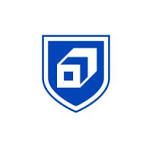     
# **Decoding The Talents And Needs**
*An Unsupervised Case Study for Learner Profiling & Company Profiling For Scaler.*

From the company’s perspective:
* Scaler, as an emerging tech-versity, endeavors to provide world-class education
in computer science & data science domains.
* A significant challenge for Scaler is understanding the diverse backgrounds of its
learners, especially in terms of their current roles, companies, and experience.
Clustering similar learners helps in customizing the learning experience, thereby
increasing retention and satisfaction.
* Analyzing the vast data of learners can uncover patterns in their professional
backgrounds and preferences. This allows Scaler to make tailored content
recommendations and provide specialized mentorship.
* By leveraging data science and unsupervised learning, particularly clustering
techniques, Scaler can group learners with similar profiles, aiding in delivering a
more personalized learning journey.

##Business Challenge:
The key challenge for Scaler lies in identifying patterns within the diverse learner database, especially in terms of current job roles, companies, and professional experiences. By uncovering these patterns, Scaler aims to cluster learners with similar profiles to:

* Deliver a personalized and relevant learning experience.
* Tailor content recommendations and mentorship programs.
* Profile the best companies and job positions for their alumni.

## Objectives:  
The goal is to analyze learner data, perform clustering, and derive actionable insights to enhance course offerings and learner experiences. Specifically:

* Cluster learners based on job profiles, companies, and additional relevant features.
Evaluate the coherence and interpretability of the clusters to ensure meaningful segmentation.
* Provide insights that can inform content tailoring, separate learning groups, mentorship allocation, and job placement support.
* The ultimate goal is to extract meaningful insights, such as identifying trends, common characteristics, or preferences among learners in similar roles or companies.

## Scope of Work:

1. Data Understanding and Preprocessing: Conduct exploratory data analysis (EDA), handle missing values, and prepare data for clustering.
2. Feature Engineering: Extract meaningful features from the dataset to enhance clustering performance.
3. Clustering Techniques: Apply unsupervised learning methods such as K-means, Hierarchical Clustering, or other relevant algorithms.
4. Cluster Evaluation: Assess cluster quality using metrics like silhouette score, Davies-Bouldin index, or domain-specific coherence.
5. Actionable Insights: Translate cluster characteristics into strategic recommendations for personalized learning paths, targeted mentorship programs, and job profiling.

# IMPORTING NECESSARY PACKAGES

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as px


from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.impute import KNNImputer
from sklearn.neighbors import NearestNeighbors


from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans,AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram
from umap import UMAP


import warnings
warnings.filterwarnings('ignore')

# **ETL** / **ELT**



In [2]:
file_path= 'https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/002/856/original/scaler_clustering.csv'
df = pd.read_csv(file_path)
df.head(5)

Unnamed: 0               company_hash  \
0           0             atrgxnnt xzaxv   
1           1  qtrxvzwt xzegwgbb rxbxnta   
2           2              ojzwnvwnxw vx   
3           3                  ngpgutaxv   
4           4                 qxen sqghu   

                                          email_hash  orgyear      ctc  \
0  6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...   2016.0  1100000   
1  b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...   2018.0   449999   
2  4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...   2015.0  2000000   
3  effdede7a2e7c2af664c8a31d9346385016128d66bbc58...   2017.0   700000   
4  6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...   2017.0  1400000   

         job_position  ctc_updated_year  
0               Other            2020.0  
1  FullStack Engineer            2019.0  
2    Backend Engineer            2020.0  
3    Backend Engineer            2019.0  
4  FullStack Engineer            2019.0

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205843 entries, 0 to 205842
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        205843 non-null  int64  
 1   company_hash      205799 non-null  object 
 2   email_hash        205843 non-null  object 
 3   orgyear           205757 non-null  float64
 4   ctc               205843 non-null  int64  
 5   job_position      153279 non-null  object 
 6   ctc_updated_year  205843 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 11.0+ MB


## **DATA DESCRIPTION :**
1. Unnamed 0: The index of the dataset.
2. Email_hash: An anonymized identifier representing the email of the learner.
3. Company_hash: An anonymized identifier indicating the current employer of the
learner.
4. orgyear: Represents the year the learner began employment at the current
company.
5. CTC: Current Compensation to the Company (CTC) of the learner.
6. Job_position: Represents the job profile or role of the learner within their
company.
7. CTC_updated_year: The year in which the learner's CTC was most recently
updated. This could be due to yearly increments, promotions, or other factors.





### **Dataset Observation**

* Raw dataset contains 205843 rows and 7 columns
* Among which 2 columns named *ctc* and *unnamed:0* have int datatype, columns named *orgyear* and *ctc_updated_year* are of float dtype and rest are object dtypes named  *company_hash,email_hash and job_position*

In [4]:
# Remove unnecessary column 'Unnamed: 0'
df.drop(columns=['Unnamed: 0'], inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205843 entries, 0 to 205842
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   company_hash      205799 non-null  object 
 1   email_hash        205843 non-null  object 
 2   orgyear           205757 non-null  float64
 3   ctc               205843 non-null  int64  
 4   job_position      153279 non-null  object 
 5   ctc_updated_year  205843 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 9.4+ MB


In [6]:
df.nunique()

company_hash         37299
email_hash          153443
orgyear                 77
ctc                   3360
job_position          1016
ctc_updated_year         7
dtype: int64

### **Columns Details** :

1. *company_hash*:learners belonging to 37,299 different companies.
2. *email_hash*: 153,443 unique emails, suggesting that most rows correspond to unique individuals with repeated learners data too.
3. *orgyear and ctc_updated_year* Orgyear shows wide variation (77 years), while ctc_updated_year (7 years) seems inconsistent.
4. *ctc* : 3,360 unique values, suggests a diverse range of salaries.
5. *job_position*: 1,016 unique roles, showing a wide variety of job titles.

In [7]:
df.describe()

orgyear           ctc  ctc_updated_year
count  205757.000000  2.058430e+05     205843.000000
mean     2014.882750  2.271685e+06       2019.628231
std        63.571115  1.180091e+07          1.325104
min         0.000000  2.000000e+00       2015.000000
25%      2013.000000  5.300000e+05       2019.000000
50%      2016.000000  9.500000e+05       2020.000000
75%      2018.000000  1.700000e+06       2021.000000
max     20165.000000  1.000150e+09       2021.000000

In [8]:
df.describe(include='number').round(0).astype(int)

orgyear         ctc  ctc_updated_year
count   205757      205843            205843
mean      2015     2271685              2020
std         64    11800914                 1
min          0           2              2015
25%       2013      530000              2019
50%       2016      950000              2020
75%       2018     1700000              2021
max      20165  1000150000              2021

In [9]:
df.describe(include='object')

company_hash  \
count                      205799   
unique                      37299   
top     nvnv wgzohrnvzwj otqcxwto   
freq                         8337   

                                               email_hash      job_position  
count                                              205843            153279  
unique                                             153443              1016  
top     bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...  Backend Engineer  
freq                                                   10             43554

## **Transformation**

In [10]:

# Shape of the dataset
print(f'The dataset has {df.shape[0]} rows and {df.shape[1]} columns.')

The dataset has 205843 rows and 6 columns.


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205843 entries, 0 to 205842
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   company_hash      205799 non-null  object 
 1   email_hash        205843 non-null  object 
 2   orgyear           205757 non-null  float64
 3   ctc               205843 non-null  int64  
 4   job_position      153279 non-null  object 
 5   ctc_updated_year  205843 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 9.4+ MB


### Fixing datatypes

In [12]:
df['ctc_updated_year']=df['ctc_updated_year'].astype(int)

In [13]:
# Converting orgyear and ctc_updated_year columns to datetime year format
df['orgyear'] = pd.to_datetime(df['orgyear'], format='%Y', errors='coerce').dt.year
df['ctc_updated_year'] = pd.to_datetime(df['ctc_updated_year'], format='%Y', errors='coerce').dt.year

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205843 entries, 0 to 205842
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   company_hash      205799 non-null  object 
 1   email_hash        205843 non-null  object 
 2   orgyear           205712 non-null  float64
 3   ctc               205843 non-null  int64  
 4   job_position      153279 non-null  object 
 5   ctc_updated_year  205843 non-null  int32  
dtypes: float64(1), int32(1), int64(1), object(3)
memory usage: 8.6+ MB


### Checking Duplicates

In [15]:
# Value counts of categorical columns
for col in df.columns:
    unique_values = df[col].nunique()
    print(f'Unique values in {col}: {unique_values}\n')
    if unique_values < 10:
        print(f'Value counts for {col}:\n{df[col].value_counts()}\n')
    print(f'Percentage of unique values in {col}: {unique_values/df.shape[0]*100:.2f}%\n')
    print("" + "-"*50 + "\n")

Unique values in company_hash: 37299

Percentage of unique values in company_hash: 18.12%

--------------------------------------------------

Unique values in email_hash: 153443

Percentage of unique values in email_hash: 74.54%

--------------------------------------------------

Unique values in orgyear: 61

Percentage of unique values in orgyear: 0.03%

--------------------------------------------------

Unique values in ctc: 3360

Percentage of unique values in ctc: 1.63%

--------------------------------------------------

Unique values in job_position: 1016

Percentage of unique values in job_position: 0.49%

--------------------------------------------------

Unique values in ctc_updated_year: 7

Value counts for ctc_updated_year:
ctc_updated_year
2019    68688
2021    64976
2020    49444
2017     7561
2018     6746
2016     5501
2015     2927
Name: count, dtype: int64

Percentage of unique values in ctc_updated_year: 0.00%

--------------------------------------------------



In [16]:
# Check for duplicates
duplicates = df.duplicated().sum()
print(f'The dataset has {duplicates} duplicate rows.')

The dataset has 34 duplicate rows.


In [17]:
df[df.duplicated()]

company_hash  \
97138                            wtqtzwt xzw   
98085                                   2020   
102600                          voxvz uvxzno   
109324                      wgbwvon mhoxztoo   
110833                zgn vuurxwvmrt vwwghzn   
111354             uyxrxuo xzzgcvnxgz wvbuho   
111521                      aqggb ntwyzgrgsj   
115241                   rgfto wgbuvzxto xzw   
117246                                xatbxv   
117549                               exzdtqv   
120371  avnvbtnxwv ogrhnxgzo uqxcvnt rxbxnta   
121946                          oguqv ontqxv   
122316                               eqtoytq   
130495                                xatbxv   
138371                                 xicxv   
141686                      uhmrxwxo ovuxtzn   
143061   vwwtznhqt ogrhnxgzo uqxcvnt rxbxnta   
146097                          axvouvqp xzw   
151473                   rgfto wgbuvzxto xzw   
157950                        ti ntwyzgrgsxw   
161251                     avnvftvct ucn rna   
164554                            ng nyt ztf   
165326                      uhmrxwxo ovuxtzn   
171421                               fyvnexd   
175942                            tdnqvbvqpo   
179858                           buyvoxo rna   
180630                      uhmrxwxo ovuxtzn   
182531                             xznqvrxzp   
195375               souvzz ntwyzgrgsxto xzw   
196492                                  2020   
196971                                  2020   
201165                            xzzgcvwwtq   
203257                      uhmrxwxo ovuxtzn   
205733                      uhmrxwxo ovuxtzn   

                                               email_hash  orgyear      ctc  \
97138   bb8e4b09544daf1bfc8c7bb9a9ae1fee35490cf3f321b8...   2014.0  1000000   
98085   6ad3e6ab27462c2c7428fa5d51405933335341d4d969b5...   2020.0   720000   
102600  c7fac937a34f7ae432ff1d77466eb7ea6cf25dfd5ebcca...   2020.0  1280000   
109324  0442a51ef5080d7d40721c007131a1d5bdeabae2c1b153...   2016.0   700000   
110833  8aad76cb5766c6b24c8eebfeb891cb548420690d0030a0...   2019.0   500000   
111354  704d69965035d1c341b06fc5d83bf1b714f1625c0cf271...   2017.0   850000   
111521  df81dac132d66a42a0c71a4799e1040731738e542c81ff...   2017.0  1270000   
115241  ea363e930dabe0fbb63438e07775af3cb3b32639947c47...   2017.0  1100000   
117246  f451ceee50b1bfa3dc749c6aa8634ab3851a4ab961b003...   2019.0   640000   
117549  e7df851527dd6f8ec95d5e13d9fb2a7255380245b808e3...   2020.0  1500000   
120371  15d7dd6801fb7cb980e77c420dd9bef5773e7ef57f510c...   2016.0  1300000   
121946  f48d4cd35091adb89c8e82b8bc39b68416e2e954e406fd...   2016.0  1250000   
122316  567e7ff3ad74ce235a75b1feea224204d35cd698922e59...   2018.0   900000   
130495  80a04f3eb89aa385e32b6e1c9a0b564730274632fad4c4...   2017.0   409999   
138371  d0e72d551c69a2f9d96914515aeef797f4989b54c90ef0...   2014.0  1200000   
141686  f27a6a759a02e90ebd17041fb26b72d13420d53edcdc99...   2020.0   940000   
143061  bf09ce2b61e3bba0846412cf76b2e408c92384b373f709...   2014.0   800000   
146097  8e5fe3154be66d7cd8730224318d913ecd10ec5197e20a...   2017.0  1000000   
151473  f67d3be9653bca997a75c81a88e851bcf0368fd83255aa...   2017.0  1265000   
157950  843a5216e56e06b9d31d35e0c3820beec3af19dc4978af...   2019.0   850000   
161251  5083a995fa1623fd7d329766f8e7adbe5497a8c3c826f9...   2018.0   800000   
164554  7b47ee99ce695d48d18dea36d3c6cc73e3b5b40ed477cf...   2019.0   450000   
165326  d40b483baf912b9f21cd1952e8b79388ce88ed5222d3d8...   2019.0  1200000   
171421  7e2ac7c6b9051177ea51af3f7c8e934d6d3ce15a5cb587...   2020.0  1300000   
175942  82b93606127fa5ed0d28cb32469d7ba177b8e70088608c...   2019.0   350000   
179858  bd443574985b2f72a4a382b6be392db2358158761f38de...   2016.0   750000   
180630  59e67f9f149ede96889afacb1a70645fd3f309e3a1fa43...   2019.0  1620000   
182531  c2c34a82a91169e2523727f7f15a4cc64f973ccb895b69...   2016.0  6730000   
195375  31fefa78a0f32b56c8f0d60d2355d92c480b4ba95fcd83...   

In [18]:
df.drop_duplicates(inplace=True)
print(f'After removing duplicates, the dataset has {df.shape[0]} rows and {df.shape[1]} columns.')

After removing duplicates, the dataset has 205809 rows and 6 columns.


### Checking Missing Values

In [19]:
df.isna().sum()

company_hash           44
email_hash              0
orgyear               131
ctc                     0
job_position        52548
ctc_updated_year        0
dtype: int64

In [20]:
# Percentage of missing values in dataset
(df.isnull().mean()*100).loc[lambda x: x > 0].sort_values(ascending=False)

job_position    25.532411
orgyear          0.063651
company_hash     0.021379
dtype: float64

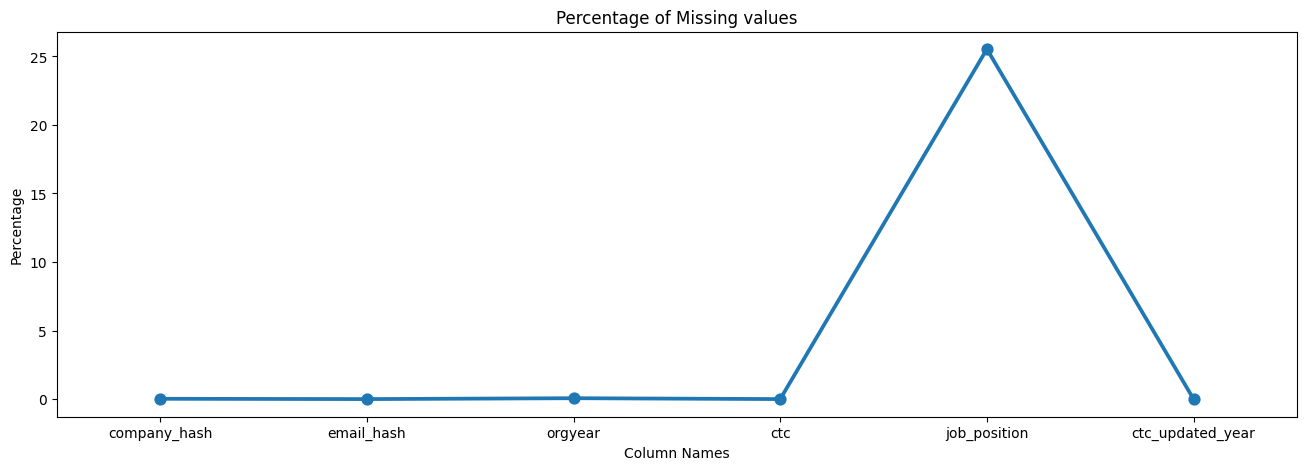

In [21]:
missing = pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot(x='index',y=0,data=missing)          # column name=0
plt.xticks(fontsize =10)
plt.title("Percentage of Missing values")
plt.ylabel("Percentage")
plt.xlabel("Column Names")
plt.show()

In [22]:
df.email_hash.value_counts().head(10)

email_hash
bbace3cc586400bbc65765bc6a16b77d8913836cfc98b77c05488f02f5714a4b    10
298528ce3160cc761e4dc37a07337ee2e0589df251d73645aae209b010210eee     9
3e5e49daa5527a6d5a33599b238bf9bf31e85b9efa9a94f1c88c5e15a6f31378     9
6842660273f70e9aa239026ba33bfe82275d6ab0d20124021b952b5bc3d07e6c     9
d15041f58bb01c8ee29f72e33b136e26bc32f3169a40b53d75fe7ae9cbb9a551     8
faf40195f8c58d5c7edc758cc725a762d51920da996410b80ac4a4d85c803da0     8
4818edfd67ed8563dde5d083306485d91d19f4f1c95d193a1700e79dd245b75c     8
c0eb129061675da412b0deb15871dd06ef0d7cd86eb5f7e8cc6a20b0d1938183     8
d598d6f1fb21b45593c2afc1c2f76ae9f4cb7167156cdf93246d4192a89d8065     8
b4d5afa09bec8689017d8b29701b80d664ca37b83cb883376b2e95191320da66     8
Name: count, dtype: int64

In [23]:
df[df['email_hash']=='bbace3cc586400bbc65765bc6a16b77d8913836cfc98b77c05488f02f5714a4b']

company_hash  \
24109   oxej ntwyzgrgsxto rxbxnta   
45984   oxej ntwyzgrgsxto rxbxnta   
72315   oxej ntwyzgrgsxto rxbxnta   
102915  oxej ntwyzgrgsxto rxbxnta   
117764  oxej ntwyzgrgsxto rxbxnta   
121483  oxej ntwyzgrgsxto rxbxnta   
124476  oxej ntwyzgrgsxto rxbxnta   
144479  oxej ntwyzgrgsxto rxbxnta   
152801  oxej ntwyzgrgsxto rxbxnta   
159835  oxej ntwyzgrgsxto rxbxnta   

                                               email_hash  orgyear     ctc  \
24109   bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...   2018.0  720000   
45984   bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...   2018.0  720000   
72315   bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...   2018.0  720000   
102915  bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...   2018.0  720000   
117764  bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...   2018.0  720000   
121483  bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...   2018.0  660000   
124476  bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...   2018.0  660000   
144479  bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...   2018.0  660000   
152801  bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...   2018.0  660000   
159835  bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...   2018.0  660000   

              job_position  ctc_updated_year  
24109                  NaN              2020  
45984     Support Engineer              2020  
72315                Other              2020  
102915  FullStack Engineer              2020  
117764        Data Analyst              2020  
121483               Other              2019  
124476    Support Engineer              2019  
144479  FullStack Engineer              2019  
152801     Devops Engineer              2019  
159835                 NaN              2019

In [24]:
df.drop(columns=['job_position']).duplicated().sum()

np.int64(38948)

As we can see if we remove the Job_positions, there will be 38948 duplicate instances. So there is a possibility that a person can work for many roles that are integrated with each other but instead of nesting them, they are shown as different rows. A learner changing job position 10 times in same company and that too in a span of 2 years is illogical.

In [25]:
df['job_position'].value_counts().head(10)

job_position
Backend Engineer          43546
FullStack Engineer        24711
Other                     18071
Frontend Engineer         10417
Engineering Leadership     6870
QA Engineer                6587
Data Scientist             5367
Android Engineer           5356
SDET                       4967
Devops Engineer            4612
Name: count, dtype: int64

In [26]:
df[df['job_position'].str.contains('Software',case=False, na=False)]['job_position'].value_counts()

job_position
Senior  Software Engineer           55
Software Engineer (Backend)         42
Software Engineer 2                 22
Associate Software Engineer         18
Software  Engineer                  17
                                    ..
Software Dev. Engineer               1
Software Engineer Android Intern     1
Software Engineer 3                  1
Core Engineer Software Developer     1
Analyst / Software Engineer          1
Name: count, Length: 177, dtype: int64

There are different job_positions like SDE1, SDE2, software engineer, senior software engineer, software engineer 2 etc, which can be a single role, so lets integrate them into one. But before that lets try to fill null values in this column using users mode value for job_position.

In [27]:
df['job_position'].isna().sum()

np.int64(52548)

In [28]:
# for job_position column
def fill_with_mode(group):
    mode_job = group['job_position'].mode()
    return group['job_position'].fillna(mode_job[0] if not mode_job.empty else 'Unknown')

df['job_position']=df.groupby('email_hash').apply(fill_with_mode).reset_index(level=0, drop=True)

In [29]:
df['job_position'].isna().sum()

np.int64(0)

# **EDA**

## **1. Univariate Analysis**

### ***job_position***

This column seems complicated and informative. Lets dwelve deep into it first.

In [30]:
df['job_position'].value_counts()

job_position
Backend Engineer                53985
FullStack Engineer              31110
Other                           22110
Unknown                         21155
Frontend Engineer               12775
                                ...  
Product Development Engineer        1
Software Dev. Engineer              1
Jr. Software Engineer               1
Product solution Engineer           1
Java Software Engineer              1
Name: count, Length: 1017, dtype: int64

In [31]:
# Cleaning Data
import re

def clear_feat(col_data):
    new_data=re.sub('[^A-Za-z ]+', '', col_data)
    return new_data

In [32]:
df['job_position']=df['job_position'].apply(clear_feat)
df['job_position']=df['job_position'].str.strip().str.lower()
df['job_position']

0                      other
1         fullstack engineer
2           backend engineer
3           backend engineer
4         fullstack engineer
                 ...        
205838               unknown
205839               unknown
205840               unknown
205841               unknown
205842               unknown
Name: job_position, Length: 205809, dtype: object

In [33]:
df.duplicated().sum()

np.int64(26821)

In [34]:
df.drop_duplicates(inplace=True)
print(f'After removing duplicates, the dataset has {df.shape[0]} rows and {df.shape[1]} columns.')

After removing duplicates, the dataset has 178988 rows and 6 columns.


In [35]:
df['job_position'].nunique()

856

In [36]:
df['job_position'].value_counts().iloc[:20]

job_position
backend engineer          45575
fullstack engineer        26812
unknown                   21155
other                     18562
frontend engineer         10715
engineering leadership     6921
qa engineer                6666
android engineer           5485
data scientist             5472
sdet                       5022
devops engineer            4678
support engineer           3675
data analyst               3010
engineering intern         2810
ios engineer               2774
product designer           1320
backend architect          1311
research engineers         1262
product manager            1170
program manager             816
Name: count, dtype: int64

In [37]:
df_filtered = df[df['job_position'].isin(df['job_position'].value_counts()[lambda x: x >= 2].index)]
df_filtered['job_position'].value_counts()

job_position
backend engineer               45575
fullstack engineer             26812
unknown                        21155
other                          18562
frontend engineer              10715
                               ...  
software developer i               2
software dev engineer              2
embedded software engineer         2
software engineer associate        2
reasearch engineer                 2
Name: count, Length: 232, dtype: int64

We can see there are only 232 job_positions which have atleast 2 users, remaining roles have 1 learner each, which shows that learners belonging to these roles are negligible or kind of outliers. Lets see if these roles have any other particular features or not.

In [38]:
import plotly.express as px

# Get top 10 job positions
top_jobs = df['job_position'].value_counts().head(10).reset_index()
top_jobs.columns = ['job_position', 'Count']

# Create interactive horizontal bar chart
fig = px.bar(
    top_jobs,
    x='Count',
    y='job_position',
    orientation='h',
    title='Top 10 Job Positions',
    text='Count',
    hover_data={'job_position': True, 'Count': True},
)

# Reverse the Y-axis to match your Matplotlib version
fig.update_yaxes(autorange="reversed")

# Customize layout
fig.update_traces(textposition='inside')
fig.update_layout(
    xaxis_title='Count',
    yaxis_title='Job Position',
    template='plotly_white',
)

fig.show()


**Disclaimer : Interactive Plots through plotly can be viewed on colab for better Experience**

**Comments :**

Backend engineers dominate with 45,575 counts, followed by fullstack engineers at 26,818, reflecting industry demand for backend and versatile development skills. A significant "unknown" category (21,155) is there, we need to acknoledge those unknown values as well. Lets just keep it as it is.

In [39]:
#Lets categorize the Job positions :
def categorize_job(title):
    if 'intern' in title or 'trainee' in title:
        return 'Internship'
    elif any(keyword in title for keyword in['owner','ceo','founder','entrepreneur','cto']):
        return 'Top Officials'
    elif 'analyst' in title or 'analytics' in title:
        return 'Analyst'
    elif 'data scientist' in title:
        return 'Data Scientist'
    elif any(keyword in title for keyword in ['research','rd ',' rd','scientist']):
        return 'Research'
    elif 'data' in title and 'engineer' in title:
        return 'Data Engineer'
    elif any(keyword in title for keyword in ['facilitator','teacher','teaching','lecturer','pgt','professor','faculty']):
        return 'Teaching'
    elif any(keyword in title for keyword in ['test','qa','qc','automation']):
        return 'Quality Assurance and Testing'
    elif any(keyword in title for keyword in ['software','sde','developer','programmer']):
        return 'Software'
    elif any(keyword in title for keyword in ['manager','leader','head','director','lead','executive','president']):
        return 'Management'
    elif any(keyword in title for keyword in ['mobile','ios','flutter','android']):
        return 'Mobile Engineer'
    elif any(keyword in title for keyword in ['machine learning', 'ml', 'm l','aiml','ai']):
        return 'ML Engineer'
    elif any(keyword in title for keyword in['learning','no job','student','fresher', 'graduate', 'not employed','unemployed']):
        return 'Fresher'
    elif 'frontend' in title or 'web' in title:
        return 'Frontend Engineer'
    elif any(keyword in title for keyword in ['backend','application','integration']):
        return 'Backend Engineer'
    elif any(keyword in title for keyword in ['support','technical','escalation','services','release','pop', 'risk investigator','power plant','fibre','highway','room','mechanical']):
        return 'Support & Maintenance Engineer'
    elif any(keyword in title for keyword in['cyber','IT','iaas','cloud','techops','server','ware','devops','system','performance','radio']):
        return 'IT and Cyber Security'
    elif any(keyword in title for keyword in['product','solution','project','fullstack','implementation','development','platform','design','engineer']):
        return 'Product Development'
    elif any(keyword in title for keyword in['database administrator','oracle dba','linux administrator','network administrator']):
        return 'Database Administration'
    elif any(keyword in title for keyword in ['talent','human','chief people','consul']):
        return 'Human Resources'
    elif any(keyword in title for keyword in ['administrat', 'associate','data','technology']):
        return 'Operations/Administrative Roles'
    elif 'unknown' in title:
        return 'Unknown'
    else:
      return 'Non Technical Roles'

df['job_category'] = df['job_position'].apply(categorize_job)
df['job_category'].value_counts()

job_category
Backend Engineer                   46916
Product Development                28263
Unknown                            21155
Non Technical Roles                19329
Frontend Engineer                  10721
Management                          9189
Mobile Engineer                     8262
Quality Assurance and Testing       6708
Software                            5719
Data Scientist                      5478
IT and Cyber Security               4793
Support & Maintenance Engineer      3886
Analyst                             3125
Internship                          2929
Research                            1309
Database Administration              563
Top Officials                        398
Human Resources                       70
Operations/Administrative Roles       58
Fresher                               36
ML Engineer                           29
Data Engineer                         26
Teaching                              26
Name: count, dtype: int64

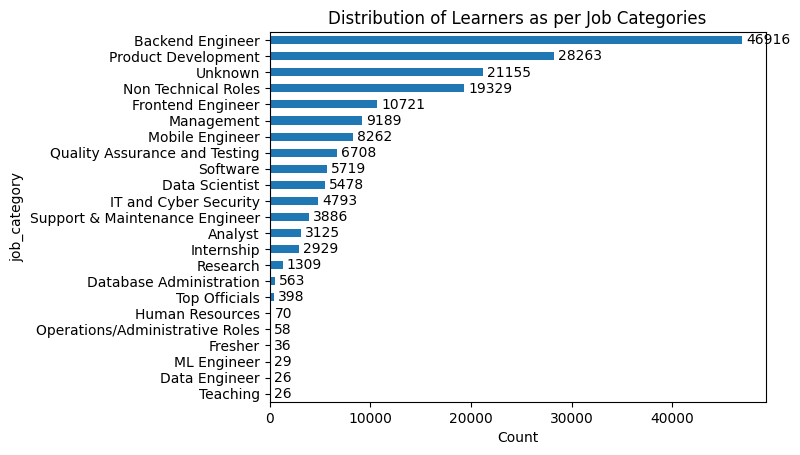

In [40]:
ax = df['job_category'].value_counts().plot(kind='barh')

# Add labels on each bar
for container in ax.containers:
    ax.bar_label(container, label_type='edge', padding=3)

# Reverse Y-axis to keep order
ax.invert_yaxis()

plt.title('Distribution of Learners as per Job Categories')
plt.xlabel('Count')
plt.show()

1. **Backend Engineer Leading the Chart**: The "Backend Engineer" category remains the most prominent with **46,916** learners, reflecting its critical role in product architecture.  

2. **Product Development is in High Demand**: "Product Development" emerges as the second-largest category with **28,263** learners, showcasing its importance in creating innovative solutions.

3. **Significant Unknown Data**: The "Unknown" category (**21,155**) indicates a need for improved job role classification or data quality.

4. **Non-Technical Roles are a Necessity.**: With **19,239** learners, non-technical roles form a notable segment, highlighting Scaler's appeal beyond technical domains.

5. **Data Science roles preparing for take off**: The "Data Scientist" category has **5,478** learners, underscoring growing interest in this high-demand field.

6. **Specialized Roles being too less**: Categories like "ML Engineer" (**29**) and "Data Engineer" (**26**) indicate niche interest areas with scope for targeted growth.

In [41]:
# checking roles in non technical category
df[df['job_category']=='Non Technical Roles']['job_position'].value_counts().head(15)

job_position
other                  18562
non coder                601
mts                        9
                           9
na                         5
no                         4
full stack devloper        3
ase                        3
sales                      3
so                         2
driver                     2
not applicable             2
zomato                     2
technician                 2
smts                       2
Name: count, dtype: int64

In [42]:
df[df.drop(['job_position'],axis=1).duplicated()]

company_hash  \
4718                                          bxwqgogen   
5110                                          avzopt xn   
9854                    vwwgrxnt ogenfvqt xzaxv ucn rna   
10014   lvjutt xzonxnhnt ge xzegqbvnxgz ntwyzgrgsjzgxav   
10397                                   ovx trtwnqxwvro   
...                                                 ...   
202157                        xmb xzaxv uqxcvnt rxbxnta   
202182                                           gqvwrt   
202524                                         ouqxzsbr   
203432                       ytfrtnn uvwpvqa tzntquqxot   
204918                                   adw ntwyzgrgsj   

                                               email_hash  orgyear      ctc  \
4718    dceb289be0e23a77c5a02d193997abc3109e8805101777...   2011.0  6900000   
5110    3d6fb1d08f0e6129d97089626f33ca3747a9d495291723...   2005.0  4400000   
9854    e384a1c1bce518ec3962ed3da2b626a007edf66cce2458...   2011.0  2100000   
10014   e83088332191a14dfaa9131eeafb4f596809c34b8520c2...   2018.0   200000   
10397   7d021961cae2b6eaacce2c09ecaa75320654f8b63ef2c5...   2016.0   860000   
...                                                   ...      ...      ...   
202157  ea3b6c66270fb97616a8315fe203314a033da841ab4793...   2016.0  1675000   
202182  be83bbdb1a0909062489156ed76be3a9ce815274339a81...   2008.0  2000000   
202524  ee5ab46320f580d8b5bf508bb75df74d6cbca13f963cd5...   2011.0  1800000   
203432  a566e153d1fafc0be8d4a28038fd4616d09a97a32ab0c5...   2016.0   200000   
204918  9a965b65f571cd8233ffb083660bc87ccdc6291838b301...   2012.0  5000000   

               job_position  ctc_updated_year         job_category  
4718      backend architect              2019     Backend Engineer  
5110    architect team lead              2021           Management  
9854       backend engineer              2020     Backend Engineer  
10014     backend architect              2019     Backend Engineer  
10397       product manager              2020           Management  
...                     ...               ...                  ...  
202157    backend architect              2019     Backend Engineer  
202182    backend architect              2019     Backend Engineer  
202524    backend architect              2021     Backend Engineer  
203432            non coder              2021  Non Technical Roles  
204918      product manager              2019           Management  

[406 rows x 7 columns]

In [43]:
# Dropping job_position after binning
df_new=df.copy()
df_new.drop(columns=['job_position'],inplace=True)

In [44]:
# dropping duplicates
df_new.drop_duplicates(inplace=True)
print('Shape of Dataset before Dropping Duplicates',df.shape)
print('Shape of Dataset after Dropping Duplicates',df_new.shape)

Shape of Dataset before Dropping Duplicates (178988, 7)
Shape of Dataset after Dropping Duplicates (178582, 6)


### ***company_hash***

In [45]:
df_new['company_hash'].value_counts().head(10)

company_hash
nvnv wgzohrnvzwj otqcxwto    6556
xzegojo                      4284
vbvkgz                       3091
wgszxkvzn                    2541
zgn vuurxwvmrt vwwghzn       2458
vwwtznhqt                    2294
gqvwrt                       2184
fxuqg rxbxnta                2131
bxwqgogen                    1959
wvustbxzx                    1621
Name: count, dtype: int64

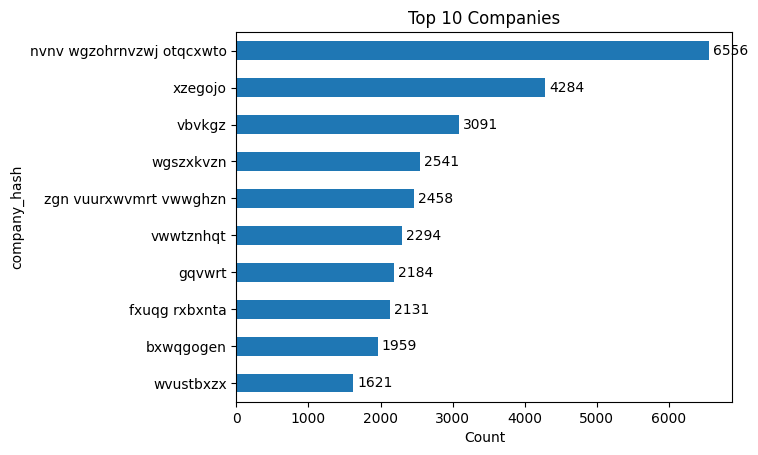

In [46]:
ax =df_new['company_hash'].value_counts().head(10).plot(kind='barh')

# Add labels on each bar
for container in ax.containers:
    ax.bar_label(container, label_type='edge', padding=3)

ax.invert_yaxis()

plt.title('Top 10 Companies')
plt.xlabel('Count')
plt.show()

1. **Top Company Leads by a Large Margin**: The company with the hash `nvnv wgzohrnvzwj otqcxwto` has the highest number of learners (**6,556**), indicating it may have a significant workforce interested in upskilling.

2. **Second and Third Companies**: `xzegojo` (**4,284**) and `vbvkgz` (**3,091**) follow, with learner counts significantly lower than the top company, showing a steep drop in representation.

3. **Diversity**: The remaining companies in the top 10 have learner counts ranging from **2,541** to **1,621**, indicating a relatively more even distribution among mid-tier companies.

4. **Future Prospects**: These companies might represent sectors or industries with higher demand for skills offered by Scaler, potentially in technology or software development.

### ***email_hash***

In [47]:
df_new.email_hash.value_counts().head(10)

email_hash
3e5e49daa5527a6d5a33599b238bf9bf31e85b9efa9a94f1c88c5e15a6f31378    9
6842660273f70e9aa239026ba33bfe82275d6ab0d20124021b952b5bc3d07e6c    9
c0eb129061675da412b0deb15871dd06ef0d7cd86eb5f7e8cc6a20b0d1938183    8
298528ce3160cc761e4dc37a07337ee2e0589df251d73645aae209b010210eee    8
bbace3cc586400bbc65765bc6a16b77d8913836cfc98b77c05488f02f5714a4b    8
b4d5afa09bec8689017d8b29701b80d664ca37b83cb883376b2e95191320da66    7
f5279f186abfb98a09d85a4467b99863c0bfc91c1147e542d6d23a6a69c9a7be    7
d15041f58bb01c8ee29f72e33b136e26bc32f3169a40b53d75fe7ae9cbb9a551    7
caf66f38a8e742b7690dceb5b02d81ad8be684cfb6dd29b639a385b83748110b    7
5dcd62ab1a606642f3dde6f536f5a343a8e943f215c463f945dd1bad9bff1531    7
Name: count, dtype: int64

In [48]:
df_new[df_new.email_hash=='bbace3cc586400bbc65765bc6a16b77d8913836cfc98b77c05488f02f5714a4b']

company_hash  \
24109   oxej ntwyzgrgsxto rxbxnta   
45984   oxej ntwyzgrgsxto rxbxnta   
72315   oxej ntwyzgrgsxto rxbxnta   
117764  oxej ntwyzgrgsxto rxbxnta   
121483  oxej ntwyzgrgsxto rxbxnta   
124476  oxej ntwyzgrgsxto rxbxnta   
144479  oxej ntwyzgrgsxto rxbxnta   
152801  oxej ntwyzgrgsxto rxbxnta   

                                               email_hash  orgyear     ctc  \
24109   bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...   2018.0  720000   
45984   bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...   2018.0  720000   
72315   bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...   2018.0  720000   
117764  bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...   2018.0  720000   
121483  bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...   2018.0  660000   
124476  bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...   2018.0  660000   
144479  bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...   2018.0  660000   
152801  bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...   2018.0  660000   

        ctc_updated_year                    job_category  
24109               2020             Product Development  
45984               2020  Support & Maintenance Engineer  
72315               2020             Non Technical Roles  
117764              2020                         Analyst  
121483              2019             Non Technical Roles  
124476              2019  Support & Maintenance Engineer  
144479              2019             Product Development  
152801              2019           IT and Cyber Security

### ***ctc_updated_year***

In [49]:
df_new['ctc_updated_year'].value_counts()

ctc_updated_year
2019    64351
2021    47093
2020    44619
2017     7461
2018     6727
2016     5438
2015     2893
Name: count, dtype: int64

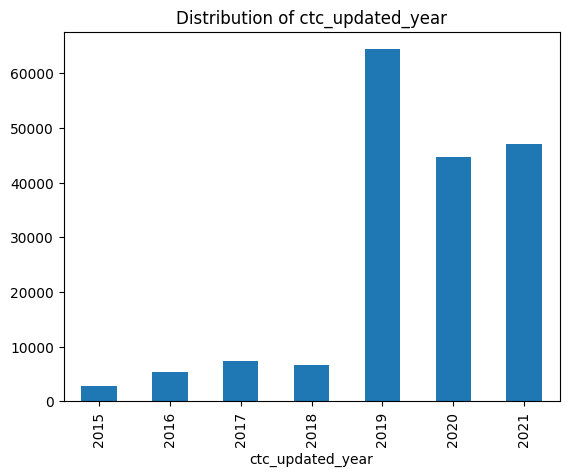

In [50]:
df_new['ctc_updated_year'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of ctc_updated_year')
plt.ylabel('')
plt.show()

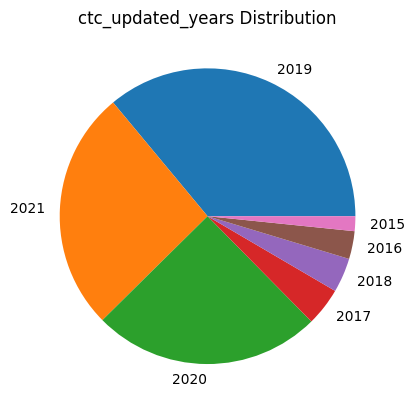

In [51]:
df_new['ctc_updated_year'].value_counts(normalize=True).plot(kind='pie')
plt.title('ctc_updated_years Distribution')
plt.ylabel('')
plt.show()

1. **Data Dominance**: The majority of the entries are from recent years, with **2019** having the highest count at **64,351**, followed by **2021** (**47,093**) and **2020** (**44,619**). This suggests increased activity or better data recording in these years.  

2. **Steady Decline in Early Years**: Data decreases significantly in earlier years, with **2017** (7,461) and prior years having notably lower counts.  

3. **Low Representation for Early Years**: Years like **2015** and **2016** have minimal representation, indicating either fewer learners or incomplete historical data.  

4. **Recent Trends**: The data skew toward recent years can guide analysis to focus on the latest trends in CTC updates for actionable insights.  

5. **Outliers**: The distribution suggests the need to ensure data from earlier years is complete and consistent for meaningful comparisons over time.

### ***orgyear***



In [52]:
df_new['orgyear'].value_counts()

orgyear
2018.0    21572
2016.0    20169
2017.0    20014
2019.0    19144
2015.0    18184
          ...  
1976.0        1
1977.0        1
1979.0        1
2204.0        1
1900.0        1
Name: count, Length: 61, dtype: int64

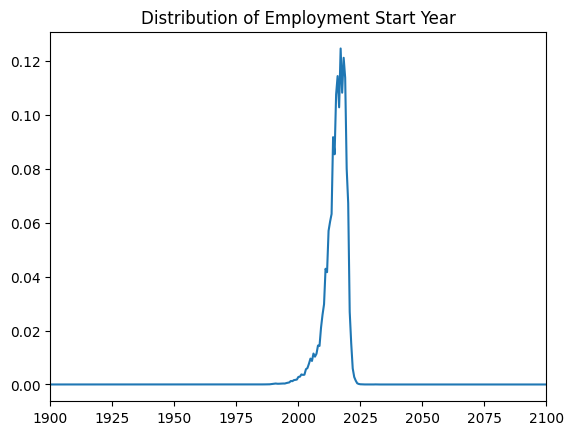

In [53]:
df_new['orgyear'].plot(kind='kde')
plt.xlim(1900,2100)
plt.title('Distribution of Employment Start Year')
plt.ylabel('')
plt.show()

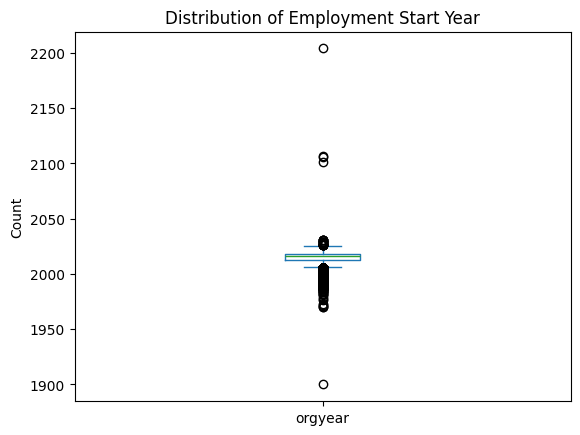

In [54]:
df_new['orgyear'].plot(kind='box')
plt.title('Distribution of Employment Start Year')
plt.ylabel('Count')
plt.show()

In [55]:
df_new['joining_year']=df_new['orgyear']
df_new.loc[(df_new['joining_year']>2021) |(df_new['joining_year']<1995),'joining_year']=np.nan

In [56]:
df_new.joining_year.isna().sum()

np.int64(1599)

In [57]:
min_org_year=df_new.groupby('email_hash')['joining_year'].transform('min')
df_new['joining_year']=df_new['joining_year'].fillna(min_org_year)
df_new.isna().sum()

company_hash          39
email_hash             0
orgyear              128
ctc                    0
ctc_updated_year       0
job_category           0
joining_year        1529
dtype: int64

In [58]:
min_org_year=df_new['joining_year'].mean()
df_new['joining_year']=df_new['joining_year'].fillna(min_org_year)
df_new.isna().sum()

company_hash         39
email_hash            0
orgyear             128
ctc                   0
ctc_updated_year      0
job_category          0
joining_year          0
dtype: int64

In [59]:
df_new.drop('orgyear',axis=1,inplace=True)

In [60]:
df_new['joining_year']=df_new['joining_year'].astype(int)
df_new['joining_year'].value_counts()

joining_year
2018    21584
2016    20178
2017    20022
2015    19714
2019    19160
2014    14891
2013    11077
2020    11059
2012     9398
2011     7062
2010     5132
2009     3362
2021     3103
2008     2414
2007     1993
2006     1854
2005     1657
2004     1308
2003      906
2001      641
2002      613
2000      454
1999      310
1998      265
1997      217
1996      125
1995       83
Name: count, dtype: int64

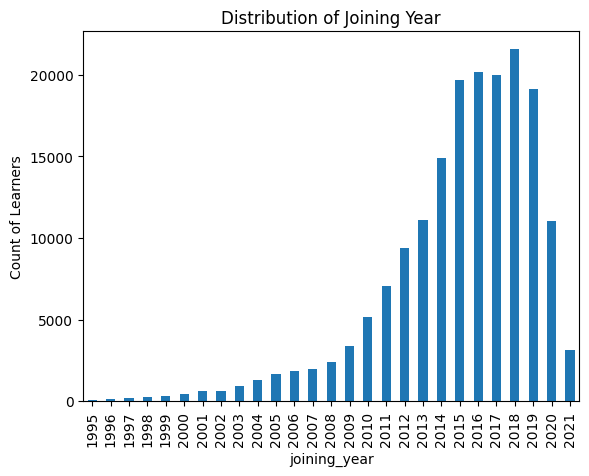

In [61]:
df_new['joining_year'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Joining Year')
plt.ylabel('Count of Learners')
plt.show()

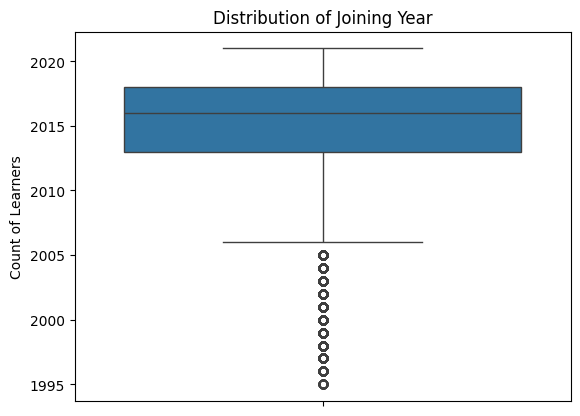

In [62]:
sns.boxplot(df_new['joining_year'])
plt.title('Distribution of Joining Year')
plt.ylabel('Count of Learners')
plt.show()

### ***ctc***

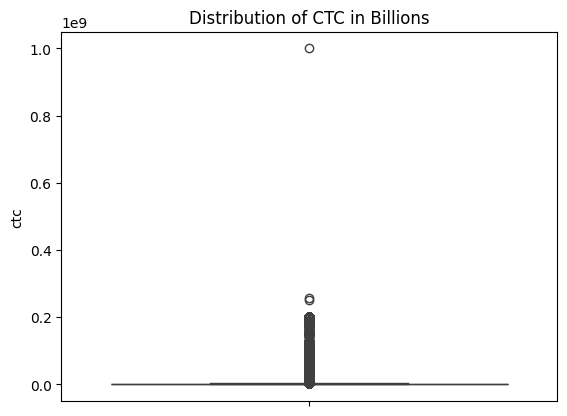

In [63]:
sns.boxplot(df_new['ctc'])
plt.title('Distribution of CTC in Billions')
plt.show()

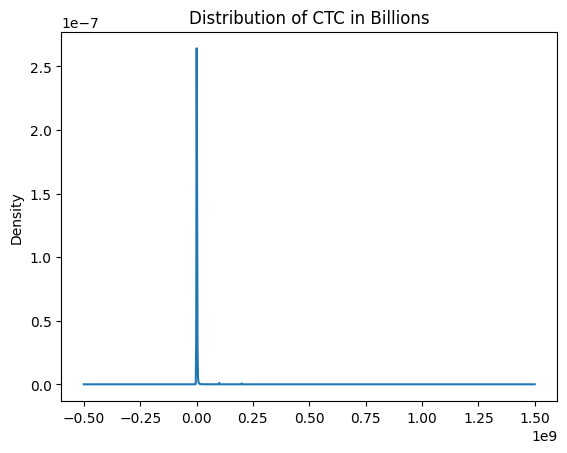

In [64]:
df_new['ctc'].plot(kind='kde')
plt.title('Distribution of CTC in Billions')
plt.show()

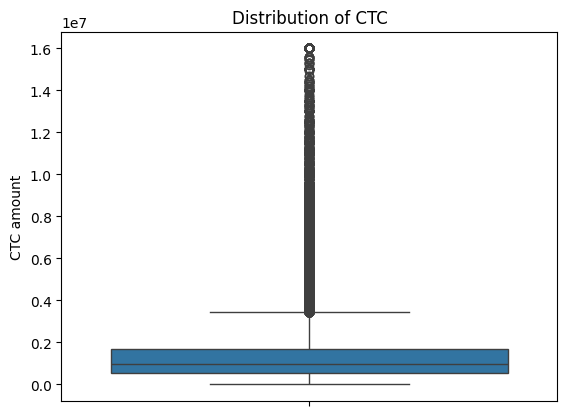

In [65]:
df_new['ctc']=np.clip(df_new['ctc'],0,np.quantile(df_new['ctc'],0.99))

sns.boxplot(df_new['ctc'])
plt.title('Distribution of CTC')
plt.ylabel('CTC amount')
plt.show()

## Validating the data

In [66]:
df_new[df_new['ctc_updated_year']<df_new['joining_year']]

company_hash  \
8                  utqoxontzn ojontbo   
17                               puxn   
40                     rvqotz  nghmqg   
48                rgfto wgbuvzxto xzw   
56          axztqg xzzgcvnxgz ucn rna   
...                               ...   
205786                      wyvqstmtt   
205795  qtrxvzwt lxg xzegwgbb rxbxnta   
205796                 zgn vuurxwvmrt   
205801                 zgn vuurxwvmrt   
205834         wyvqntq wgbbhzxwvnxgzo   

                                               email_hash       ctc  \
8       e245da546bf50eba09cb7c9976926bd56557d1ac9a17fb...    450000   
17      26b502eb6439ac80bd618a6f7c2b1c640b84c1e64c472c...   1400000   
40      96b1eb6b3ba24764239d502e3e5d9353af9dbd20594534...   2500000   
48      7ce201f4f032c2af65b5d11f549de91ea3e62920834e72...   3010000   
56      3a8a6f0924d0d337eb63d8f6c6b6a3608913b7e4c95353...    700000   
...                                                   ...       ...   
205786  faa7431795fe5a112893353d47ceb114be2ebdc1f0dff1...   2200000   
205795  aab90adb3d4cdf6a3c2c7a106ce58ec53a706aa082bc11...    700000   
205796  e5ef043e885543843a2ffc11e18ba1662194512592b442...  16000000   
205801  03dea5143d030be1e5040ac960f2eeb4f42e2f4882d182...   1800000   
205834  7dd3d0d543874c1250af3d16266923a77c0b824540d89a...    100000   

        ctc_updated_year         job_category  joining_year  
8                   2019              Unknown          2020  
17                  2019              Unknown          2020  
40                  2020  Non Technical Roles          2021  
48                  2019     Backend Engineer          2020  
56                  2019    Frontend Engineer          2020  
...                  ...                  ...           ...  
205786              2019              Unknown          2020  
205795              2016              Unknown          2017  
205796              2019              Unknown          2021  
205801              2016              Unknown          2019  
205834              2019              Unknown          2020  

[7082 rows x 6 columns]

In [67]:
df_new['ctc_updated_year'] = df_new.apply(lambda x: x['joining_year'] if x['ctc_updated_year'] <
                    x['joining_year'] else x['ctc_updated_year'], axis=1)

## Feature Engineering

In [68]:
df_new['experience_years']=df_new['ctc_updated_year']-df_new['joining_year']
df_new['experience_years'].value_counts().sort_index()

experience_years
0     19622
1     19557
2     23942
3     22788
4     20435
5     17150
6     13728
7     10113
8      7513
9      5657
10     4041
11     2927
12     2252
13     1843
14     1618
15     1309
16     1005
17      748
18      576
19      529
20      471
21      291
22      212
23      141
24       78
25       22
26       14
Name: count, dtype: int64

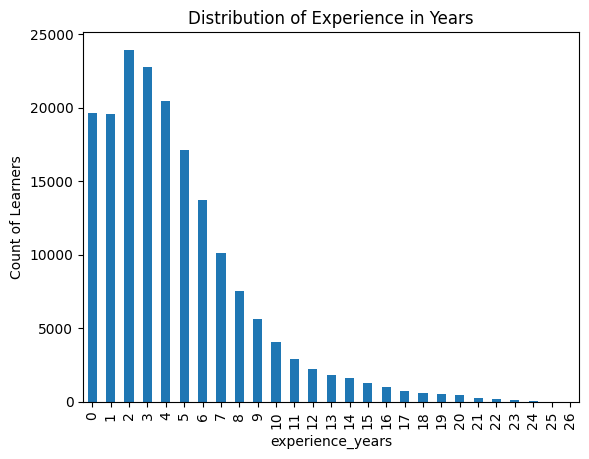

In [69]:
df_new['experience_years'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Experience in Years')
plt.ylabel('Count of Learners')
plt.show()



1. Highest number of learners falls under 0–2 years of experience (64,615 combined), indicating strong participation from fresh graduates or early-career professionals.
2. The 3–6 years of experience window consists of  72,604 learners, representing individuals likely looking to transition into mid-level roles or upscale their skills for growth.
3. There are 8,788 learners with 10–15 years of experience, indicating interest from seasoned professionals seeking specialization or career shifts.


        Learner count progressively decreases as years of experience increase, showing fewer participants in senior-level roles.
  The 16+ years of experience group is a smaller but significant cohort, with 4,118 learners, often C-suite or leadership professionals aiming to update skills or mentor others.



In [70]:
df_new = df_new.sort_values(by=['email_hash', 'ctc_updated_year','ctc'])
df_new['promotion_status'] = df_new.groupby('email_hash')['ctc'].diff().gt(0).fillna(False).astype('int')
df_new

company_hash  \
84638                           bxwqgogen   
506                          nqsn axsxnvr   
51568                               gunhb   
53844               bxwqgotbx wgqugqvnxgz   
138229                       fvrbvqn rvmo   
...                                   ...   
39637            tqxwoogz ogenfvqt wvbuho   
185749                            trnqvcg   
148315  znn avnv srgmvr atrxctqj otqcxwto   
14106                     zwq wgqugqvnxgz   
116860                      sgrabvz ovwyo   

                                               email_hash      ctc  \
84638   00003288036a44374976948c327f246fdbdf0778546904...  3500000   
506     0000aaa0e6b61f7636af1954b43d294484cd151c9b3cf6...   250000   
51568   0000d58fbc18012bf6fa2605a7b0357d126ee69bc41032...  1300000   
53844   000120d0c8aa304fcf12ab4b85e21feb80a342cfea03d4...  2000000   
138229  00014d71a389170e668ba96ae8e1f9d991591acc899025...  3400000   
...                                                   ...      ...   
39637   fffc254e627e4bd1bc0ed7f01f9aebbba7c3cc56ac914e...  3529999   
185749  fffcf97db1e9c13898f4eb4cd1c2fe862358480e104535...  1600000   
148315  fffe7552892f8ca5fb8647d49ca805b72ea0e9538b6b01...   900000   
14106   ffff49f963e4493d8bbc7cc15365423d84a767259f7200...   700000   
116860  ffffa3eb3575f43b86d986911463dce7bcadcea227e5a4...  1500000   

        ctc_updated_year                   job_category  joining_year  \
84638               2019               Backend Engineer          2012   
506                 2020               Backend Engineer          2013   
51568               2021            Product Development          2021   
53844               2021            Product Development          2004   
138229              2018                        Unknown          2009   
...                  ...                            ...           ...   
39637               2019  Quality Assurance and Testing          2004   
185749              2018                        Unknown          2015   
148315              2019          IT and Cyber Security          2014   
14106               2020            Product Development          2020   
116860              2021            Product Development          2018   

        experience_years  promotion_status  
84638                  7                 0  
506                    7                 0  
51568                  0                 0  
53844                 17                 0  
138229                 9                 0  
...                  ...               ...  
39637                 15                 0  
185749                 3                 0  
148315                 5                 0  
14106                  0                 0  
116860                 3                 0  

[178582 rows x 8 columns]

In [71]:
df_new.groupby('email_hash')['promotion_status'].max().value_counts()

promotion_status
0    145640
1      7803
Name: count, dtype: int64

**Approximately 95.2% (145,640 learners) have not received a promotion, while 4.8% (7,803 learners) have achieved one — indicating that a small but notable portion of Scaler learners experience career advancement through the program.**

In [72]:
df_new.duplicated().sum()

np.int64(132)

In [73]:
df_new.drop_duplicates(inplace=True)

In [74]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 178450 entries, 84638 to 116860
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   company_hash      178411 non-null  object
 1   email_hash        178450 non-null  object
 2   ctc               178450 non-null  int64 
 3   ctc_updated_year  178450 non-null  int64 
 4   job_category      178450 non-null  object
 5   joining_year      178450 non-null  int64 
 6   experience_years  178450 non-null  int64 
 7   promotion_status  178450 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 12.3+ MB


## **2. Bi-Variate Analysis :**

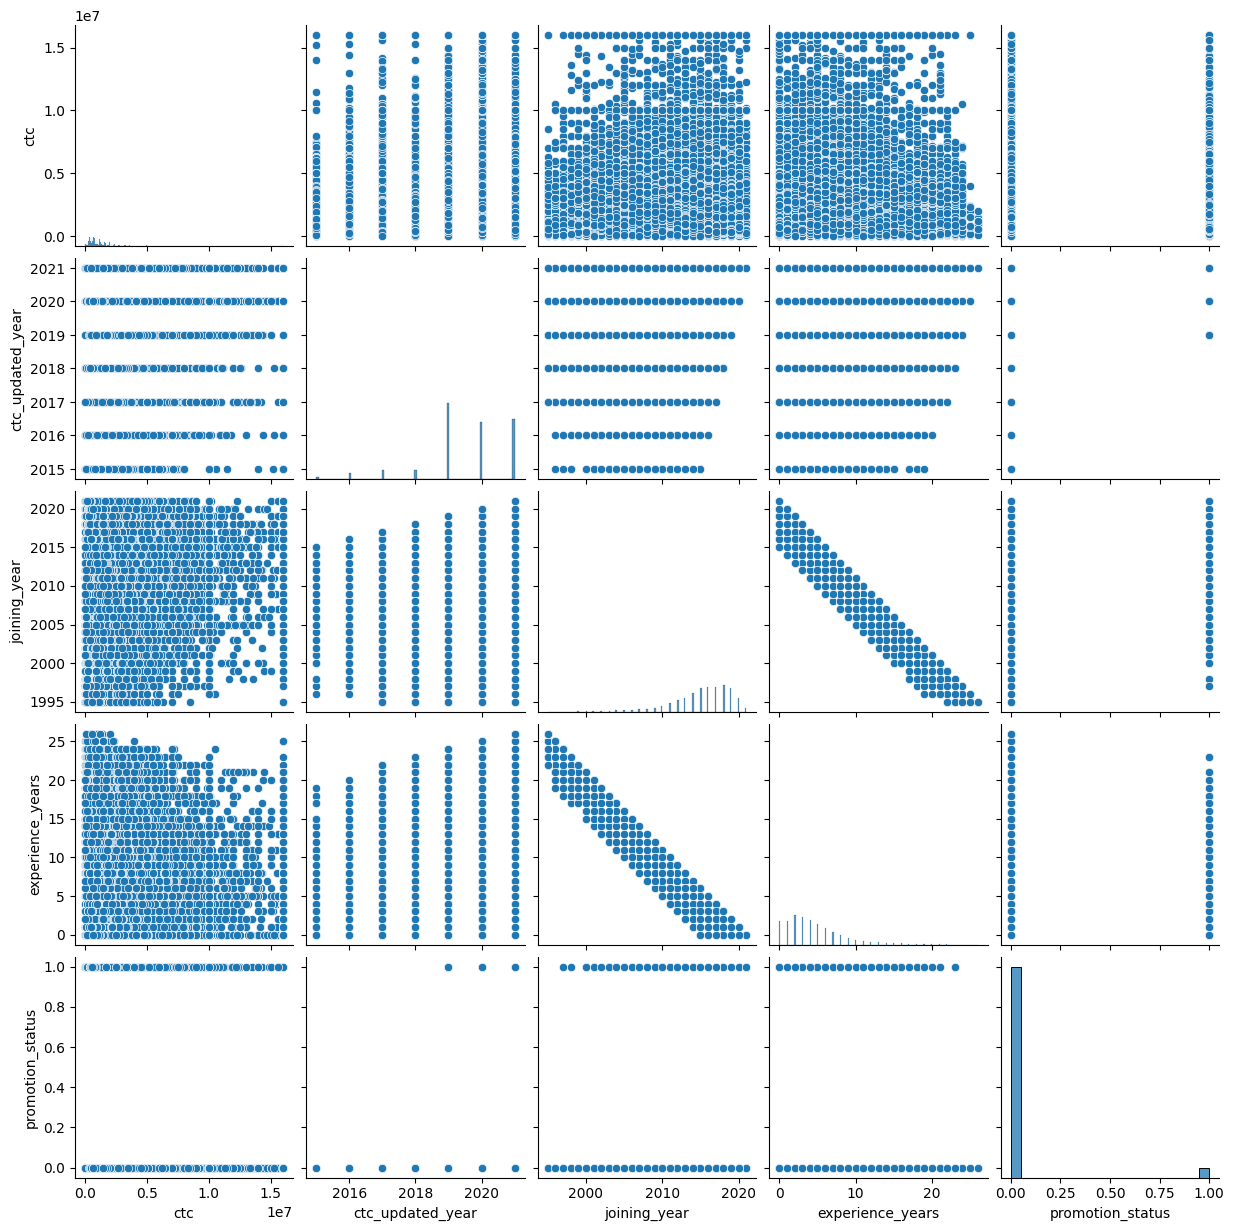

In [75]:
sns.pairplot(df_new)
plt.show()

1. Experience vs. CTC: High experience doesn't guarantee a high salary; the correlation is weak. and There are instances where people with high experience have low ctc and high salary with less experiemce.

2. Redundant Features: joining_year and experience_years are perfectly correlated. Hence removing joining_year.

3. Promotion Window: Promotions are most common for employees with 5-20 years of experience, and rare for early-career (<3years)staff.

4. Imbalanced Data:Far more employees are non-promoted (status=0) than promoted (status=1),which will affect model training.

5. Is there any Better Plots?







In [76]:
df_new.drop('joining_year',axis=1,inplace=True)
df_new.reset_index(drop=True,inplace=True)
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178450 entries, 0 to 178449
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   company_hash      178411 non-null  object
 1   email_hash        178450 non-null  object
 2   ctc               178450 non-null  int64 
 3   ctc_updated_year  178450 non-null  int64 
 4   job_category      178450 non-null  object
 5   experience_years  178450 non-null  int64 
 6   promotion_status  178450 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 9.5+ MB


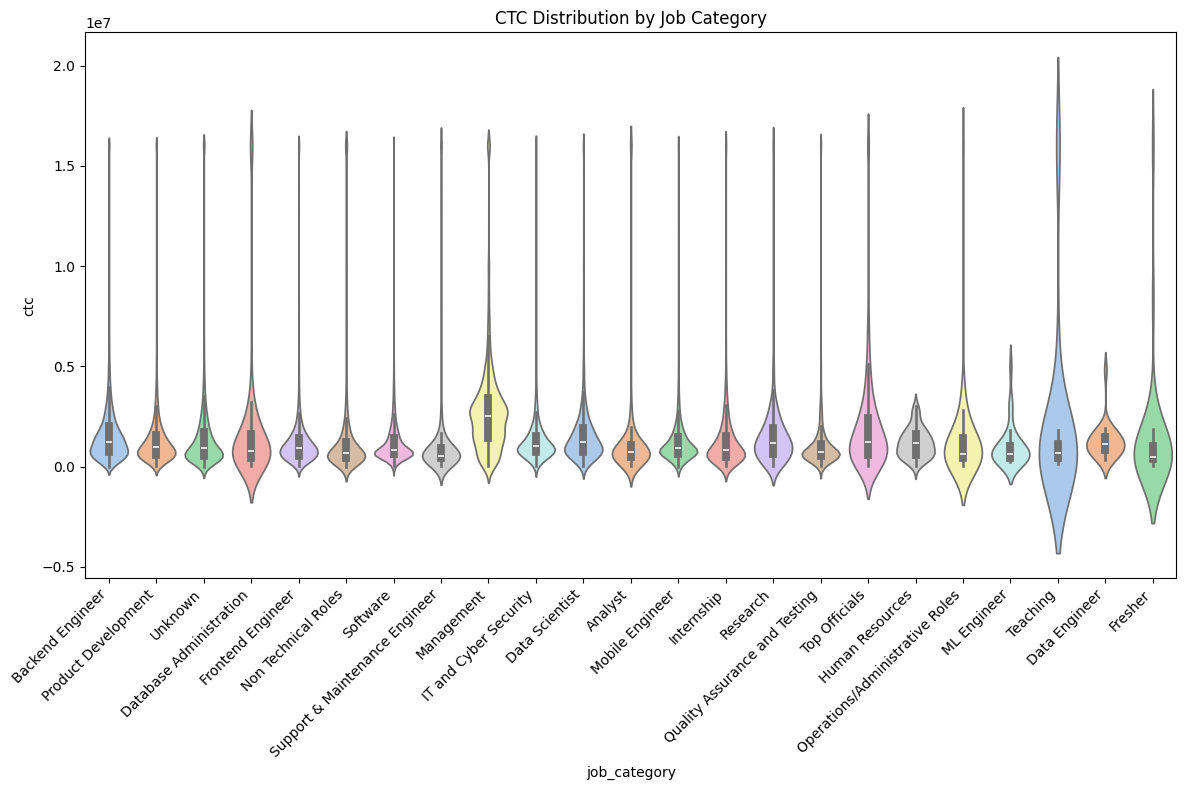

In [77]:
plt.figure(figsize=(12, 8))
sns.violinplot(data=df_new, x='job_category', y='ctc', palette='pastel')
plt.xticks(rotation=45, ha='right')
plt.title('CTC Distribution by Job Category')
plt.tight_layout()
plt.show()

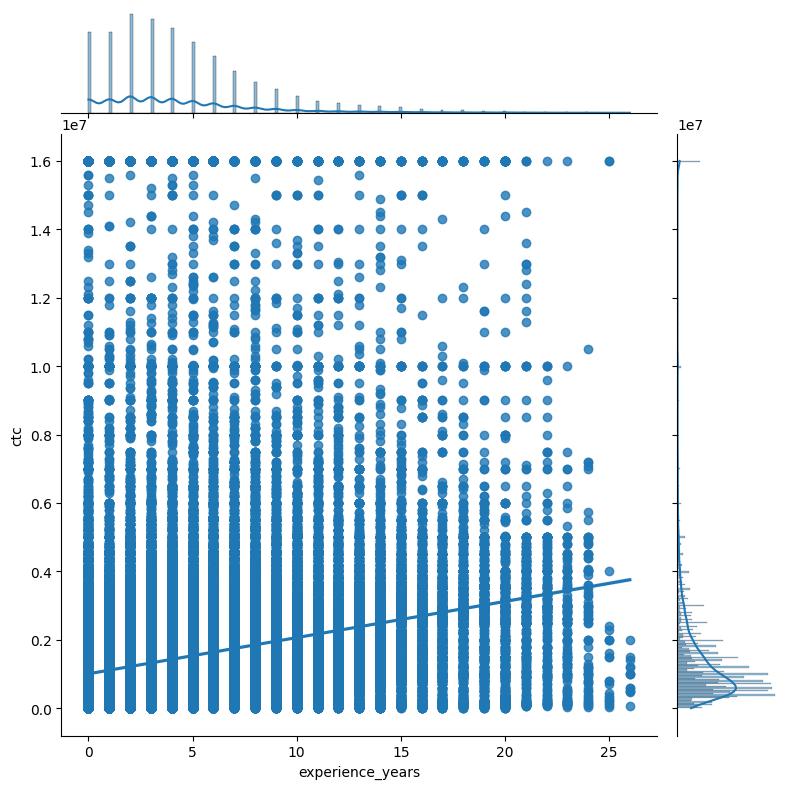

In [78]:
sns.jointplot(data=df_new, x='experience_years', y='ctc', kind='reg', height=8)
plt.savefig('jointplot.png')

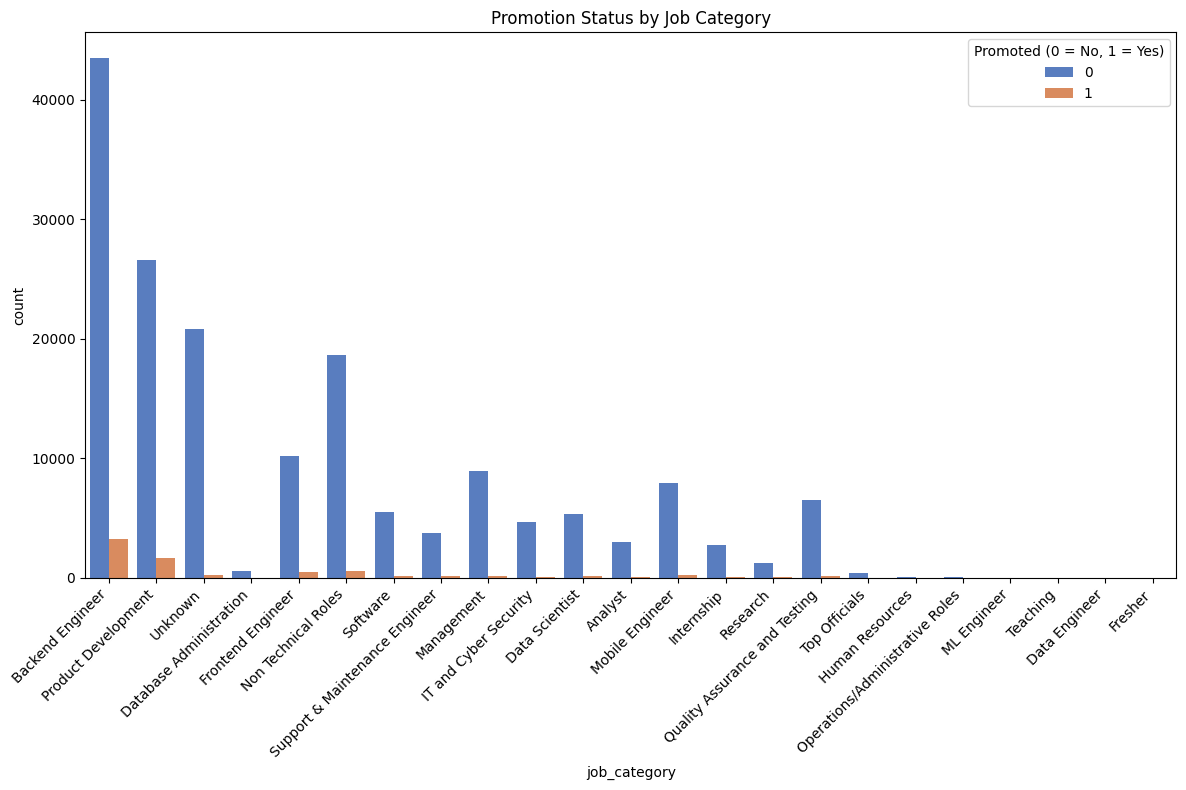

In [79]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df_new, x='job_category', hue='promotion_status', palette='muted')
plt.xticks(rotation=45, ha='right')
plt.title('Promotion Status by Job Category')
plt.legend(title='Promoted (0 = No, 1 = Yes)')
plt.tight_layout()
plt.show()

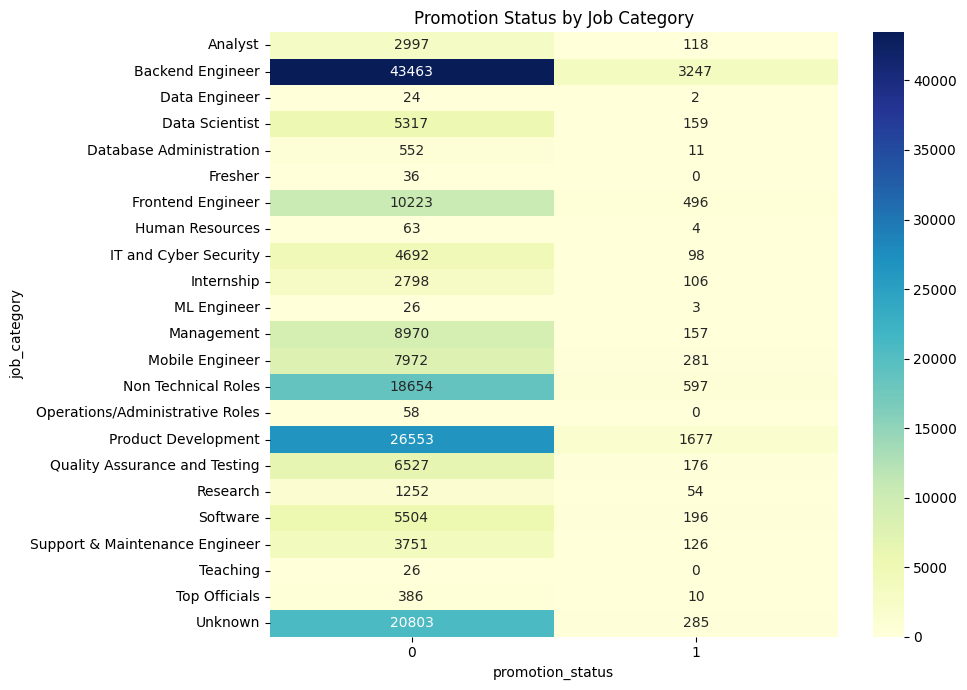

In [80]:
contingency_table = pd.crosstab(df_new['job_category'], df_new['promotion_status'])

plt.figure(figsize=(10, 7))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Promotion Status by Job Category')
plt.tight_layout()
plt.show()


<Axes: xlabel='job_category', ylabel='ctc'>

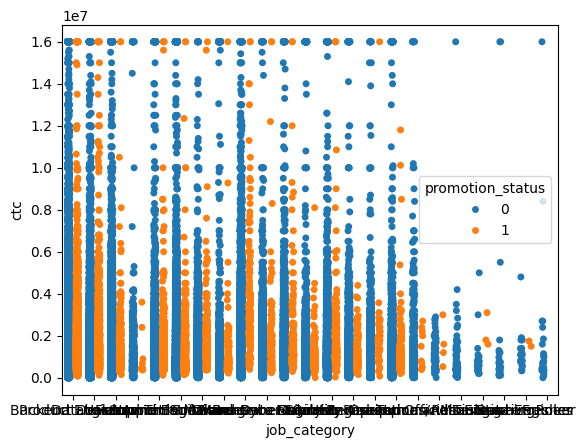

In [81]:

sns.stripplot(data=df_new, x='job_category', y='ctc', hue='promotion_status', dodge=True)


# Summary Statistics So Far

In [82]:
df_new.describe().T

count          mean           std     min       25%  \
ctc               178450.0  1.485871e+06  1.961745e+06     2.0  550000.0   
ctc_updated_year  178450.0  2.019549e+03  1.289167e+00  2015.0    2019.0   
experience_years  178450.0  4.532171e+00  3.931456e+00     0.0       2.0   
promotion_status  178450.0  4.372653e-02  2.044866e-01     0.0       0.0   

                       50%        75%         max  
ctc               990000.0  1700000.0  16000000.0  
ctc_updated_year    2020.0     2021.0      2021.0  
experience_years       4.0        6.0        26.0  
promotion_status       0.0        0.0         1.0

1. CTC (Cost-to-Company):
The mean CTC is approximately ₹1.49 million, but the high standard deviation (₹1.96 million) indicates significant variation in salaries across learners.
The median CTC (₹990,000) is notably lower than the mean, suggesting a right-skewed distribution with a few high earners inflating the average.
Salaries range from ₹35,000 (minimum) to ₹16 million (maximum), indicating learners from entry-level to senior leadership roles.

2. CTC Updated Year:
 The majority of salary updates occurred between 2019 and 2021, as indicated by the 25th percentile (2019), median (2020), and 75th percentile (2021).
This reflects the dataset's recency and focus on current salary trends.
Experience Years:

3. The average experience is 4.53 years, with a standard deviation of 3.93 years, suggesting that most learners are early to mid-career professionals.
The range of experience spans from 0 years (freshers) to 26 years, showing a diverse learner base across all career stages.
The median experience (4 years) indicates a concentration of learners in the early to mid-career bracket.
Promotion Status:

4. The mean value for promotion status is 0.0437, showing that approximately 4.37% of learners have been promoted, aligning with earlier observations.
The high concentration at 0 (as reflected by the 25th, 50th, and 75th percentiles) confirms that most learners have not achieved promotions.

In [83]:
df_new.describe(include='object').T

count  unique  \
company_hash  178411   37299   
email_hash    178450  153443   
job_category  178450      23   

                                                            top   freq  
company_hash                          nvnv wgzohrnvzwj otqcxwto   6544  
email_hash    3e5e49daa5527a6d5a33599b238bf9bf31e85b9efa9a94...      9  
job_category                                   Backend Engineer  46710

1. Company Hash:
There are 178,411 entries spread across 37,299 unique companies, indicating significant representation from diverse organizations.
The most frequent company (nvnv wgzohrnvzwj otqcxwto) appears 6,544 times, suggesting it has the largest learner base, potentially due to a large workforce or active participation in upskilling programs.
2. Email Hash: 153,443 unique email hashes out of 178,450 entries indicate that some learners have participated multiple times or may have duplicate records.
The most common email hash appears 9 times, which may warrant a review for potential duplicates or multiple entries by the same individual.
3. Job Category: There are 23 unique job categories, with Backend Engineer being the most common, accounting for 46,710 entries. This highlights a significant focus on backend development roles among learners.

#Data Pre-processing

In [84]:
df_pre = df_new.copy()
df_pre

company_hash  \
0                               bxwqgogen   
1                            nqsn axsxnvr   
2                                   gunhb   
3                   bxwqgotbx wgqugqvnxgz   
4                            fvrbvqn rvmo   
...                                   ...   
178445           tqxwoogz ogenfvqt wvbuho   
178446                            trnqvcg   
178447  znn avnv srgmvr atrxctqj otqcxwto   
178448                    zwq wgqugqvnxgz   
178449                      sgrabvz ovwyo   

                                               email_hash      ctc  \
0       00003288036a44374976948c327f246fdbdf0778546904...  3500000   
1       0000aaa0e6b61f7636af1954b43d294484cd151c9b3cf6...   250000   
2       0000d58fbc18012bf6fa2605a7b0357d126ee69bc41032...  1300000   
3       000120d0c8aa304fcf12ab4b85e21feb80a342cfea03d4...  2000000   
4       00014d71a389170e668ba96ae8e1f9d991591acc899025...  3400000   
...                                                   ...      ...   
178445  fffc254e627e4bd1bc0ed7f01f9aebbba7c3cc56ac914e...  3529999   
178446  fffcf97db1e9c13898f4eb4cd1c2fe862358480e104535...  1600000   
178447  fffe7552892f8ca5fb8647d49ca805b72ea0e9538b6b01...   900000   
178448  ffff49f963e4493d8bbc7cc15365423d84a767259f7200...   700000   
178449  ffffa3eb3575f43b86d986911463dce7bcadcea227e5a4...  1500000   

        ctc_updated_year                   job_category  experience_years  \
0                   2019               Backend Engineer                 7   
1                   2020               Backend Engineer                 7   
2                   2021            Product Development                 0   
3                   2021            Product Development                17   
4                   2018                        Unknown                 9   
...                  ...                            ...               ...   
178445              2019  Quality Assurance and Testing                15   
178446              2018                        Unknown                 3   
178447              2019          IT and Cyber Security                 5   
178448              2020            Product Development                 0   
178449              2021            Product Development                 3   

        promotion_status  
0                      0  
1                      0  
2                      0  
3                      0  
4                      0  
...                  ...  
178445                 0  
178446                 0  
178447                 0  
178448                 0  
178449                 0  

[178450 rows x 7 columns]

## Label Encoding

In [85]:
le=LabelEncoder()
df_pre['job_category_label']=le.fit_transform(df_pre['job_category'])
df_pre.drop(columns=['job_category'],inplace=True)
df_pre.head()

company_hash                                         email_hash  \
0              bxwqgogen  00003288036a44374976948c327f246fdbdf0778546904...   
1           nqsn axsxnvr  0000aaa0e6b61f7636af1954b43d294484cd151c9b3cf6...   
2                  gunhb  0000d58fbc18012bf6fa2605a7b0357d126ee69bc41032...   
3  bxwqgotbx wgqugqvnxgz  000120d0c8aa304fcf12ab4b85e21feb80a342cfea03d4...   
4           fvrbvqn rvmo  00014d71a389170e668ba96ae8e1f9d991591acc899025...   

       ctc  ctc_updated_year  experience_years  promotion_status  \
0  3500000              2019                 7                 0   
1   250000              2020                 7                 0   
2  1300000              2021                 0                 0   
3  2000000              2021                17                 0   
4  3400000              2018                 9                 0   

   job_category_label  
0                   1  
1                   1  
2                  15  
3                  15  
4                  22

## KNN Imputation

In [86]:
pipe=Pipeline([('scaler', StandardScaler()), ('imputer', KNNImputer(n_neighbors=5))])
df_pre_knn=pd.DataFrame(pipe.fit_transform(df_pre.drop(columns=['email_hash','company_hash'])),columns=df_pre.columns.difference(['email_hash','company_hash']))

In [87]:
df_pre_knn.isna().sum()

ctc                   0
ctc_updated_year      0
experience_years      0
job_category_label    0
promotion_status      0
dtype: int64

In [88]:
df_pre_knn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178450 entries, 0 to 178449
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ctc                 178450 non-null  float64
 1   ctc_updated_year    178450 non-null  float64
 2   experience_years    178450 non-null  float64
 3   job_category_label  178450 non-null  float64
 4   promotion_status    178450 non-null  float64
dtypes: float64(5)
memory usage: 6.8 MB


In [89]:
df_cleaned=pd.concat([df_pre_knn,df_pre[['email_hash','company_hash']]],axis=1)
df_cleaned[df_cleaned['company_hash'].isna()]

ctc  ctc_updated_year  experience_years  job_category_label  \
5469   -0.400599          1.125345         -0.135363           -0.213836   
10337   0.160128         -1.201745         -1.152800           -0.213836   
11754  -0.629987         -0.426049         -0.898441           -0.213836   
15686  -0.400599         -2.753139         -1.152800           -0.213836   
17346  -0.604500          1.125345         -0.898441           -0.213836   
18634   0.364028          1.125345          0.373356           -0.213836   
44544  -0.690138         -1.977442          1.390794           -0.213836   
52492   0.262078          1.125345          1.136434           -0.213836   
56204  -0.502550         -0.426049         -1.152800           -0.213836   
66094  -0.451574         -0.426049          0.118997           -0.213836   
71181  -0.502550         -0.426049         -0.898441           -0.213836   
76976  -0.451574          0.349648         -0.644082           -0.213836   
90599   0.313053          1.125345          1.136434           -0.213836   
91920  -0.604500         -1.201745         -1.152800           -0.213836   
94584  -0.553525          1.125345          0.882075           -0.213836   
98064  -0.655475          0.349648         -0.898441           -0.213836   
99165  -0.640183          1.125345         -0.389722           -0.213836   
100222  7.398601          0.349648          0.118997           -0.213836   
105932 -0.145723          1.125345          1.390794           -0.213836   
111199 -0.553525          1.125345         -0.135363           -0.213836   
114969 -0.701353         -2.753139         -0.898441           -0.213836   
116590 -0.145723         -1.201745         -0.898441           -0.213836   
117052 -0.145723         -0.426049         -1.152800           -0.213836   
119099 -0.270103         -1.201745         -1.152800           -0.213836   
123717 -0.451574          0.349648         -1.152800           -0.213836   
125928  0.058177          1.125345          0.882075            4.676474   
132222  0.262078          0.349648          1.390794           -0.213836   
135071  0.262078         -0.426049         -1.152800           -0.213836   
139469 -0.247674          1.125345          0.627715           -0.213836   
140474 -0.298649          1.125345         -1.152800           -0.213836   
142932 -0.247674         -0.426049          2.153872           -0.213836   
143106 -0.604500          1.125345         -0.135363           -0.213836   
143833  0.262078         -1.201745         -1.152800           -0.213836   
144911 -0.349624          0.349648         -1.152800           -0.213836   
150485 -0.349624         -0.426049         -0.135363           -0.213836   
151768 -0.293551         -0.426049          0.882075           -0.213836   
163290 -0.604500          1.125345         -0.389722           -0.213836   
170523  0.618904         -0.426049         -1.152800           -0.213836   
170688 -0.451574          1.125345          0.373356           -0.213836   

        promotion_status                                         email_hash  \
5469            0.635102  07a60d6e853852471b0963b78a0a3074532572a2580864...   
10337           1.591904  0e781c3797c031c6aad2fa3d97c82773624a5da9a35de9...   
11754           0.361730  1074b55f02e6fc88596db85854e057c98cb53c038e0d7f...   
15686           1.591904  1606fcb8a2b3e4b242df4ee71190194fc556cf0d548616...   
17346           0.361730  18813fe2a50a45cc02c5b3871c676bd147c80ff0327ee9...   
18634           1.591904  1a5f329f97cdac513d7e33b5f8705e46053595ef6254c9...   
44544           1.591904  3fd7b50dc84e8b2493f097c6fc33c8abed19107ed0b1d3...   
52492           1.591904  4baf80fe2b9513f2f1d17d90f26071bd21f4a89d865fa1...   
56204          -0.868444  50f183667fd8a115dda5aa345988b314e1d98a3d937ea0...   
66094           1.591904  5ef6071f5c390f317dfa60f7aadb9ee7a1abc92aaa02fc...   
71181           0.361730  66263f4942b046c67ae6e2570e7825c03792631a0b13f1...   
76976          -1.278502

In [90]:
df_new.dropna(inplace=True)
df_new.isna().sum()

company_hash        0
email_hash          0
ctc                 0
ctc_updated_year    0
job_category        0
experience_years    0
promotion_status    0
dtype: int64

In [91]:
df_new.shape

(178411, 7)

# Clustering Manual Approach

We will approach this three segments as follows:
1. Will do clustering based on company, job position and years of experience lvl with further analysis on basis of designation grouping.
2. 2nd clustering will be based on comapny nad job position with further analysis using class
3. Ultimately based on Company only through tier Groups.

In [92]:
agg_fun={'ctc':'mean',
           'ctc_updated_year':'max',
           'experience_years':'max',
         'promotion_status':'max'}

df_grp=df_new.groupby(['email_hash','company_hash','job_category']).agg(agg_fun).reset_index()
df_grp

email_hash  \
0       00003288036a44374976948c327f246fdbdf0778546904...   
1       0000aaa0e6b61f7636af1954b43d294484cd151c9b3cf6...   
2       0000d58fbc18012bf6fa2605a7b0357d126ee69bc41032...   
3       000120d0c8aa304fcf12ab4b85e21feb80a342cfea03d4...   
4       00014d71a389170e668ba96ae8e1f9d991591acc899025...   
...                                                   ...   
172274  fffc254e627e4bd1bc0ed7f01f9aebbba7c3cc56ac914e...   
172275  fffcf97db1e9c13898f4eb4cd1c2fe862358480e104535...   
172276  fffe7552892f8ca5fb8647d49ca805b72ea0e9538b6b01...   
172277  ffff49f963e4493d8bbc7cc15365423d84a767259f7200...   
172278  ffffa3eb3575f43b86d986911463dce7bcadcea227e5a4...   

                             company_hash                   job_category  \
0                               bxwqgogen               Backend Engineer   
1                            nqsn axsxnvr               Backend Engineer   
2                                   gunhb            Product Development   
3                   bxwqgotbx wgqugqvnxgz            Product Development   
4                            fvrbvqn rvmo                        Unknown   
...                                   ...                            ...   
172274           tqxwoogz ogenfvqt wvbuho  Quality Assurance and Testing   
172275                            trnqvcg                        Unknown   
172276  znn avnv srgmvr atrxctqj otqcxwto          IT and Cyber Security   
172277                    zwq wgqugqvnxgz            Product Development   
172278                      sgrabvz ovwyo            Product Development   

              ctc  ctc_updated_year  experience_years  promotion_status  
0       3500000.0              2019                 7                 0  
1        250000.0              2020                 7                 0  
2       1300000.0              2021                 0                 0  
3       2000000.0              2021                17                 0  
4       3400000.0              2018                 9                 0  
...           ...               ...               ...               ...  
172274  3529999.0              2019                15                 0  
172275  1600000.0              2018                 3                 0  
172276   900000.0              2019                 5                 0  
172277   700000.0              2020                 0                 0  
172278  1500000.0              2021                 3                 0  

[172279 rows x 7 columns]

In [93]:
df_grp.nunique()

email_hash          153411
company_hash         37299
job_category            23
ctc                   3409
ctc_updated_year         7
experience_years        27
promotion_status         2
dtype: int64

In [94]:
df_grp.groupby('email_hash')['company_hash'].nunique().value_counts()

company_hash
1    146550
2      6860
3         1
Name: count, dtype: int64

1. **Majority Stay with One Company**:
   - **146,550 learners** (overwhelming majority) are associated with only **one company**. This indicates stability in employment or a focus on upskilling within their current organization.

2. **Few Work with Two Companies**:
   - Only **6,860 learners** are associated with **two companies**, which could suggest job changes.

3. **Rare Cases of Triple Movement**:
   - Only **1 learner** is associated with **three companies**, indicating rare cases of high mobility or unique employment patterns.

<Axes: >

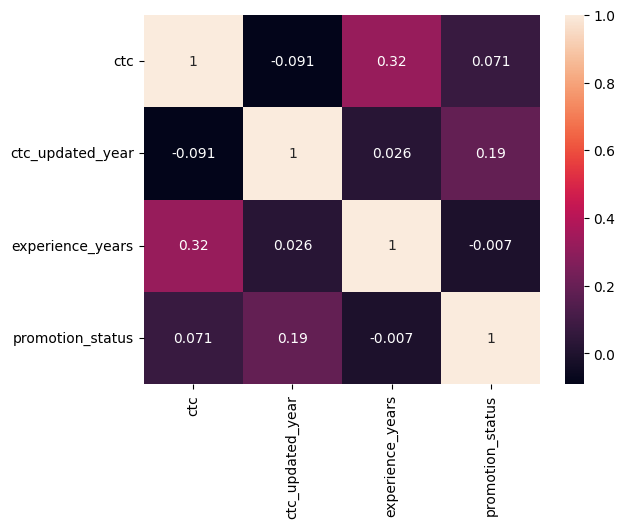

In [95]:
num_col=df_grp.select_dtypes(include='number')
sns.heatmap(num_col.corr(method='spearman'),annot=True)

In [96]:
dict_comp=df_grp.groupby('company_hash')['email_hash'].nunique().to_dict()
df_grp['comp_emp']=df_grp['company_hash'].map(dict_comp)

In [97]:
df_grp['company_hash_clean']=df_grp['company_hash'].mask(df_grp['comp_emp']<=5,'Small companies')
df_grp.drop('comp_emp',axis=1,inplace=True)
df_grp['company_hash_clean'].value_counts()

company_hash_clean
Small companies                          47624
nvnv wgzohrnvzwj otqcxwto                 6128
xzegojo                                   4007
vbvkgz                                    2969
zgn vuurxwvmrt vwwghzn                    2454
                                         ...  
bwvett ogenfvqt xzaxv uqxcvnt rxbxnta        6
vhlvo ztnfgqpo                               6
vhnymqxast qtotvqwy otqcxwto                 6
nojo wvqa ntwy otqcxwto                      6
pttunqhwpxz                                  6
Name: count, Length: 2574, dtype: int64

In [98]:
df_summary=df_grp.groupby(['company_hash_clean','job_category','experience_years'])['ctc'].describe()
df_summary

count  \
company_hash_clean job_category                   experience_years          
1bs                Backend Engineer               0                   2.0   
                                                  1                   3.0   
                                                  2                   2.0   
                                                  3                   5.0   
                                                  4                   6.0   
...                                                                   ...   
zxztrtvuo          Product Development            4                   1.0   
                   Support & Maintenance Engineer 4                   1.0   
                   Unknown                        0                   6.0   
                                                  1                   1.0   
                                                  6                   1.0   

                                                                            mean  \
company_hash_clean job_category                   experience_years                 
1bs                Backend Engineer               0                 9.000000e+05   
                                                  1                 1.133333e+06   
                                                  2                 1.037500e+06   
                                                  3                 1.252000e+06   
                                                  4                 2.333333e+06   
...                                                                          ...   
zxztrtvuo          Product Development            4                 1.200000e+06   
                   Support & Maintenance Engineer 4                 1.200000e+06   
                   Unknown                        0                 6.083333e+05   
                                                  1                 7.500000e+05   
                                                  6                 1.275000e+06   

                                                                              std  \
company_hash_clean job_category                   experience_years                  
1bs                Backend Engineer               0                 141421.356237   
                                                  1                 115470.053838   
                                                  2                 194454.364826   
                                                  3                 376523.571639   
                                                  4                 899236.713367   
...                                                                           ...   
zxztrtvuo          Product Development            4                           NaN   
                   Support & Maintenance Engineer 4                           NaN   
                   Unknown                        0                 231120.459213   
                                                  1                           NaN   
                                                  6                           NaN   

                                                                          min  \
company_hash_clean job_category                   experience_years              
1bs                Backend Engineer               0                  800000.0   
                                                  1                 1000000.0   
                                                  2                  900000.0   
                                                  3                  750000.0   
                                                  4                 1200000.0   
...                                                                       ...   
zxztrtvuo          Product Development            4                 1200000.0   
                   Support & Maintenance Engineer 4                 1200000.0   
                   Unknown                        0      

In [99]:
df_seg1=df_grp.drop(columns=['company_hash']).merge(df_summary,on=['company_hash_clean','job_category','experience_years'],how='left')

In [100]:
pd.set_option('display.float_format', '{:.2f}'.format)
df_seg1

email_hash  \
0       00003288036a44374976948c327f246fdbdf0778546904...   
1       0000aaa0e6b61f7636af1954b43d294484cd151c9b3cf6...   
2       0000d58fbc18012bf6fa2605a7b0357d126ee69bc41032...   
3       000120d0c8aa304fcf12ab4b85e21feb80a342cfea03d4...   
4       00014d71a389170e668ba96ae8e1f9d991591acc899025...   
...                                                   ...   
172274  fffc254e627e4bd1bc0ed7f01f9aebbba7c3cc56ac914e...   
172275  fffcf97db1e9c13898f4eb4cd1c2fe862358480e104535...   
172276  fffe7552892f8ca5fb8647d49ca805b72ea0e9538b6b01...   
172277  ffff49f963e4493d8bbc7cc15365423d84a767259f7200...   
172278  ffffa3eb3575f43b86d986911463dce7bcadcea227e5a4...   

                         job_category        ctc  ctc_updated_year  \
0                    Backend Engineer 3500000.00              2019   
1                    Backend Engineer  250000.00              2020   
2                 Product Development 1300000.00              2021   
3                 Product Development 2000000.00              2021   
4                             Unknown 3400000.00              2018   
...                               ...        ...               ...   
172274  Quality Assurance and Testing 3529999.00              2019   
172275                        Unknown 1600000.00              2018   
172276          IT and Cyber Security  900000.00              2019   
172277            Product Development  700000.00              2020   
172278            Product Development 1500000.00              2021   

        experience_years  promotion_status                 company_hash_clean  \
0                      7                 0                          bxwqgogen   
1                      7                 0                    Small companies   
2                      0                 0                              gunhb   
3                     17                 0              bxwqgotbx wgqugqvnxgz   
4                      9                 0                       fvrbvqn rvmo   
...                  ...               ...                                ...   
172274                15                 0                    Small companies   
172275                 3                 0                    Small companies   
172276                 5                 0  znn avnv srgmvr atrxctqj otqcxwto   
172277                 0                 0                    zwq wgqugqvnxgz   
172278                 3                 0                      sgrabvz ovwyo   

        count       mean        std        min        25%        50%  \
0       44.00 3066454.52 1662234.35   21000.00 2150000.00 3175000.00   
1      509.00 1799624.93 2254160.44    7000.00  900000.00 1400000.00   
2       12.00 1379250.00  528720.09  700000.00 1005000.00 1365500.00   
3        1.00 2000000.00        NaN 2000000.00 2000000.00 2000000.00   
4        6.00 2645333.33 1364921.49  222000.00 2212500.00 3150000.00   
...       ...        ...        ...        ...        ...        ...   
172274  16.00 1925624.88 1160137.56  110000.00 1000000.00 1650000.00   
172275 484.00 1019337.18 1801616.31    7200.00  400000.00  600000.00   
172276   3.00  716666.67  160727.51  600000.00  625000.00  650000.00   
172277   4.00 1700000.00 1568438.71  700000.00  700000.00 1050000.00   
172278  29.00 2653741.38  781394.39 1100000.00 2100000.00 2743500.00   

              75%         max  
0      4205000.00  6000000.00  
1      1900000.00 16000000.00  
2      1682500.00  2200000.00  
3      2000000.00  2000000.00  
4      3375000.00  4000000.00  
...           ...         ...  
172274 2987500.00  3529999.00  
172275 1000000.00 16000000.00  
172276  775000.00   900000.00  
172277 2050000.00  4000000.00  
172278 3200000.00  4000000.00  

[172279 rows x 15 columns]

In [101]:
conditions=[df_seg1['ctc']<df_seg1['50%'],df_seg1['ctc']<=df_seg1['75%'],df_seg1['ctc']>df_seg1['75%']]
choices=[3,2,1]
df_seg1['designation']=np.select(conditions,choices)
df_seg1['designation'].value_counts()

designation
2    72332
3    62396
1    37551
Name: count, dtype: int64

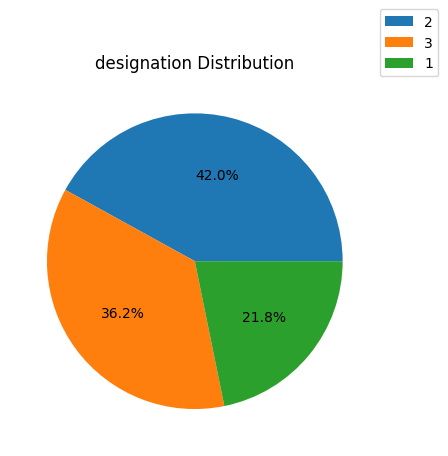

In [102]:
plt.pie(df_seg1['designation'].value_counts(normalize=True)*100,autopct='%1.1f%%')
plt.legend(labels=df_seg1['designation'].value_counts().index,loc=(1,1))
plt.title('designation Distribution')
plt.show()

### *Clustering Analysis Based on Designation Groups*

1. **Cluster 1: High CTC (Designation 1)**  
   - **Size**: **37,551 employees**.  
   - **Characteristics**:
     - Represents employees earning the highest compensation within their companies, job categories, and experience levels.
     - Likely includes senior professionals, specialists, or employees in competitive industries.
   - **Opportunities**: Focus on leadership development, advanced technical skills, and cross-domain expertise to maintain their competitive edge.

2. **Cluster 2: Medium CTC (Designation 2)**  
   - **Size**: **72,332 employees** (largest cluster).  
   - **Characteristics**:
     - Comprises employees earning an average CTC compared to peers with similar roles and experience.
     - Likely includes mid-career professionals or those in stable roles with moderate growth potential.
   - **Opportunities**: Offer skill enhancement programs to help transition to higher-paying roles or leadership positions.

3. **Cluster 3: Low CTC (Designation 3)**  
   - **Size**: **62,396 employees**.  
   - **Characteristics**:
     - Represents employees earning below-average compensation.
     - Likely includes entry-level professionals or individuals in companies/roles with limited growth potential.
   - **Opportunities**: Upskilling and reskilling initiatives, with a focus on high-demand areas to boost career growth and transition into higher-paying clusters.

### Insights:
- **Cluster Imbalance**: The majority of employees are in Cluster 2, reflecting a normal distribution with a bias toward the middle.  
- **Growth Potential**: Cluster 3 (low CTC) offers the highest potential for growth through training and mentorship.  
- **High Performers**: Cluster 1, though smaller, represents the most valuable segment for advanced and niche program offerings.  
- **Strategic Focus**: Businesses and learning platforms can tailor programs to help Cluster 3 move into Cluster 2 and Cluster 2 transition into Cluster 1.

In [103]:
df_summ=df_grp.groupby(['company_hash_clean','job_category'])['ctc'].describe()
df_summ

count       mean  \
company_hash_clean job_category                                       
1bs                Backend Engineer                20.00 1556750.00   
                   Data Scientist                   2.00  950000.00   
                   Frontend Engineer                3.00  966666.67   
                   Internship                       1.00 1200000.00   
                   Management                       2.00 2500000.00   
...                                                  ...        ...   
zxztrtvuo          Mobile Engineer                  2.00 1162500.00   
                   Non Technical Roles              2.00  450000.00   
                   Product Development              6.00  900500.00   
                   Support & Maintenance Engineer   1.00 1200000.00   
                   Unknown                          8.00  709375.00   

                                                         std        min  \
company_hash_clean job_category                                           
1bs                Backend Engineer                757961.73  750000.00   
                   Data Scientist                  212132.03  800000.00   
                   Frontend Engineer               332916.41  750000.00   
                   Internship                            NaN 1200000.00   
                   Management                     1272792.21 1600000.00   
...                                                      ...        ...   
zxztrtvuo          Mobile Engineer                  53033.01 1125000.00   
                   Non Technical Roles                  0.00  450000.00   
                   Product Development             388375.46  500000.00   
                   Support & Maintenance Engineer        NaN 1200000.00   
                   Unknown                         304706.39  400000.00   

                                                         25%        50%  \
company_hash_clean job_category                                           
1bs                Backend Engineer               1000000.00 1250000.00   
                   Data Scientist                  875000.00  950000.00   
                   Frontend Engineer               775000.00  800000.00   
                   Internship                     1200000.00 1200000.00   
                   Management                     2050000.00 2500000.00   
...                                                      ...        ...   
zxztrtvuo          Mobile Engineer                1143750.00 1162500.00   
                   Non Technical Roles             450000.00  450000.00   
                   Product Development             607500.00  814000.00   
                   Support & Maintenance Engineer 1200000.00 1200000.00   
                   Unknown                         450000.00  650000.00   

                                                         75%        max  
company_hash_clean job_category                                          
1bs                Backend Engineer               1850000.00 3750000.00  
                   Data Scientist                 1025000.00 1100000.00  
                   Frontend Engineer              1075000.00 1350000.00  
                   Internship                     1200000.00 1200000.00  
                   Management                     2950000.00 3400000.00  
...                                                      ...        ...  
zxztrtvuo          Mobile Engineer                1181250.00 1200000.00  
                   Non Technical Roles             450000.00  450000.00  
                   Product Development            1130750.00 1500000.00  
                   Support & Maintenance Engineer 1200000.00 1200000.00  
                   Unknown                         900000.00 1275000.00  

[18014 rows x 8 columns]

In [104]:
df_seg2=df_grp.drop(columns=['company_hash']).merge(df_summ,on=['company_hash_clean','job_category'],how='left')
df_seg2

email_hash  \
0       00003288036a44374976948c327f246fdbdf0778546904...   
1       0000aaa0e6b61f7636af1954b43d294484cd151c9b3cf6...   
2       0000d58fbc18012bf6fa2605a7b0357d126ee69bc41032...   
3       000120d0c8aa304fcf12ab4b85e21feb80a342cfea03d4...   
4       00014d71a389170e668ba96ae8e1f9d991591acc899025...   
...                                                   ...   
172274  fffc254e627e4bd1bc0ed7f01f9aebbba7c3cc56ac914e...   
172275  fffcf97db1e9c13898f4eb4cd1c2fe862358480e104535...   
172276  fffe7552892f8ca5fb8647d49ca805b72ea0e9538b6b01...   
172277  ffff49f963e4493d8bbc7cc15365423d84a767259f7200...   
172278  ffffa3eb3575f43b86d986911463dce7bcadcea227e5a4...   

                         job_category        ctc  ctc_updated_year  \
0                    Backend Engineer 3500000.00              2019   
1                    Backend Engineer  250000.00              2020   
2                 Product Development 1300000.00              2021   
3                 Product Development 2000000.00              2021   
4                             Unknown 3400000.00              2018   
...                               ...        ...               ...   
172274  Quality Assurance and Testing 3529999.00              2019   
172275                        Unknown 1600000.00              2018   
172276          IT and Cyber Security  900000.00              2019   
172277            Product Development  700000.00              2020   
172278            Product Development 1500000.00              2021   

        experience_years  promotion_status                 company_hash_clean  \
0                      7                 0                          bxwqgogen   
1                      7                 0                    Small companies   
2                      0                 0                              gunhb   
3                     17                 0              bxwqgotbx wgqugqvnxgz   
4                      9                 0                       fvrbvqn rvmo   
...                  ...               ...                                ...   
172274                15                 0                    Small companies   
172275                 3                 0                    Small companies   
172276                 5                 0  znn avnv srgmvr atrxctqj otqcxwto   
172277                 0                 0                    zwq wgqugqvnxgz   
172278                 3                 0                      sgrabvz ovwyo   

         count       mean        std       min        25%        50%  \
0       731.00 2957302.32 2072938.91   5000.00 1900000.00 2600000.00   
1      9150.00 1380663.10 1955023.29    200.00  480000.00  930000.00   
2        56.00 1296714.29  661607.98 160000.00  800000.00 1200000.00   
3         3.00 1398333.33 1094489.99 135000.00 1067500.00 2000000.00   
4        74.00 2657674.32 1742102.38  18900.00 1625000.00 2127500.00   
...        ...        ...        ...       ...        ...        ...   
172274 1977.00 1117319.82 2034460.34   2000.00  450000.00  620000.00   
172275 4346.00 1361019.51 2249356.69     15.00  400000.00  740000.00   
172276    7.00  814285.71  173575.84 600000.00  680000.00  840000.00   
172277   23.00 1081956.52  822411.56   5000.00  700000.00  840000.00   
172278  129.00 2895151.16 2530447.18  21000.00 2000000.00 2500000.00   

              75%         max  
0      3625000.00 16000000.00  
1      1600000.00 16000000.00  
2      1542500.00  3650000.00  
3      2030000.00  2060000.00  
4      3400000.00 10000000.00  
...           ...         ...  
172274  919999.00 16000000.00  
172275 1500000.00 16000000.00  
172276  900000.00  1100000.00  
172277 1250000.00  4000000.00  
172278 3190000.00 16000000.00  

[172279 rows x 15 columns]

In [105]:
conditions=[df_seg2['ctc']<df_seg2['50%'],df_seg2['ctc']<=df_seg2['75%'],df_seg2['ctc']>df_seg2['75%']]
choices=[3,2,1]
df_seg2['Class']=np.select(conditions,choices)
df_seg2['Class'].value_counts()

Class
3    77969
2    51977
1    42333
Name: count, dtype: int64

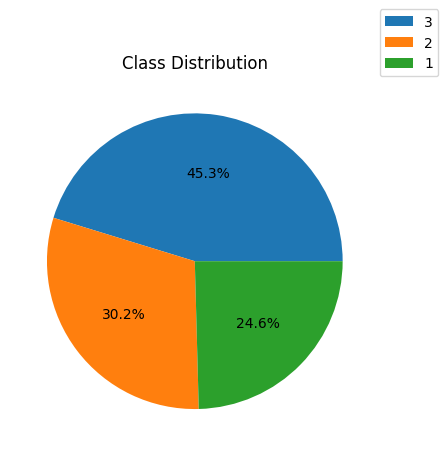

In [106]:
plt.pie(df_seg2['Class'].value_counts(normalize=True)*100,autopct='%1.1f%%')
plt.legend(labels=df_seg2['Class'].value_counts().index,loc=(1,1))
plt.title('Class Distribution')
plt.show()

### *Clustering Analysis Based on Class Groups*

1. **Cluster 1: High CTC (Class 1)**  
   - **Size**: **42,333 employees** (smallest cluster).  
   - **Characteristics**:  
     - Represents employees earning the highest salaries within their companies and job categories.  
     - Likely includes top-performing individuals, senior executives, or those in highly competitive industries or roles.  
   - **Opportunities**: Provide leadership development, mentorship programs, and opportunities for further specialization to retain and maximize their impact.

2. **Cluster 2: Medium CTC (Class 2)**  
   - **Size**: **51,977 employees** (mid-sized cluster).  
   - **Characteristics**:  
     - Represents employees with average compensation relative to their peers in similar roles and companies.  
     - Likely includes mid-level professionals with stable positions and moderate career progression potential.  
   - **Opportunities**: Introduce targeted training programs to help this cluster transition into Cluster 1. Provide clear pathways for promotions or salary advancements.

3. **Cluster 3: Low CTC (Class 3)**  
   - **Size**: **77,969 employees** (largest cluster).  
   - **Characteristics**:  
     - Represents employees earning below-average salaries in their companies and job categories.  
     - Likely includes entry-level employees, those in less competitive industries, or individuals in roles with limited immediate upward mobility.  
   - **Opportunities**:
     - Offer upskilling and cross-skilling programs focused on high-demand areas.
     - Enable career transitions to more lucrative roles or industries.
     - Encourage performance-based incentives or growth opportunities within their roles.

### Insights:
- **Cluster Composition**: A skewed distribution, with the majority in Class 3, suggests room for improvement in salary equity or career progression across organizations.  
- **Growth Potential**: Class 3 offers the highest potential for improvement through focused learning, mentorship, and internal mobility programs.  
- **Strategic Focus**: Employers can use insights from this clustering to prioritize career development for Classes 2 and 3, fostering talent pipelines and addressing retention challenges.  
- **High Performers**: Class 1, while the smallest group, holds strategic importance due to its high-value individuals who may benefit from retention incentives.  

In [107]:
df_summ=df_grp.groupby(['company_hash_clean'])['ctc'].describe()
df_summ

count       mean        std       min        25%  \
company_hash_clean                                                           
1bs                       54.00 1528055.56  770174.21 600000.00 1000000.00   
1bs ntwyzgrgsxto ucn rna  27.00 1318518.52  845503.74 100000.00  800000.00   
20152019                   8.00 2652000.00 5424498.19 336000.00  425000.00   
2018                       6.00  933500.00  737521.19  11000.00  435000.00   
2019                       6.00  721666.67  234982.27 300000.00  700000.00   
...                         ...        ...        ...       ...        ...   
zxxn rna                   6.00  968333.33  534954.83 280000.00  577500.00   
zxyxrtzn                   7.00  672857.14  344563.22 330000.00  400000.00   
zxyxrtzn ntwyzgrgsxto     12.00  817000.00  394381.91  50000.00  590000.00   
zxzlvwvqn                 33.00 1796666.67 1282620.41 180000.00  800000.00   
zxztrtvuo                 59.00 1277508.46 1568862.06 400000.00  572500.00   

                                50%        75%         max  
company_hash_clean                                          
1bs                      1325000.00 1607500.00  3750000.00  
1bs ntwyzgrgsxto ucn rna 1000000.00 1552500.00  3500000.00  
20152019                  540000.00 1200000.00 16000000.00  
2018                      895000.00 1362500.00  2000000.00  
2019                      740000.00  832500.00  1000000.00  
...                             ...        ...         ...  
zxxn rna                 1005000.00 1290000.00  1700000.00  
zxyxrtzn                  630000.00  825000.00  1300000.00  
zxyxrtzn ntwyzgrgsxto     800000.00  992500.00  1500000.00  
zxzlvwvqn                1400000.00 2260000.00  5000000.00  
zxztrtvuo                 900000.00 1322500.00 11950000.00  

[2574 rows x 8 columns]

In [108]:
df_seg3=df_grp.drop(columns=['company_hash']).merge(df_summ,on=['company_hash_clean'],how='left')
df_seg3

email_hash  \
0       00003288036a44374976948c327f246fdbdf0778546904...   
1       0000aaa0e6b61f7636af1954b43d294484cd151c9b3cf6...   
2       0000d58fbc18012bf6fa2605a7b0357d126ee69bc41032...   
3       000120d0c8aa304fcf12ab4b85e21feb80a342cfea03d4...   
4       00014d71a389170e668ba96ae8e1f9d991591acc899025...   
...                                                   ...   
172274  fffc254e627e4bd1bc0ed7f01f9aebbba7c3cc56ac914e...   
172275  fffcf97db1e9c13898f4eb4cd1c2fe862358480e104535...   
172276  fffe7552892f8ca5fb8647d49ca805b72ea0e9538b6b01...   
172277  ffff49f963e4493d8bbc7cc15365423d84a767259f7200...   
172278  ffffa3eb3575f43b86d986911463dce7bcadcea227e5a4...   

                         job_category        ctc  ctc_updated_year  \
0                    Backend Engineer 3500000.00              2019   
1                    Backend Engineer  250000.00              2020   
2                 Product Development 1300000.00              2021   
3                 Product Development 2000000.00              2021   
4                             Unknown 3400000.00              2018   
...                               ...        ...               ...   
172274  Quality Assurance and Testing 3529999.00              2019   
172275                        Unknown 1600000.00              2018   
172276          IT and Cyber Security  900000.00              2019   
172277            Product Development  700000.00              2020   
172278            Product Development 1500000.00              2021   

        experience_years  promotion_status                 company_hash_clean  \
0                      7                 0                          bxwqgogen   
1                      7                 0                    Small companies   
2                      0                 0                              gunhb   
3                     17                 0              bxwqgotbx wgqugqvnxgz   
4                      9                 0                       fvrbvqn rvmo   
...                  ...               ...                                ...   
172274                15                 0                    Small companies   
172275                 3                 0                    Small companies   
172276                 5                 0  znn avnv srgmvr atrxctqj otqcxwto   
172277                 0                 0                    zwq wgqugqvnxgz   
172278                 3                 0                      sgrabvz ovwyo   

          count       mean        std       min        25%        50%  \
0       1868.00 2913978.53 2174331.04   5000.00 1800000.00 2500000.00   
1      47624.00 1353510.32 2176988.31     15.00  450000.00  800000.00   
2        191.00 1419903.13  884622.76  10000.00  820000.00 1200000.00   
3         12.00 1756666.67 1086090.43 135000.00  975000.00 2000000.00   
4        663.00 2794114.63 1810134.42  13000.00 1800000.00 2500000.00   
...         ...        ...        ...       ...        ...        ...   
172274 47624.00 1353510.32 2176988.31     15.00  450000.00  800000.00   
172275 47624.00 1353510.32 2176988.31     15.00  450000.00  800000.00   
172276    19.00 1226842.11 1296551.21 440000.00  625000.00  830000.00   
172277   145.00 1199389.65  931419.50   5000.00  700000.00  850000.00   
172278   711.00 2908388.53 1908470.04   1000.00 2000000.00 2700000.00   

              75%         max  
0      3512500.00 16000000.00  
1      1400000.00 16000000.00  
2      1675000.00  6000000.00  
3      2170000.00  3600000.00  
4      3400000.00 16000000.00  
...           ...         ...  
172274 1400000.00 16000000.00  
172275 1400000.00 16000000.00  
172276 1000000.00  5500000.00  
172277 1400000.00  5500000.00  
172278 3500000.00 16000000.00  

[172279 rows x 15 columns]

In [109]:
conditions=[df_seg3['ctc']<df_seg3['50%'],df_seg3['ctc']<=df_seg3['75%'],df_seg3['ctc']>df_seg3['75%']]
choices=[3,2,1]
df_seg3['Tier']=np.select(conditions,choices)
df_seg3['Tier'].value_counts()

Tier
3    82988
2    47000
1    42291
Name: count, dtype: int64

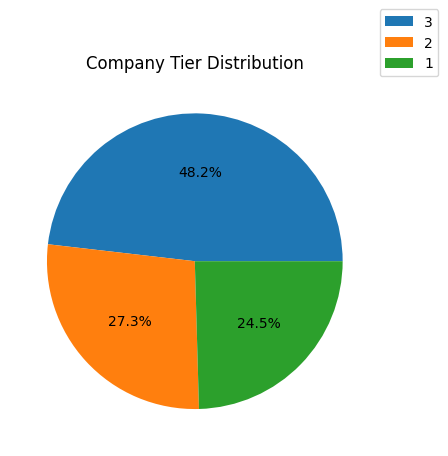

In [110]:
plt.pie(df_seg3['Tier'].value_counts(normalize=True)*100,autopct='%1.1f%%')
plt.legend(labels=df_seg3['Tier'].value_counts().index,loc=(1,1))
plt.title('Company Tier Distribution')
plt.show()

### *Clustering Analysis Based on Tier Groups*

1. **Tier 1: High CTC**  
   - **Size**: **42,291 employees** (smallest cluster).  
   - **Characteristics**:  
     - Represents employees earning the highest salaries within their respective companies.  
     - Likely includes senior leaders, top-performing professionals, or individuals in strategic or highly valued roles.  
     - Concentrated in leading organizations or departments where CTC is a competitive factor.  
   - **Opportunities**:  
     - Retention strategies such as bonuses, stock options, and leadership opportunities.  
     - Ensure regular engagement and career development discussions to maintain satisfaction.  

2. **Tier 2: Medium CTC**  
   - **Size**: **47,000 employees** (mid-sized cluster).  
   - **Characteristics**:  
     - Represents employees with average compensation within their organizations.  
     - Likely includes mid-level staff who form the backbone of company operations.  
     - Positioned in roles with stable growth potential but not currently in top leadership or high-demand positions.  
   - **Opportunities**:  
     - Provide professional development to help transition to Tier 1.  
     - Implement performance-based incentives or tailored training programs.  

3. **Tier 3: Low CTC**  
   - **Size**: **82,988 employees** (largest cluster).  
   - **Characteristics**:  
     - Represents employees earning the lowest salaries within their organizations.  
     - Likely includes entry-level staff, those in non-strategic roles, or employees in organizations with budget constraints.  
     - May include temporary, support, or administrative roles.  
   - **Opportunities**:  
     - Focus on upskilling and reskilling programs to enable movement to higher tiers.  
     - Analyze job roles to identify gaps and potential salary adjustments to improve retention.  
     - Provide transparent pathways for growth within the organization.  

### Insights:
- **Tier Distribution**: The majority of employees fall into Tier 3, which indicates significant potential for improvement in employee growth and salary equity.  
- **Strategic Focus**:  
  - Tier 1 employees should be nurtured with retention and growth strategies to maintain organizational leadership and innovation.  
  - Tier 2 employees represent the talent pipeline for Tier 1 and should be prioritized for development opportunities.  
  - Tier 3 employees may require targeted interventions to address salary disparity and enhance their career progression prospects.  
- **Business Implication**: Companies with a large proportion of Tier 3 employees need to evaluate their salary structures and career development programs to ensure long-term talent retention and competitiveness in the market.

In [111]:
df_seg1['designation'].value_counts(normalize=True)*100

designation
2   41.99
3   36.22
1   21.80
Name: proportion, dtype: float64

In [112]:
df_seg2['Class'].value_counts(normalize=True)*100

Class
3   45.26
2   30.17
1   24.57
Name: proportion, dtype: float64

In [113]:
df_seg3['Tier'].value_counts(normalize=True)*100

Tier
3   48.17
2   27.28
1   24.55
Name: proportion, dtype: float64

In [114]:
df_seg1.head()

email_hash         job_category  \
0  00003288036a44374976948c327f246fdbdf0778546904...     Backend Engineer   
1  0000aaa0e6b61f7636af1954b43d294484cd151c9b3cf6...     Backend Engineer   
2  0000d58fbc18012bf6fa2605a7b0357d126ee69bc41032...  Product Development   
3  000120d0c8aa304fcf12ab4b85e21feb80a342cfea03d4...  Product Development   
4  00014d71a389170e668ba96ae8e1f9d991591acc899025...              Unknown   

         ctc  ctc_updated_year  experience_years  promotion_status  \
0 3500000.00              2019                 7                 0   
1  250000.00              2020                 7                 0   
2 1300000.00              2021                 0                 0   
3 2000000.00              2021                17                 0   
4 3400000.00              2018                 9                 0   

      company_hash_clean  count       mean        std        min        25%  \
0              bxwqgogen  44.00 3066454.52 1662234.35   21000.00 2150000.00   
1        Small companies 509.00 1799624.93 2254160.44    7000.00  900000.00   
2                  gunhb  12.00 1379250.00  528720.09  700000.00 1005000.00   
3  bxwqgotbx wgqugqvnxgz   1.00 2000000.00        NaN 2000000.00 2000000.00   
4           fvrbvqn rvmo   6.00 2645333.33 1364921.49  222000.00 2212500.00   

         50%        75%         max  designation  
0 3175000.00 4205000.00  6000000.00            2  
1 1400000.00 1900000.00 16000000.00            3  
2 1365500.00 1682500.00  2200000.00            3  
3 2000000.00 2000000.00  2000000.00            2  
4 3150000.00 3375000.00  4000000.00            1

In [115]:
df_seg2.head()

email_hash         job_category  \
0  00003288036a44374976948c327f246fdbdf0778546904...     Backend Engineer   
1  0000aaa0e6b61f7636af1954b43d294484cd151c9b3cf6...     Backend Engineer   
2  0000d58fbc18012bf6fa2605a7b0357d126ee69bc41032...  Product Development   
3  000120d0c8aa304fcf12ab4b85e21feb80a342cfea03d4...  Product Development   
4  00014d71a389170e668ba96ae8e1f9d991591acc899025...              Unknown   

         ctc  ctc_updated_year  experience_years  promotion_status  \
0 3500000.00              2019                 7                 0   
1  250000.00              2020                 7                 0   
2 1300000.00              2021                 0                 0   
3 2000000.00              2021                17                 0   
4 3400000.00              2018                 9                 0   

      company_hash_clean   count       mean        std       min        25%  \
0              bxwqgogen  731.00 2957302.32 2072938.91   5000.00 1900000.00   
1        Small companies 9150.00 1380663.10 1955023.29    200.00  480000.00   
2                  gunhb   56.00 1296714.29  661607.98 160000.00  800000.00   
3  bxwqgotbx wgqugqvnxgz    3.00 1398333.33 1094489.99 135000.00 1067500.00   
4           fvrbvqn rvmo   74.00 2657674.32 1742102.38  18900.00 1625000.00   

         50%        75%         max  Class  
0 2600000.00 3625000.00 16000000.00      2  
1  930000.00 1600000.00 16000000.00      3  
2 1200000.00 1542500.00  3650000.00      2  
3 2000000.00 2030000.00  2060000.00      2  
4 2127500.00 3400000.00 10000000.00      2

In [116]:
df_seg3.head()

email_hash         job_category  \
0  00003288036a44374976948c327f246fdbdf0778546904...     Backend Engineer   
1  0000aaa0e6b61f7636af1954b43d294484cd151c9b3cf6...     Backend Engineer   
2  0000d58fbc18012bf6fa2605a7b0357d126ee69bc41032...  Product Development   
3  000120d0c8aa304fcf12ab4b85e21feb80a342cfea03d4...  Product Development   
4  00014d71a389170e668ba96ae8e1f9d991591acc899025...              Unknown   

         ctc  ctc_updated_year  experience_years  promotion_status  \
0 3500000.00              2019                 7                 0   
1  250000.00              2020                 7                 0   
2 1300000.00              2021                 0                 0   
3 2000000.00              2021                17                 0   
4 3400000.00              2018                 9                 0   

      company_hash_clean    count       mean        std       min        25%  \
0              bxwqgogen  1868.00 2913978.53 2174331.04   5000.00 1800000.00   
1        Small companies 47624.00 1353510.32 2176988.31     15.00  450000.00   
2                  gunhb   191.00 1419903.13  884622.76  10000.00  820000.00   
3  bxwqgotbx wgqugqvnxgz    12.00 1756666.67 1086090.43 135000.00  975000.00   
4           fvrbvqn rvmo   663.00 2794114.63 1810134.42  13000.00 1800000.00   

         50%        75%         max  Tier  
0 2500000.00 3512500.00 16000000.00     2  
1  800000.00 1400000.00 16000000.00     3  
2 1200000.00 1675000.00  6000000.00     2  
3 2000000.00 2170000.00  3600000.00     2  
4 2500000.00 3400000.00 16000000.00     2

In [117]:
df_seg1.drop(columns=['count','mean', 'std', 'min', '25%', '50%', '75%', 'max'], inplace=True)
df_seg1

email_hash  \
0       00003288036a44374976948c327f246fdbdf0778546904...   
1       0000aaa0e6b61f7636af1954b43d294484cd151c9b3cf6...   
2       0000d58fbc18012bf6fa2605a7b0357d126ee69bc41032...   
3       000120d0c8aa304fcf12ab4b85e21feb80a342cfea03d4...   
4       00014d71a389170e668ba96ae8e1f9d991591acc899025...   
...                                                   ...   
172274  fffc254e627e4bd1bc0ed7f01f9aebbba7c3cc56ac914e...   
172275  fffcf97db1e9c13898f4eb4cd1c2fe862358480e104535...   
172276  fffe7552892f8ca5fb8647d49ca805b72ea0e9538b6b01...   
172277  ffff49f963e4493d8bbc7cc15365423d84a767259f7200...   
172278  ffffa3eb3575f43b86d986911463dce7bcadcea227e5a4...   

                         job_category        ctc  ctc_updated_year  \
0                    Backend Engineer 3500000.00              2019   
1                    Backend Engineer  250000.00              2020   
2                 Product Development 1300000.00              2021   
3                 Product Development 2000000.00              2021   
4                             Unknown 3400000.00              2018   
...                               ...        ...               ...   
172274  Quality Assurance and Testing 3529999.00              2019   
172275                        Unknown 1600000.00              2018   
172276          IT and Cyber Security  900000.00              2019   
172277            Product Development  700000.00              2020   
172278            Product Development 1500000.00              2021   

        experience_years  promotion_status                 company_hash_clean  \
0                      7                 0                          bxwqgogen   
1                      7                 0                    Small companies   
2                      0                 0                              gunhb   
3                     17                 0              bxwqgotbx wgqugqvnxgz   
4                      9                 0                       fvrbvqn rvmo   
...                  ...               ...                                ...   
172274                15                 0                    Small companies   
172275                 3                 0                    Small companies   
172276                 5                 0  znn avnv srgmvr atrxctqj otqcxwto   
172277                 0                 0                    zwq wgqugqvnxgz   
172278                 3                 0                      sgrabvz ovwyo   

        designation  
0                 2  
1                 3  
2                 3  
3                 2  
4                 1  
...             ...  
172274            1  
172275            1  
172276            1  
172277            3  
172278            3  

[172279 rows x 8 columns]

In [118]:
df_seg2.drop(columns=['count','mean', 'std', 'min', '25%', '50%', '75%', 'max'], inplace=True)
df_seg2

email_hash  \
0       00003288036a44374976948c327f246fdbdf0778546904...   
1       0000aaa0e6b61f7636af1954b43d294484cd151c9b3cf6...   
2       0000d58fbc18012bf6fa2605a7b0357d126ee69bc41032...   
3       000120d0c8aa304fcf12ab4b85e21feb80a342cfea03d4...   
4       00014d71a389170e668ba96ae8e1f9d991591acc899025...   
...                                                   ...   
172274  fffc254e627e4bd1bc0ed7f01f9aebbba7c3cc56ac914e...   
172275  fffcf97db1e9c13898f4eb4cd1c2fe862358480e104535...   
172276  fffe7552892f8ca5fb8647d49ca805b72ea0e9538b6b01...   
172277  ffff49f963e4493d8bbc7cc15365423d84a767259f7200...   
172278  ffffa3eb3575f43b86d986911463dce7bcadcea227e5a4...   

                         job_category        ctc  ctc_updated_year  \
0                    Backend Engineer 3500000.00              2019   
1                    Backend Engineer  250000.00              2020   
2                 Product Development 1300000.00              2021   
3                 Product Development 2000000.00              2021   
4                             Unknown 3400000.00              2018   
...                               ...        ...               ...   
172274  Quality Assurance and Testing 3529999.00              2019   
172275                        Unknown 1600000.00              2018   
172276          IT and Cyber Security  900000.00              2019   
172277            Product Development  700000.00              2020   
172278            Product Development 1500000.00              2021   

        experience_years  promotion_status                 company_hash_clean  \
0                      7                 0                          bxwqgogen   
1                      7                 0                    Small companies   
2                      0                 0                              gunhb   
3                     17                 0              bxwqgotbx wgqugqvnxgz   
4                      9                 0                       fvrbvqn rvmo   
...                  ...               ...                                ...   
172274                15                 0                    Small companies   
172275                 3                 0                    Small companies   
172276                 5                 0  znn avnv srgmvr atrxctqj otqcxwto   
172277                 0                 0                    zwq wgqugqvnxgz   
172278                 3                 0                      sgrabvz ovwyo   

        Class  
0           2  
1           3  
2           2  
3           2  
4           2  
...       ...  
172274      1  
172275      1  
172276      2  
172277      3  
172278      3  

[172279 rows x 8 columns]

In [119]:
df_seg3.drop(columns=['count','mean', 'std', 'min', '25%', '50%', '75%', 'max'], inplace=True)
df_seg3

email_hash  \
0       00003288036a44374976948c327f246fdbdf0778546904...   
1       0000aaa0e6b61f7636af1954b43d294484cd151c9b3cf6...   
2       0000d58fbc18012bf6fa2605a7b0357d126ee69bc41032...   
3       000120d0c8aa304fcf12ab4b85e21feb80a342cfea03d4...   
4       00014d71a389170e668ba96ae8e1f9d991591acc899025...   
...                                                   ...   
172274  fffc254e627e4bd1bc0ed7f01f9aebbba7c3cc56ac914e...   
172275  fffcf97db1e9c13898f4eb4cd1c2fe862358480e104535...   
172276  fffe7552892f8ca5fb8647d49ca805b72ea0e9538b6b01...   
172277  ffff49f963e4493d8bbc7cc15365423d84a767259f7200...   
172278  ffffa3eb3575f43b86d986911463dce7bcadcea227e5a4...   

                         job_category        ctc  ctc_updated_year  \
0                    Backend Engineer 3500000.00              2019   
1                    Backend Engineer  250000.00              2020   
2                 Product Development 1300000.00              2021   
3                 Product Development 2000000.00              2021   
4                             Unknown 3400000.00              2018   
...                               ...        ...               ...   
172274  Quality Assurance and Testing 3529999.00              2019   
172275                        Unknown 1600000.00              2018   
172276          IT and Cyber Security  900000.00              2019   
172277            Product Development  700000.00              2020   
172278            Product Development 1500000.00              2021   

        experience_years  promotion_status                 company_hash_clean  \
0                      7                 0                          bxwqgogen   
1                      7                 0                    Small companies   
2                      0                 0                              gunhb   
3                     17                 0              bxwqgotbx wgqugqvnxgz   
4                      9                 0                       fvrbvqn rvmo   
...                  ...               ...                                ...   
172274                15                 0                    Small companies   
172275                 3                 0                    Small companies   
172276                 5                 0  znn avnv srgmvr atrxctqj otqcxwto   
172277                 0                 0                    zwq wgqugqvnxgz   
172278                 3                 0                      sgrabvz ovwyo   

        Tier  
0          2  
1          3  
2          2  
3          2  
4          2  
...      ...  
172274     1  
172275     1  
172276     2  
172277     3  
172278     3  

[172279 rows x 8 columns]

In [120]:
dff = df_seg1.merge(df_seg2, on=['email_hash', 'job_category', 'ctc', 'ctc_updated_year',
       'experience_years', 'promotion_status', 'company_hash_clean'], how="left")
dff.sample(5)

email_hash  \
64974   60725859e611a815907935fc714072b1742ca41a082ce0...   
111384  a56d9967d25da698609253f9e3543ea023247f6c0793f3...   
32579   303d615fd7d2a2e0e7a1734bbe953fc3d3b6154c26fbbe...   
109075  a1eedb125ff73fff0b6d582fc519f9d3debd2a7d5eb7c8...   
127412  bd2ce7a021da87f23a426fc11d25df7fbaba240215dd51...   

                         job_category        ctc  ctc_updated_year  \
64974                Backend Engineer 1300000.00              2019   
111384          IT and Cyber Security 1350000.00              2019   
32579                Backend Engineer 1550000.00              2019   
109075               Backend Engineer 1350000.00              2019   
127412  Quality Assurance and Testing  750000.00              2019   

        experience_years  promotion_status company_hash_clean  designation  \
64974                  3                 0              uvjnb            3   
111384                11                 0    Small companies            2   
32579                  6                 0       tuvb ojontbo            1   
109075                 5                 0        xzegqbvnxwv            3   
127412                 6                 0    Small companies            2   

        Class  
64974       3  
111384      2  
32579       1  
109075      3  
127412      2

In [121]:
df_final = dff.merge(df_seg3, on=['email_hash', 'job_category', 'ctc', 'ctc_updated_year',
       'experience_years', 'promotion_status', 'company_hash_clean'], how="left")
df_final.sample(5)

email_hash  \
91677   88010e9685917c17253bab1f8329fb96cd244f622fd113...   
135649  c8f4186b820e71b08a8d12bbbe6ca1a55cefc0b569045f...   
6147    08d23c16b7f053a8242431620d6d5bb949961ba7daabbb...   
1650    0276f7ff0859bbd851e46fa96af472e25e6b5a36abed06...   
108932  a1621a5098bd7d1ed2b419edf0bbf88ab9dae339493054...   

               job_category       ctc  ctc_updated_year  experience_years  \
91677   Non Technical Roles 300000.00              2020                 2   
135649             Software 400000.00              2019                 2   
6147         Data Scientist 600000.00              2019                 1   
1650    Non Technical Roles 480000.00              2020                 0   
108932              Unknown 500000.00              2021                 2   

        promotion_status company_hash_clean  designation  Class  Tier  
91677                  0    Small companies            3      3     3  
135649                 0    Small companies            3      3     3  
6147                   0    Small companies            3      3     3  
1650                   0       wgrrtstahzxv            2      3     3  
108932                 0            xzegojo            2      2     2

## SOME INTERESTNG FACTS AFTER THE CLUSTERING

Based on the manual clustering done so far,answering few questions like:

1. Top 10 employees (earning more than most of the employees in the company) - Tier 1
2. Top 10 employees of data science in each company earning more than their peers - Class 1
3. Bottom 10 employees of data science in each company earning less than their peers - Class 3
4. Bottom 10 employees (earning less than most of the employees in the company)- Tier 3
5. Top 10 employees in each company - X department - having 5/6/7 years of experience earning more than their peers - Tier X
6. Top 10 companies (based on their CTC)
7. Top 2 positions in every company (based on their CTC)

### Top 10 employees

**Top 10 employees (earning more than most of the employees in the company) - Tier 1**

---




In [122]:
tier_1=df_final[df_final['Tier']==1]
tier_1.sort_values(by='ctc',ascending=False).head(10)

email_hash  \
33      000e86d3106343631616d7f43467464134f14f7d11dad9...   
102485  97d25613e7bc3f47c87492d311f77232c105e4bc9ce642...   
102461  97c9efebc7bf4a4d012d8c2607a8c0e0a65a427d256ffb...   
42620   3efd17bbb86bdbcfbf43eb81cdb645fe7c936e0e9c951d...   
22732   217069c0892c083d33d92127b59df511af2f0208c690ce...   
102353  979d02840c45c1d5790306130a0977aab05f2bd2679687...   
102323  979235a69267e855c0361f670e5941138307caf43fa986...   
102252  9778770889f1ba6ec82e896e69a96adea6120fbc4f4b22...   
63708   5e67d0110e4ee01a7cbed86bb7c716a32c5ee23cf7c551...   
63709   5e681328ad9238368ee07688c38094180b6f48f3de4d05...   

                          job_category         ctc  ctc_updated_year  \
33                      Data Scientist 16000000.00              2020   
102485  Support & Maintenance Engineer 16000000.00              2020   
102461                Backend Engineer 16000000.00              2019   
42620              Non Technical Roles 16000000.00              2017   
22732                 Backend Engineer 16000000.00              2020   
102353                         Analyst 16000000.00              2020   
102323  Support & Maintenance Engineer 16000000.00              2020   
102252                         Unknown 16000000.00              2020   
63708              Non Technical Roles 16000000.00              2020   
63709              Non Technical Roles 16000000.00              2020   

        experience_years  promotion_status         company_hash_clean  \
33                     8                 0                      tlvav   
102485                 2                 0  nvnv wgzohrnvzwj otqcxwto   
102461                 8                 0            Small companies   
42620                  0                 0            Small companies   
22732                  9                 0                  wgszxkvzn   
102353                 7                 0            ntrtutqegqbvzwt   
102323                 2                 0  nvnv wgzohrnvzwj otqcxwto   
102252                 2                 0            Small companies   
63708                  2                 0                  yaew mvzp   
63709                  4                 0         lubgqsvz wyvot  wg   

        designation  Class  Tier  
33                2      2     1  
102485            1      1     1  
102461            1      1     1  
42620             1      1     1  
22732             1      1     1  
102353            2      1     1  
102323            1      1     1  
102252            1      1     1  
63708             1      1     1  
63709             1      1     1

Top employees are earning equal to 1.6 Crores or more as we had clipped some of the high pay learners' ctc.

**Top 10 employees of data science in each company earning more than their peers - Class 1**

---



In [123]:
top_ds=df_final[(df_final['job_category']=='Data Scientist') & df_final['Class']==1].sort_values(by='ctc',ascending=False)
top_ds.groupby('company_hash_clean').apply(lambda x: x.nlargest(10, 'ctc')).reset_index(drop=True)

email_hash    job_category  \
0     6b01808bba4c2d50258b068274232251620630cb252a9c...  Data Scientist   
1     eb213c0552effd7fb139395c7838edb8d59773a1cb57a0...  Data Scientist   
2     9d2537610d57179230806bb77258f63c3134b8fde9aa3a...  Data Scientist   
3     c35054c043f6a02da3e6f142fbcb095f8145eb521137ff...  Data Scientist   
4     5f4b52a1c2539fe2e4b29a8470bc57dbace331b819a0af...  Data Scientist   
...                                                 ...             ...   
1713  9be05cb8d1f11aa76fb01b9e33ff5633efb82fb22e085f...  Data Scientist   
1714  5ab93fd511bceaa6da5f855d160de306a04df9951f5978...  Data Scientist   
1715  1cd0a52ed52dae24d605d9cdc8536499c10ce62bfb070f...  Data Scientist   
1716  3027ca561b65f99da2f65bf3d85c6bb5d5687c67e69e89...  Data Scientist   
1717  f678c67bee8cad9370f6aaf4f4cc22ffd417fd753663c6...  Data Scientist   

            ctc  ctc_updated_year  experience_years  promotion_status  \
0    1100000.00              2021                 3                 1   
1     800000.00              2019                 4                 0   
2    2600000.00              2015                 5                 0   
3    2150000.00              2018                 4                 0   
4    1440000.00              2019                17                 0   
...         ...               ...               ...               ...   
1713 1500000.00              2020                 5                 0   
1714  800000.00              2021                 9                 0   
1715 2250000.00              2021                 7                 0   
1716 1370000.00              2019                 1                 0   
1717 1250000.00              2021                 2                 0   

             company_hash_clean  designation  Class  Tier  
0                           1bs            2      1     3  
1                           1bs            2      3     3  
2                         247vx            2      1     1  
3                         247vx            2      3     1  
4                         247vx            2      3     2  
...                         ...          ...    ...   ...  
1713  zxxn ntwyzgrgsxto rxbxnta            2      1     1  
1714  zxxn ntwyzgrgsxto rxbxnta            2      3     2  
1715                  zxztrtvuo            2      1     1  
1716                  zxztrtvuo            2      3     1  
1717                  zxztrtvuo            3      3     2  

[1718 rows x 10 columns]

In [124]:
top_ds['ctc'].min(), top_ds['ctc'].max()

(4000.0, 16000000.0)

Different companies have different ctcs for their data scientists, as we can see the minimium amount of top 10 scientists is 4000 and as high as 1.6 crore too.

**Bottom 10 employees of data science in each company earning less than their peers - Class 3**

---



In [125]:
bottom_ds=df_final[(df_final['job_category']=='Data Scientist') & (df_final['Class']==3)].sort_values(by='ctc',ascending=True)
bottom_ds.groupby('company_hash_clean').apply(lambda x: x.nsmallest(10, 'ctc')).reset_index(drop=True)
bottom_ds

email_hash    job_category  \
86259   8001bc017fbe95541d23f5780c3edb988b7d9b2225e39e...  Data Scientist   
70905   690f6fdab1ab7514a6a9325ebd6cfe910dbf12d46b6fde...  Data Scientist   
59555   585f7e9865dcdcaad7edf10909d796ba2c5210cde3530b...  Data Scientist   
3709    05801a432a038c254972e356598ca6aa139a18c31d6611...  Data Scientist   
128024  bd9c04a574090e05b366a81cdb2f3f565d0c60fa8b1647...  Data Scientist   
...                                                   ...             ...   
125828  ba4fc863ae48a6f0f68a60706a4c91cd249ffa3ff87b61...  Data Scientist   
164161  f2dc2d50ba72580f7ebfa3be85499fa3a9c9ab7b4d41c7...  Data Scientist   
14833   15777960f3e1deeda22307fff20af0a88fc6d82d6ba571...  Data Scientist   
41378   3d3685ed8b43efc9e478920c55ad9e62b8c7aded2261cd...  Data Scientist   
3037    0485990d28fdbb10e494793b31dd97f94c326a93c07a2d...  Data Scientist   

              ctc  ctc_updated_year  experience_years  promotion_status  \
86259     4000.00              2019                 2                 0   
70905     4000.00              2019                 1                 0   
59555     4000.00              2018                 1                 0   
3709      4000.00              2021                 0                 0   
128024    6000.00              2021                 0                 0   
...           ...               ...               ...               ...   
125828 3300000.00              2019                 1                 0   
164161 3350000.00              2017                 5                 0   
14833  3500000.00              2021                 4                 1   
41378  4000000.00              2019                22                 0   
3037   7000000.00              2020                 6                 0   

                        company_hash_clean  designation  Class  Tier  
86259   srgmvrtast  xzntrrxstzwt ge nyxzso            2      3     3  
70905                  bxyhu wgbbhzxwvnxgz            2      3     3  
59555                      Small companies            3      3     3  
3709                       Small companies            3      3     3  
128024                             onhatzn            3      3     3  
...                                    ...          ...    ...   ...  
125828                       sgrabvz ovwyo            2      3     2  
164161                             qdrgsxd            2      3     1  
14833                        sgrabvz ovwyo            3      3     2  
41378                            yaew rxet            2      3     1  
3037                                wvqttb            2      3     3  

[2253 rows x 10 columns]

In [126]:
bottom_ds['ctc'].min(),bottom_ds['ctc'].max()

(4000.0, 7000000.0)

The bottom 10 data scientist of a company also have a varied salary. Here, min is 4000 and max is 70 Lakhs.

**Top 10 employees in each company - X department - having 5/6/7 years of experience earning more than their peers - Tier X**

---



In [127]:
top_10_exp=df_final[(df_final['experience_years']>=5) & (df_final['experience_years']<=7)].groupby('company_hash_clean').apply(lambda x: x.nlargest(10, 'ctc')).reset_index(drop=True)
top_10_exp

email_hash         job_category  \
0      350df9243c5c93a9b2a330e7e665c791d9dbe0c7e20209...              Unknown   
1      bead623eebed2fdb6700e498bd7ad0fe026f4d7b9a2c25...      Mobile Engineer   
2      a58fadbfbc00c007dfe6e5d5891f2dda013eb5cc66552a...     Backend Engineer   
3      2b50861d0780b85284d70b0d8d284c6db631fc7462870f...              Unknown   
4      a58fadbfbc00c007dfe6e5d5891f2dda013eb5cc66552a...  Product Development   
...                                                  ...                  ...   
11414  234f0f52e89b20231f5685551b865a08a5634189e1ffec...     Backend Engineer   
11415  1cd0a52ed52dae24d605d9cdc8536499c10ce62bfb070f...       Data Scientist   
11416  3385dc93ba44f4f1cc237ef4f8e057dab2f693d8961b64...    Frontend Engineer   
11417  16c227291d7c4f151b52599cc15e1ddd6f7e12a694753c...     Backend Engineer   
11418  4a5bc81d942bb281d18a27b6ceb622de65d07a13bc5ab9...              Unknown   

             ctc  ctc_updated_year  experience_years  promotion_status  \
0     3300000.00              2016                 5                 0   
1     2400000.00              2019                 7                 0   
2     1600000.00              2019                 5                 0   
3     1600000.00              2019                 5                 0   
4     1600000.00              2021                 7                 0   
...          ...               ...               ...               ...   
11414 2500000.00              2021                 6                 1   
11415 2250000.00              2021                 7                 0   
11416 1800000.00              2019                 6                 0   
11417 1780000.00              2020                 5                 1   
11418 1275000.00              2020                 6                 0   

      company_hash_clean  designation  Class  Tier  
0                    1bs            1      1     1  
1                    1bs            2      2     1  
2                    1bs            2      2     2  
3                    1bs            3      2     2  
4                    1bs            2      1     2  
...                  ...          ...    ...   ...  
11414          zxztrtvuo            2      1     1  
11415          zxztrtvuo            2      1     1  
11416          zxztrtvuo            2      2     1  
11417          zxztrtvuo            3      1     1  
11418          zxztrtvuo            2      1     2  

[11419 rows x 10 columns]

The above data shows all the learners earning more than their peers while having 5-7 years of experience.

### Bottom 10 Employees
**Bottom 10 employees (earning less than most of the employees in the company)- Tier 3**

---

# New Section

In [128]:
df_final = df_final[(df_final['ctc'] >= 50000) & (df_final['ctc'] <= df_final['ctc'].quantile(0.99))]

In [129]:
df_final[df_final['Tier']==3].sort_values(by='ctc',ascending=True).head(10)

email_hash  \
91203   8745f69006d993b36d994238b12507aed0cdecbdb0845a...   
95204   8d345a9f3a6335484b26efe281d803127c5caec1b3e392...   
68854   65f5d9cb8498ac5c2eb418a20639241c73cf3ebd1a3fbb...   
76051   70ddabc33fa157d18dbacc8fe1b22fea193695065c0ce5...   
159092  eb7478e77b79d96caaf2abcd43af04dd94fa51fc2198fa...   
79524   7621bec6ff42095ec706908e2a6a53f3598f8de049a946...   
95362   8d72c063f1fba8ab0b9703ca7a58a383df43b0c78231cb...   
148259  db767b76950907d2e82dd23ce4276d21f94ce975cca83c...   
124175  b7c7f3cbc4884b2fd61a0a0e9797f5cb1626900370e207...   
132476  c43db98c06b4d8163667362396bf6bb6247012bb5e02dd...   

                 job_category      ctc  ctc_updated_year  experience_years  \
91203   IT and Cyber Security 50000.00              2018                10   
95204       Frontend Engineer 50000.00              2018                 5   
68854        Backend Engineer 50000.00              2018                 0   
76051     Product Development 50000.00              2020                12   
159092       Backend Engineer 50000.00              2018                 0   
79524        Backend Engineer 50000.00              2019                 1   
95362                 Unknown 50000.00              2021                15   
148259       Backend Engineer 50000.00              2021                 0   
124175    Product Development 50000.00              2021                 1   
132476               Research 50000.00              2019                 1   

        promotion_status company_hash_clean  designation  Class  Tier  
91203                  0    Small companies            3      3     3  
95204                  0         eqttrvzwtq            2      3     3  
68854                  0    Small companies            3      3     3  
76051                  0             gqvzst            2      3     3  
159092                 0    Small companies            3      3     3  
79524                  0    Small companies            3      3     3  
95362                  0     zgn vuurxwvmrt            3      3     3  
148259                 0    Small companies            3      3     3  
124175                 0    Small companies            3      3     3  
132476                 0    Small companies            3      3     3

### **Top 10 companies (based on their CTC)**

---



In [130]:
df_seg3.groupby('company_hash_clean')['ctc'].mean().sort_values(ascending=False).head(10)

company_hash_clean
bvwjo                    6970833.33
wvqttb                   6718291.67
nyt sqtvn wghqoto        6613333.33
axoy ztnfgqp             6558333.33
xzaxvmhrro               6221666.67
ho tzsxzttqxzs wgbuvzj   5968333.33
qgjvr tzextra            5546666.67
ntvwy egq xzaxv          4902000.00
vbvkgz rvm126            4655000.00
ngftq qtotvqwy wvuxnvr   4443347.83
Name: ctc, dtype: float64

**Top 2 positions in every company (based on their CTC)**

---



In [131]:
job_df=df_final.groupby(['company_hash_clean','job_category'])['ctc'].mean().reset_index()
top_2=job_df.groupby('company_hash_clean').apply(lambda x: x.nlargest(2, 'ctc')).reset_index(drop=True)
top_2

company_hash_clean           job_category        ctc
0                          1bs             Management 2500000.00
1                          1bs                Unknown 1850000.00
2     1bs ntwyzgrgsxto ucn rna       Backend Engineer 1504687.50
3     1bs ntwyzgrgsxto ucn rna    Product Development 1425000.00
4                     20152019                Unknown 5562000.00
...                        ...                    ...        ...
5131     zxyxrtzn ntwyzgrgsxto       Backend Engineer 1013333.33
5132                 zxzlvwvqn             Management 2700000.00
5133                 zxzlvwvqn                Unknown 2224000.00
5134                 zxztrtvuo  IT and Cyber Security 2700000.00
5135                 zxztrtvuo       Backend Engineer 1738235.29

[5136 rows x 3 columns]

In [132]:
top_2['job_category'].value_counts()

job_category
Management                         1095
Backend Engineer                    803
Product Development                 566
Unknown                             487
Non Technical Roles                 397
Data Scientist                      334
Frontend Engineer                   319
Mobile Engineer                     251
IT and Cyber Security               200
Quality Assurance and Testing       151
Software                            134
Support & Maintenance Engineer       90
Internship                           81
Analyst                              78
Research                             68
Database Administration              57
Top Officials                        10
Human Resources                       6
Fresher                               3
Data Engineer                         2
ML Engineer                           2
Teaching                              1
Operations/Administrative Roles       1
Name: count, dtype: int64

# UnSupervised Learning Begins

## Data Preparation
Final Data processing for Unsupervised clustering.

In [133]:
df_grp

email_hash  \
0       00003288036a44374976948c327f246fdbdf0778546904...   
1       0000aaa0e6b61f7636af1954b43d294484cd151c9b3cf6...   
2       0000d58fbc18012bf6fa2605a7b0357d126ee69bc41032...   
3       000120d0c8aa304fcf12ab4b85e21feb80a342cfea03d4...   
4       00014d71a389170e668ba96ae8e1f9d991591acc899025...   
...                                                   ...   
172274  fffc254e627e4bd1bc0ed7f01f9aebbba7c3cc56ac914e...   
172275  fffcf97db1e9c13898f4eb4cd1c2fe862358480e104535...   
172276  fffe7552892f8ca5fb8647d49ca805b72ea0e9538b6b01...   
172277  ffff49f963e4493d8bbc7cc15365423d84a767259f7200...   
172278  ffffa3eb3575f43b86d986911463dce7bcadcea227e5a4...   

                             company_hash                   job_category  \
0                               bxwqgogen               Backend Engineer   
1                            nqsn axsxnvr               Backend Engineer   
2                                   gunhb            Product Development   
3                   bxwqgotbx wgqugqvnxgz            Product Development   
4                            fvrbvqn rvmo                        Unknown   
...                                   ...                            ...   
172274           tqxwoogz ogenfvqt wvbuho  Quality Assurance and Testing   
172275                            trnqvcg                        Unknown   
172276  znn avnv srgmvr atrxctqj otqcxwto          IT and Cyber Security   
172277                    zwq wgqugqvnxgz            Product Development   
172278                      sgrabvz ovwyo            Product Development   

              ctc  ctc_updated_year  experience_years  promotion_status  \
0      3500000.00              2019                 7                 0   
1       250000.00              2020                 7                 0   
2      1300000.00              2021                 0                 0   
3      2000000.00              2021                17                 0   
4      3400000.00              2018                 9                 0   
...           ...               ...               ...               ...   
172274 3529999.00              2019                15                 0   
172275 1600000.00              2018                 3                 0   
172276  900000.00              2019                 5                 0   
172277  700000.00              2020                 0                 0   
172278 1500000.00              2021                 3                 0   

                       company_hash_clean  
0                               bxwqgogen  
1                         Small companies  
2                                   gunhb  
3                   bxwqgotbx wgqugqvnxgz  
4                            fvrbvqn rvmo  
...                                   ...  
172274                    Small companies  
172275                    Small companies  
172276  znn avnv srgmvr atrxctqj otqcxwto  
172277                    zwq wgqugqvnxgz  
172278                      sgrabvz ovwyo  

[172279 rows x 8 columns]

In [134]:
df1=df_grp.drop(columns=['email_hash','company_hash'])
df1

job_category        ctc  ctc_updated_year  \
0                    Backend Engineer 3500000.00              2019   
1                    Backend Engineer  250000.00              2020   
2                 Product Development 1300000.00              2021   
3                 Product Development 2000000.00              2021   
4                             Unknown 3400000.00              2018   
...                               ...        ...               ...   
172274  Quality Assurance and Testing 3529999.00              2019   
172275                        Unknown 1600000.00              2018   
172276          IT and Cyber Security  900000.00              2019   
172277            Product Development  700000.00              2020   
172278            Product Development 1500000.00              2021   

        experience_years  promotion_status                 company_hash_clean  
0                      7                 0                          bxwqgogen  
1                      7                 0                    Small companies  
2                      0                 0                              gunhb  
3                     17                 0              bxwqgotbx wgqugqvnxgz  
4                      9                 0                       fvrbvqn rvmo  
...                  ...               ...                                ...  
172274                15                 0                    Small companies  
172275                 3                 0                    Small companies  
172276                 5                 0  znn avnv srgmvr atrxctqj otqcxwto  
172277                 0                 0                    zwq wgqugqvnxgz  
172278                 3                 0                      sgrabvz ovwyo  

[172279 rows x 6 columns]

### Feature Encoding

In [135]:
company_hash_freq=df1['company_hash_clean'].value_counts().to_dict()
df1['company_hash_encoded']=df1['company_hash_clean'].map(company_hash_freq)
# Frequency encoding for job_position
job_position_freq = df1['job_category'].value_counts().to_dict()
df1['job_category_encoded'] = df1['job_category'].map(job_position_freq)
df1

job_category        ctc  ctc_updated_year  \
0                    Backend Engineer 3500000.00              2019   
1                    Backend Engineer  250000.00              2020   
2                 Product Development 1300000.00              2021   
3                 Product Development 2000000.00              2021   
4                             Unknown 3400000.00              2018   
...                               ...        ...               ...   
172274  Quality Assurance and Testing 3529999.00              2019   
172275                        Unknown 1600000.00              2018   
172276          IT and Cyber Security  900000.00              2019   
172277            Product Development  700000.00              2020   
172278            Product Development 1500000.00              2021   

        experience_years  promotion_status                 company_hash_clean  \
0                      7                 0                          bxwqgogen   
1                      7                 0                    Small companies   
2                      0                 0                              gunhb   
3                     17                 0              bxwqgotbx wgqugqvnxgz   
4                      9                 0                       fvrbvqn rvmo   
...                  ...               ...                                ...   
172274                15                 0                    Small companies   
172275                 3                 0                    Small companies   
172276                 5                 0  znn avnv srgmvr atrxctqj otqcxwto   
172277                 0                 0                    zwq wgqugqvnxgz   
172278                 3                 0                      sgrabvz ovwyo   

        company_hash_encoded  job_category_encoded  
0                       1868                 44372  
1                      47624                 44372  
2                        191                 26876  
3                         12                 26876  
4                        663                 20689  
...                      ...                   ...  
172274                 47624                  6545  
172275                 47624                 20689  
172276                    19                  4703  
172277                   145                 26876  
172278                   711                 26876  

[172279 rows x 8 columns]

##### ONE HOT ENCODING

In [136]:
df_ohe=df1.copy()
df_ohe=pd.get_dummies(df_ohe,columns=['job_category'],drop_first=True,dtype='int')
df_ohe.drop(columns=['company_hash_clean'],inplace=True)
df_ohe

ctc  ctc_updated_year  experience_years  promotion_status  \
0      3500000.00              2019                 7                 0   
1       250000.00              2020                 7                 0   
2      1300000.00              2021                 0                 0   
3      2000000.00              2021                17                 0   
4      3400000.00              2018                 9                 0   
...           ...               ...               ...               ...   
172274 3529999.00              2019                15                 0   
172275 1600000.00              2018                 3                 0   
172276  900000.00              2019                 5                 0   
172277  700000.00              2020                 0                 0   
172278 1500000.00              2021                 3                 0   

        company_hash_encoded  job_category_encoded  \
0                       1868                 44372   
1                      47624                 44372   
2                        191                 26876   
3                         12                 26876   
4                        663                 20689   
...                      ...                   ...   
172274                 47624                  6545   
172275                 47624                 20689   
172276                    19                  4703   
172277                   145                 26876   
172278                   711                 26876   

        job_category_Backend Engineer  job_category_Data Engineer  \
0                                   1                           0   
1                                   1                           0   
2                                   0                           0   
3                                   0                           0   
4                                   0                           0   
...                               ...                         ...   
172274                              0                           0   
172275                              0                           0   
172276                              0                           0   
172277                              0                           0   
172278                              0                           0   

        job_category_Data Scientist  job_category_Database Administration  \
0                                 0                                     0   
1                                 0                                     0   
2                                 0                                     0   
3                                 0                                     0   
4                                 0                                     0   
...                             ...                                   ...   
172274                            0                                     0   
172275                            0                                     0   
172276                            0                                     0   
172277                            0                                     0   
172278                            0                                     0   

        ...  job_category_Non Technical Roles  \
0       ...                                 0   
1       ...                                 0   
2       ...                                 0   
3       ...                                 0   
4       ...                                 0   
...     ...                               ...   
172274  ...                                 0   
172275  ...                                 0   
172276  ...                                 0   
172277  ...                                 0   
172278  ...                                 0   

        job_category_Operations/Administrative Roles  \
0                                                  0   
1        

In [137]:
scaled=StandardScaler()
df_scaled1=pd.DataFrame(scaled.fit_transform(df_ohe),columns=df_ohe.columns)
df_scaled1

ctc  ctc_updated_year  experience_years  promotion_status  \
0       1.02             -0.42              0.61             -0.22   
1      -0.63              0.34              0.61             -0.22   
2      -0.10              1.11             -1.16             -0.22   
3       0.26              1.11              3.14             -0.22   
4       0.97             -1.19              1.12             -0.22   
...      ...               ...               ...               ...   
172274  1.03             -0.42              2.63             -0.22   
172275  0.05             -1.19             -0.40             -0.22   
172276 -0.30             -0.42              0.10             -0.22   
172277 -0.40              0.34             -1.16             -0.22   
172278  0.00              1.11             -0.40             -0.22   

        company_hash_encoded  job_category_encoded  \
0                      -0.57                  1.47   
1                       1.61                  1.47   
2                      -0.65                  0.29   
3                      -0.66                  0.29   
4                      -0.63                 -0.12   
...                      ...                   ...   
172274                  1.61                 -1.08   
172275                  1.61                 -0.12   
172276                 -0.66                 -1.20   
172277                 -0.66                  0.29   
172278                 -0.63                  0.29   

        job_category_Backend Engineer  job_category_Data Engineer  \
0                                1.70                       -0.01   
1                                1.70                       -0.01   
2                               -0.59                       -0.01   
3                               -0.59                       -0.01   
4                               -0.59                       -0.01   
...                               ...                         ...   
172274                          -0.59                       -0.01   
172275                          -0.59                       -0.01   
172276                          -0.59                       -0.01   
172277                          -0.59                       -0.01   
172278                          -0.59                       -0.01   

        job_category_Data Scientist  job_category_Database Administration  \
0                             -0.18                                 -0.06   
1                             -0.18                                 -0.06   
2                             -0.18                                 -0.06   
3                             -0.18                                 -0.06   
4                             -0.18                                 -0.06   
...                             ...                                   ...   
172274                        -0.18                                 -0.06   
172275                        -0.18                                 -0.06   
172276                        -0.18                                 -0.06   
172277                        -0.18                                 -0.06   
172278                        -0.18                                 -0.06   

        ...  job_category_Non Technical Roles  \
0       ...                             -0.35   
1       ...                             -0.35   
2       ...                             -0.35   
3       ...                             -0.35   
4       ...                             -0.35   
...     ...                               ...   
172274  ...                             -0.35   
172275  ...                             -0.35   
172276  ...                             -0.35   
172277  ...                             -0.35   
172278  ...                             -0.35   

        job_category_Operations/Administrative Roles  \
0                                              -0.02   
1                                              -0.02   
2       

In [138]:
def hopkins_statistic(X):

    X=X.values  #convert dataframe to a numpy array
    sample_size = int(X.shape[0]*0.05)        #0.05 (5%) based on paper by Lawson and Jures


    #a uniform random sample in the original data space
    X_uniform_random_sample = np.random.uniform(X.min(axis=0), X.max(axis=0) ,(sample_size , X.shape[1]))



    #a random sample of size sample_size from the original data X
    random_indices=np.random.choice( X.shape[0], sample_size,replace=False)
    X_sample = X[random_indices]


    #initialise unsupervised learner for implementing neighbor searches
    neigh = NearestNeighbors(n_neighbors=2)
    nbrs=neigh.fit(X)

    #u_distances = nearest neighbour distances from uniform random sample
    u_distances , u_indices = nbrs.kneighbors(X_uniform_random_sample , n_neighbors=2)
    u_distances = u_distances[: , 0] #distance to the first (nearest) neighbour

    #w_distances = nearest neighbour distances from a sample of points from original data X
    w_distances , w_indices = nbrs.kneighbors(X_sample , n_neighbors=2)
    #distance to the second nearest neighbour (as the first neighbour will be the point itself, with distance = 0)
    w_distances = w_distances[: , 1]



    u_sum = np.sum(u_distances)
    w_sum = np.sum(w_distances)

    #compute and return hopkins' statistic
    H = u_sum/ (u_sum + w_sum)
    return H

Hopkins statistic value to be **0.99** which shows the our data has the full tendency to be clusterable.

In [139]:
hopkins_statistic(df_scaled1)

np.float64(0.999582229839256)

In [140]:
def hopkins_statistic1(X):
    X = np.array(X)  # Ensure X is a numpy array
    d = X.shape[1]  # Number of dimensions
    n = len(X)  # Number of data points
    m = int(0.1 * n)  # Subset size (10% of the data points)

    nbrs = NearestNeighbors(n_neighbors=1).fit(X)
    rand_X = np.random.random((m, d)) * np.amax(X, axis=0)
    u_distances, _ = nbrs.kneighbors(rand_X, 2, return_distance=True)

    w_distances, _ = nbrs.kneighbors(X[np.random.choice(n, m, replace=False)], 2, return_distance=True)

    u_distances = u_distances[:, 1]
    w_distances = w_distances[:, 1]

    H = (np.sum(u_distances) / (np.sum(u_distances) + np.sum(w_distances)))
    return H

hopkins_score = hopkins_statistic1(df_scaled1)
print(f"Hopkins Statistic: {hopkins_score}")

Hopkins Statistic: 0.9995822621405107


Finding K

In [141]:
wcss=[]
for k in range(2,11):
  kmean=KMeans(n_clusters=k,random_state=52)
  kmean.fit(df_scaled1)
  wcss.append(kmean.inertia_)

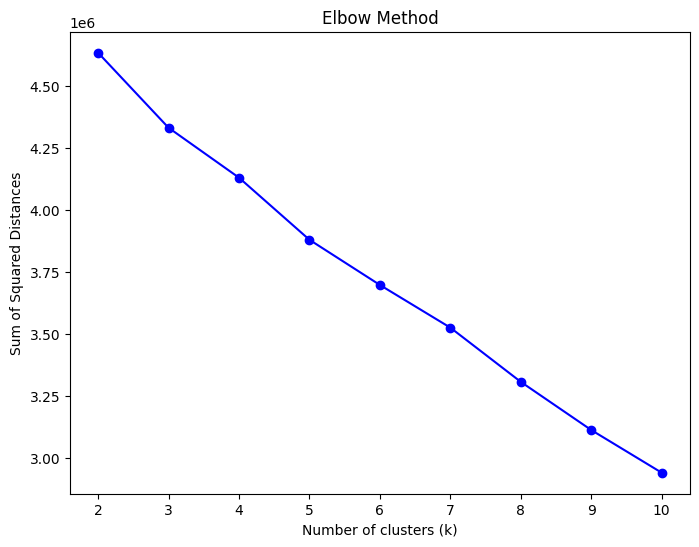

In [142]:
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), wcss, 'bo-')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Squared Distances')
plt.show()

In [143]:
from yellowbrick.cluster import KElbowVisualizer

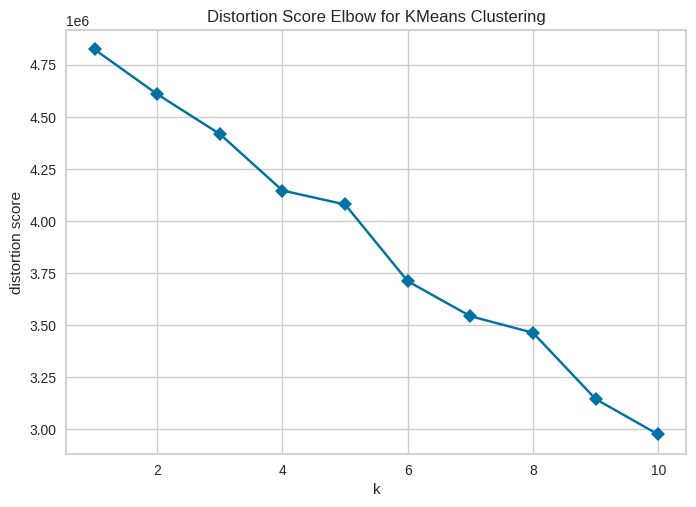

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [144]:
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(1,11), timings= False)
visualizer.fit(df_scaled1)       # Fit data to visualizer
visualizer.show()

Looks like 5 has some potential but not promising enough evidence So we will try label encoding. Before that lets quantify the evaluation.

In [145]:
model=KMeans(n_clusters=5,random_state=0)
model.fit(df_scaled1)
df_scaled1['label']=model.labels_
df_scaled1['label'].value_counts()

label
0    71248
1    65196
4    20689
3    10443
2     4703
Name: count, dtype: int64

***Silhouette Score***

In [146]:
sil_ohe=silhouette_score(df_scaled1,model.labels_)
sil_ohe

np.float64(0.2641344878684689)

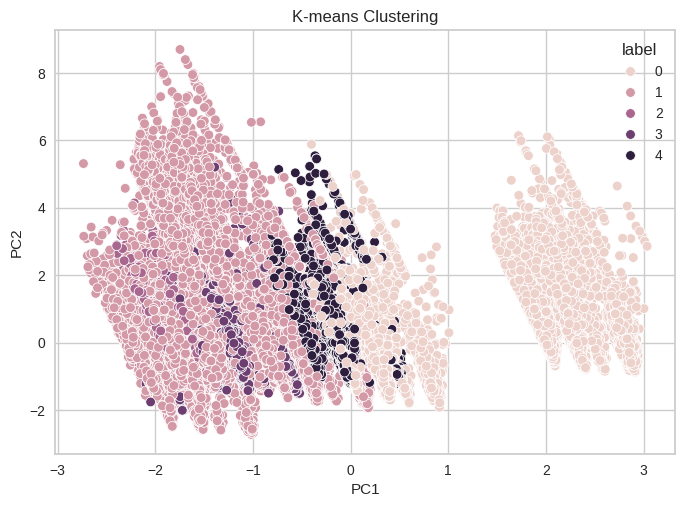

In [147]:
pca=PCA(n_components=2)
df_pca=pd.DataFrame(pca.fit_transform(df_scaled1.iloc[:,:27]),columns=['PC1','PC2'])
df_pca['label']=df_scaled1['label']

sns.scatterplot(df_pca,hue='label',x='PC1',y='PC2')
plt.title('K-means Clustering')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

##### Label Encoding

In [148]:
df_label=df1.copy()
le=LabelEncoder()
df_label['job_category_label']=le.fit_transform(df_label['job_category'])
df_label.drop(columns=['job_category','company_hash_clean'],inplace=True)
df_label=df_label.iloc[:,[4,5,0,1,2,3]]
df_label

company_hash_encoded  job_category_encoded        ctc  \
0                       1868                 44372 3500000.00   
1                      47624                 44372  250000.00   
2                        191                 26876 1300000.00   
3                         12                 26876 2000000.00   
4                        663                 20689 3400000.00   
...                      ...                   ...        ...   
172274                 47624                  6545 3529999.00   
172275                 47624                 20689 1600000.00   
172276                    19                  4703  900000.00   
172277                   145                 26876  700000.00   
172278                   711                 26876 1500000.00   

        ctc_updated_year  experience_years  promotion_status  
0                   2019                 7                 0  
1                   2020                 7                 0  
2                   2021                 0                 0  
3                   2021                17                 0  
4                   2018                 9                 0  
...                  ...               ...               ...  
172274              2019                15                 0  
172275              2018                 3                 0  
172276              2019                 5                 0  
172277              2020                 0                 0  
172278              2021                 3                 0  

[172279 rows x 6 columns]

In [149]:
scaled=StandardScaler()
df_scaled2=pd.DataFrame(scaled.fit_transform(df_label),columns=df_label.columns)
df_scaled2

company_hash_encoded  job_category_encoded   ctc  ctc_updated_year  \
0                      -0.57                  1.47  1.02             -0.42   
1                       1.61                  1.47 -0.63              0.34   
2                      -0.65                  0.29 -0.10              1.11   
3                      -0.66                  0.29  0.26              1.11   
4                      -0.63                 -0.12  0.97             -1.19   
...                      ...                   ...   ...               ...   
172274                  1.61                 -1.08  1.03             -0.42   
172275                  1.61                 -0.12  0.05             -1.19   
172276                 -0.66                 -1.20 -0.30             -0.42   
172277                 -0.66                  0.29 -0.40              0.34   
172278                 -0.63                  0.29  0.00              1.11   

        experience_years  promotion_status  
0                   0.61             -0.22  
1                   0.61             -0.22  
2                  -1.16             -0.22  
3                   3.14             -0.22  
4                   1.12             -0.22  
...                  ...               ...  
172274              2.63             -0.22  
172275             -0.40             -0.22  
172276              0.10             -0.22  
172277             -1.16             -0.22  
172278             -0.40             -0.22  

[172279 rows x 6 columns]

Finding K

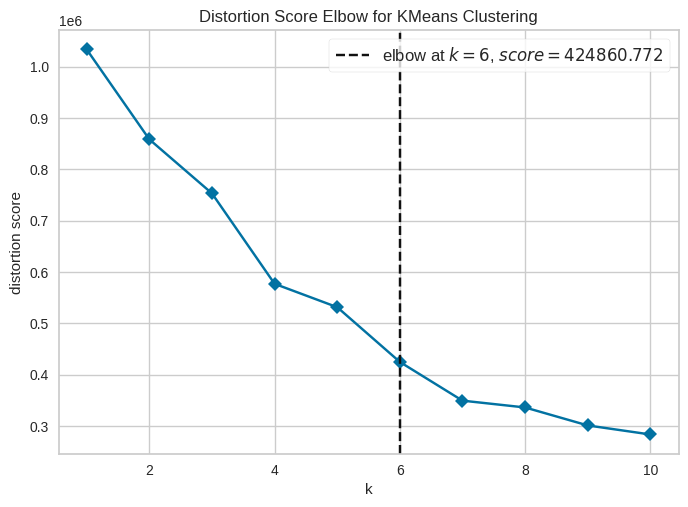

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [150]:
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(1,11), timings= False)
visualizer.fit(df_scaled2)       # Fit data to visualizer
visualizer.show()

In [151]:
wcss=[]
for k in range(2,11):
  kmean=KMeans(n_clusters=k,random_state=52)
  kmean.fit(df_scaled2)
  wcss.append(kmean.inertia_)

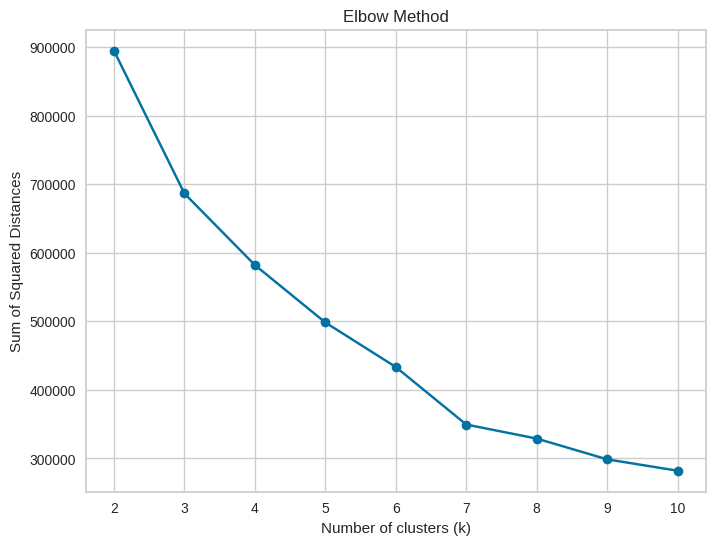

In [152]:
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), wcss, 'bo-')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Squared Distances')
plt.show()

In [153]:
kmean=KMeans(n_clusters=5,random_state=52)
kmean.fit(df_scaled2.drop(columns=['promotion_status','ctc_updated_year']))
labels=pd.Series(kmean.labels_)
labels.value_counts()

2    87838
0    34884
1    26247
4    20379
3     2931
Name: count, dtype: int64

In [154]:
from scipy.cluster.hierarchy import fcluster

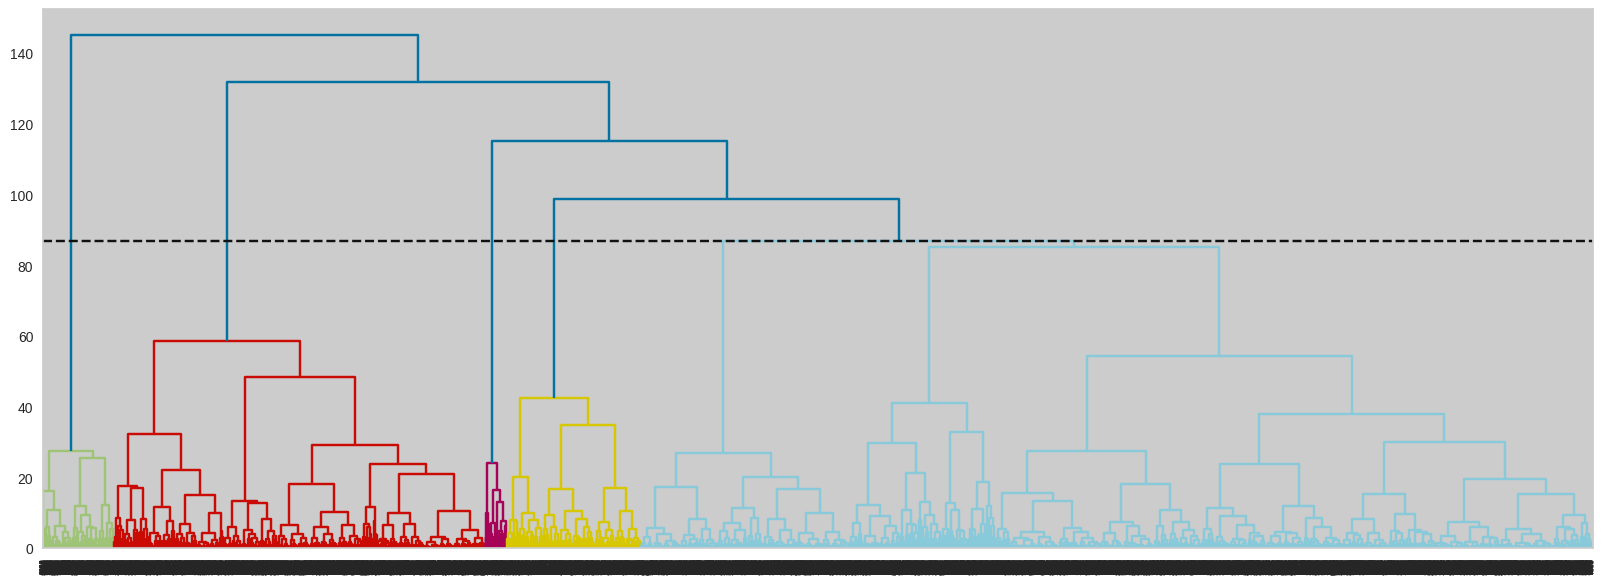

In [155]:
# Sample a subset of the data
df_sampled = df_scaled2.sample(n=10000, random_state=0)

# Perform hierarchical clustering
Z = linkage(df_sampled, method='ward')

# Get cluster assignments for 5 clusters
cluster_labels = fcluster(Z, t=5, criterion='maxclust')

# Then plot with color_threshold that matches this cut
plt.figure(figsize=(20, 7))
dendrogram(Z, color_threshold=Z[-5, 2]+0.5)  # Cut at the height that gives 5 clusters
plt.axhline(Z[-5, 2], c='k', linestyle='--')  # Optional: show cut line
plt.show()

In [156]:
df_exp=df1.drop(columns=['promotion_status','ctc_updated_year','company_hash_clean','job_category'])
df_exp


ctc  experience_years  company_hash_encoded  \
0      3500000.00                 7                  1868   
1       250000.00                 7                 47624   
2      1300000.00                 0                   191   
3      2000000.00                17                    12   
4      3400000.00                 9                   663   
...           ...               ...                   ...   
172274 3529999.00                15                 47624   
172275 1600000.00                 3                 47624   
172276  900000.00                 5                    19   
172277  700000.00                 0                   145   
172278 1500000.00                 3                   711   

        job_category_encoded  
0                      44372  
1                      44372  
2                      26876  
3                      26876  
4                      20689  
...                      ...  
172274                  6545  
172275                 20689  
172276                  4703  
172277                 26876  
172278                 26876  

[172279 rows x 4 columns]

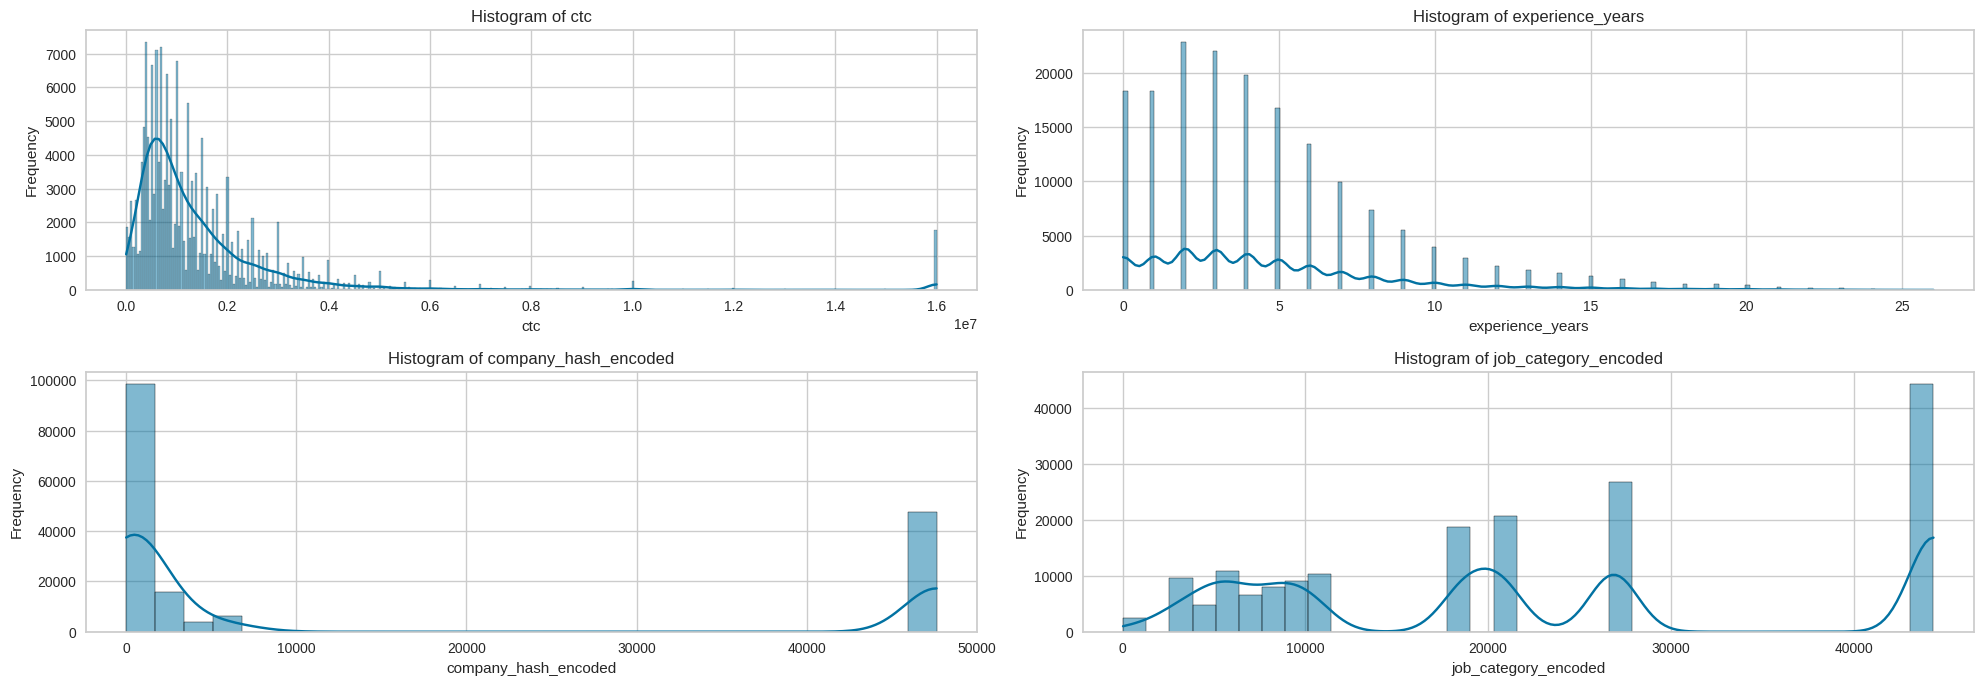

In [157]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 10))
axes = axes.flatten()

# Plot each column
for i, col in enumerate(df_exp.columns):
    sns.histplot(df_exp[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Hide the unused subplot
if len(df_exp.columns) < len(axes):
    for j in range(len(df_exp.columns), len(axes)):
        axes[j].set_visible(False)

plt.tight_layout()
plt.show()

In [158]:
upper_limit_ctc = df_exp['ctc'].quantile(0.99)
df_cleaned = df_exp[df_exp['ctc'] < upper_limit_ctc]

In [159]:
df_cleaned['ctc_log'] = np.log1p(df_exp['ctc'])

In [160]:
df_cleaned = df_cleaned.drop(['ctc'], axis=1)

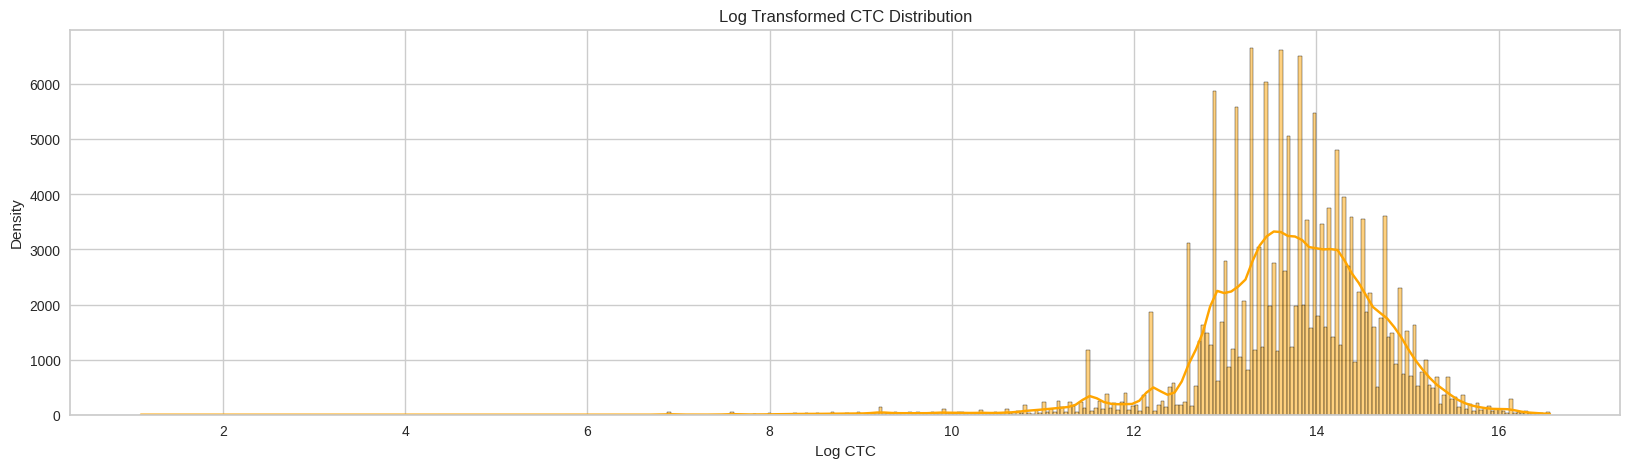

In [161]:
# histogram of log transformed ctc
plt.figure(figsize=(20, 5))
sns.histplot(df_cleaned['ctc_log'], kde=True, color='orange')
plt.title('Log Transformed CTC Distribution')
plt.xlabel('Log CTC')
plt.ylabel('Density')
plt.show()

In [162]:
df_cleaned

experience_years  company_hash_encoded  job_category_encoded  ctc_log
0                      7                  1868                 44372    15.07
1                      7                 47624                 44372    12.43
2                      0                   191                 26876    14.08
3                     17                    12                 26876    14.51
4                      9                   663                 20689    15.04
...                  ...                   ...                   ...      ...
172274                15                 47624                  6545    15.08
172275                 3                 47624                 20689    14.29
172276                 5                    19                  4703    13.71
172277                 0                   145                 26876    13.46
172278                 3                   711                 26876    14.22

[170517 rows x 4 columns]

In [163]:
scaler = StandardScaler()

# Fit and transform the data
scaled_features = scaler.fit_transform(df_cleaned[['experience_years', 'company_hash_encoded', 'job_category_encoded', 'ctc_log']])

# Convert the scaled features back to a DataFrame
df_scaled = pd.DataFrame(scaled_features, columns=['experience_years', 'company_hash_encoded', 'job_category_encoded', 'ctc_log'])

## K - MEANS

### Clustering Tendency Check

In [164]:
def hopkins_statistic(X):
    X = np.array(X)  # Ensure X is a numpy array
    d = X.shape[1]  # Number of dimensions
    n = len(X)  # Number of data points
    m = int(0.1 * n)  # Subset size (10% of the data points)

    nbrs = NearestNeighbors(n_neighbors=1).fit(X)
    rand_X = np.random.random((m, d)) * np.amax(X, axis=0)
    u_distances, _ = nbrs.kneighbors(rand_X, 2, return_distance=True)

    w_distances, _ = nbrs.kneighbors(X[np.random.choice(n, m, replace=False)], 2, return_distance=True)

    u_distances = u_distances[:, 1]
    w_distances = w_distances[:, 1]

    H = (np.sum(u_distances) / (np.sum(u_distances) + np.sum(w_distances)))
    return H

hopkins_score = hopkins_statistic(df_scaled)
print(f"Hopkins Statistic: {hopkins_score}")

Hopkins Statistic: 0.9851885105101724


### Finding K with Elbow method

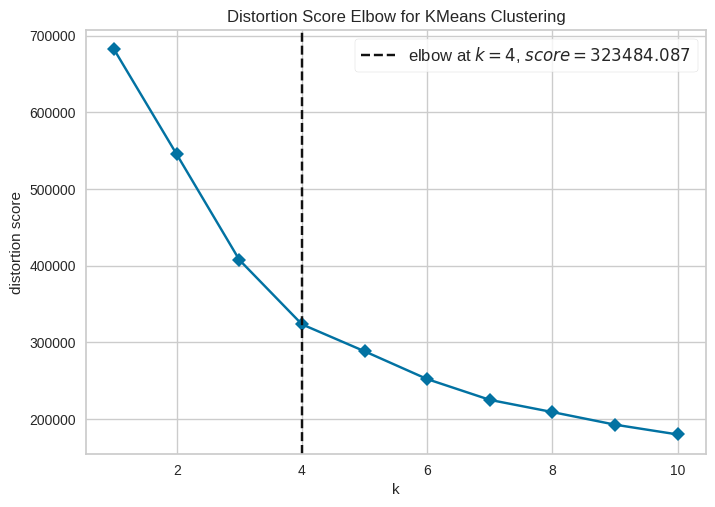

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [171]:
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(1,11), timings= False)
visualizer.fit(df_scaled)       # Fit data to visualizer
visualizer.show()

### Evaluating the Clusters

In [172]:
kmean=KMeans(n_clusters=4,random_state=52)
kmean.fit(df_scaled)
labels=pd.Series(kmean.labels_)
labels.value_counts()

3    66883
1    42482
0    39209
2    21943
Name: count, dtype: int64

####*silhouette_score*

In [167]:
kmean_sil_scaled=silhouette_score(df_scaled,labels)
kmean_sil_scaled

np.float64(0.32283487645978115)

Silhouette Score with job_category column encoded via label encoding and removing irrelevant columns is giving slightly better results(0.32) than silhouette score( with all columns0.27)

####PCA

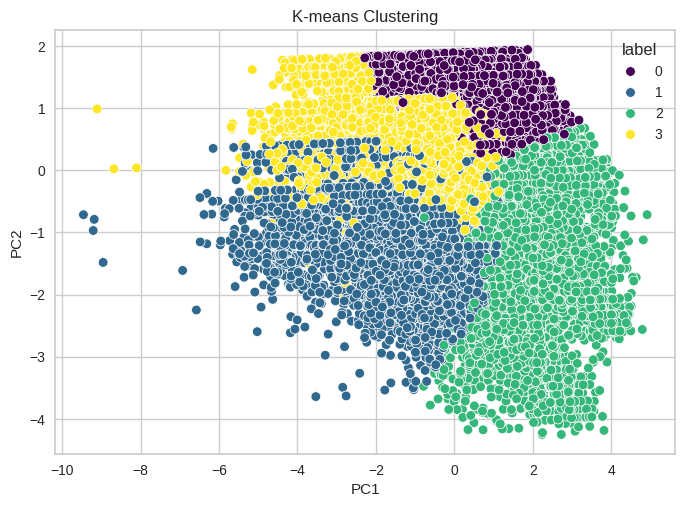

In [168]:
pca=PCA(n_components=2)
df_pca=pd.DataFrame(pca.fit_transform(df_scaled),columns=['PC1','PC2'])
df_pca['label']=labels

sns.scatterplot(df_pca,hue='label',x='PC1',y='PC2',palette='viridis')
plt.title('K-means Clustering')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [190]:
df_scaled

experience_years  company_hash_encoded  job_category_encoded  ctc_log
0                   0.61                 -0.57                  1.47     1.38
1                   0.61                  1.62                  1.47    -1.32
2                  -1.16                 -0.65                  0.29     0.36
3                   3.15                 -0.66                  0.29     0.81
4                   1.12                 -0.63                 -0.13     1.35
...                  ...                   ...                   ...      ...
170512              2.64                  1.62                 -1.08     1.39
170513             -0.40                  1.62                 -0.13     0.58
170514              0.10                 -0.66                 -1.20    -0.01
170515             -1.16                 -0.65                  0.29    -0.27
170516             -0.40                 -0.63                  0.29     0.51

[170517 rows x 4 columns]

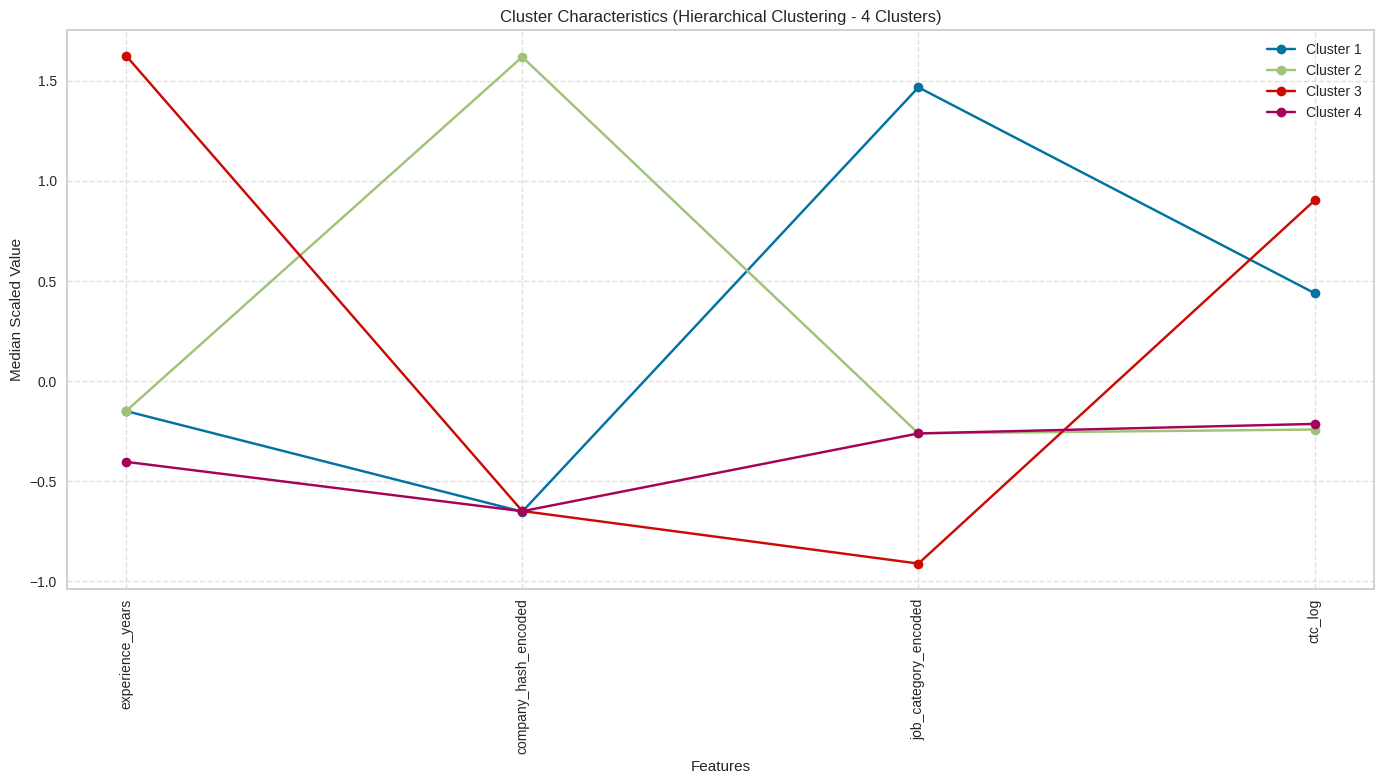

In [203]:
# Add cluster labels to thescaled dataframe
labels = pd.Series(kmean.labels_)


df_scaled_clustered = df_scaled.copy()
df_scaled_clustered['cluster'] = kmean.labels_

# Compute the mean of each feature per cluster

clustered_df_mean = df_scaled_clustered.groupby('cluster').median()
# Define labels for the 4 clusters
labels = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4']

# Plot a line graph to visualize cluster characteristics
plt.figure(figsize=(14, 8))
plt.plot(clustered_df_mean.T, marker='o')
plt.title('Cluster Characteristics (Hierarchical Clustering - 4 Clusters)')
plt.xlabel('Features')
plt.ylabel('Median Scaled Value')
plt.xticks(rotation=90)
plt.legend(labels)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

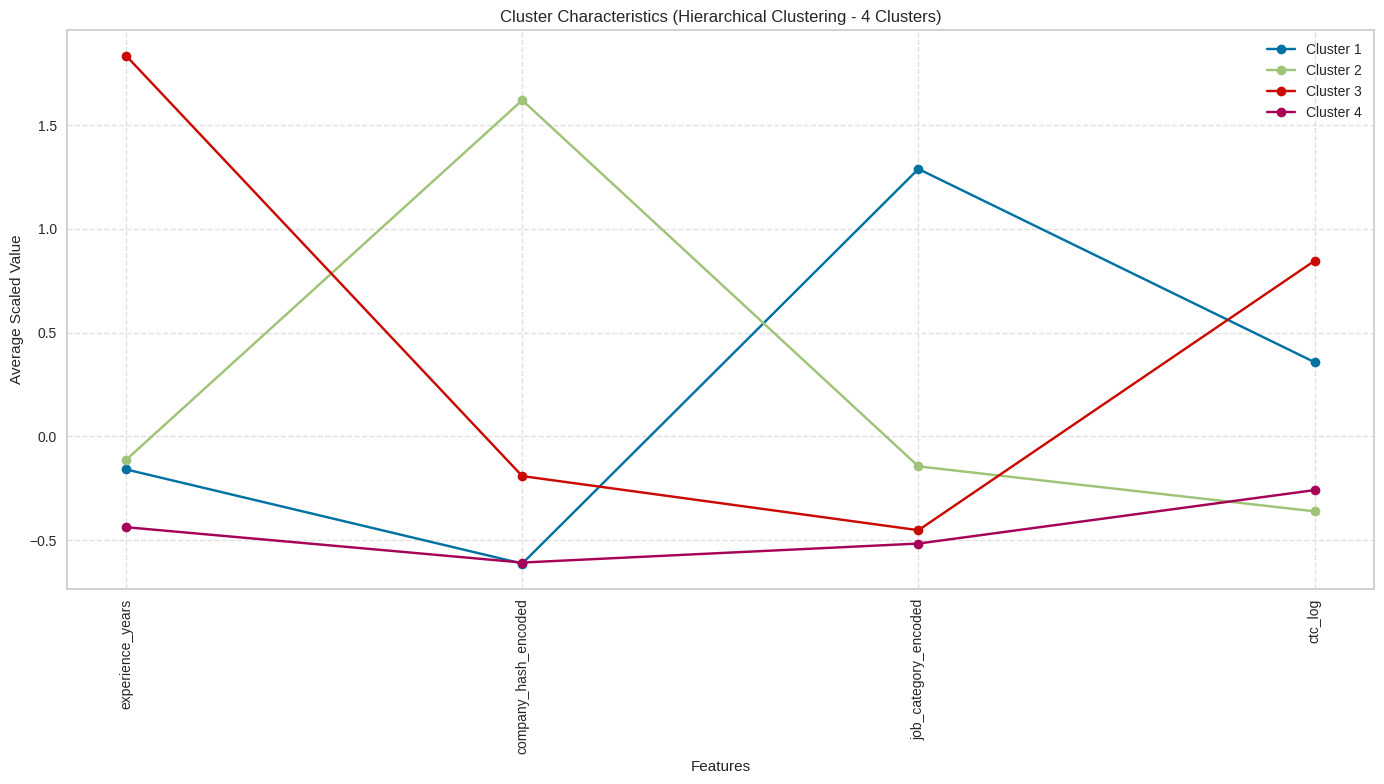

In [193]:
# Add cluster labels to thescaled dataframe
labels = pd.Series(kmean.labels_)


df_scaled_clustered = df_scaled.copy()
df_scaled_clustered['cluster'] = kmean.labels_

# Compute the mean of each feature per cluster

clustered_df_mean = df_scaled_clustered.groupby('cluster').mean()
# Define labels for the 4 clusters
labels = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4']

# Plot a line graph to visualize cluster characteristics
plt.figure(figsize=(14, 8))
plt.plot(clustered_df_mean.T, marker='o')
plt.title('Cluster Characteristics (Hierarchical Clustering - 4 Clusters)')
plt.xlabel('Features')
plt.ylabel('Average Scaled Value')
plt.xticks(rotation=90)
plt.legend(labels)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


####TSNE

In [169]:
'''tsne=TSNE(n_components=2,random_state=26)
df_tsne=pd.DataFrame(tsne.fit_transform(df_scaled),columns=['X1','X2'])
df_tsne['label']=labels

plt.scatter(df_tsne['X1'],df_tsne['X2'],c=df_tsne['label'])
plt.title('TSNE')
plt.show()'''

"tsne=TSNE(n_components=2,random_state=26)\ndf_tsne=pd.DataFrame(tsne.fit_transform(df_scaled),columns=['X1','X2'])\ndf_tsne['label']=labels\n\nplt.scatter(df_tsne['X1'],df_tsne['X2'],c=df_tsne['label'])\nplt.title('TSNE')\nplt.show()"

## Hierarchical Clustering

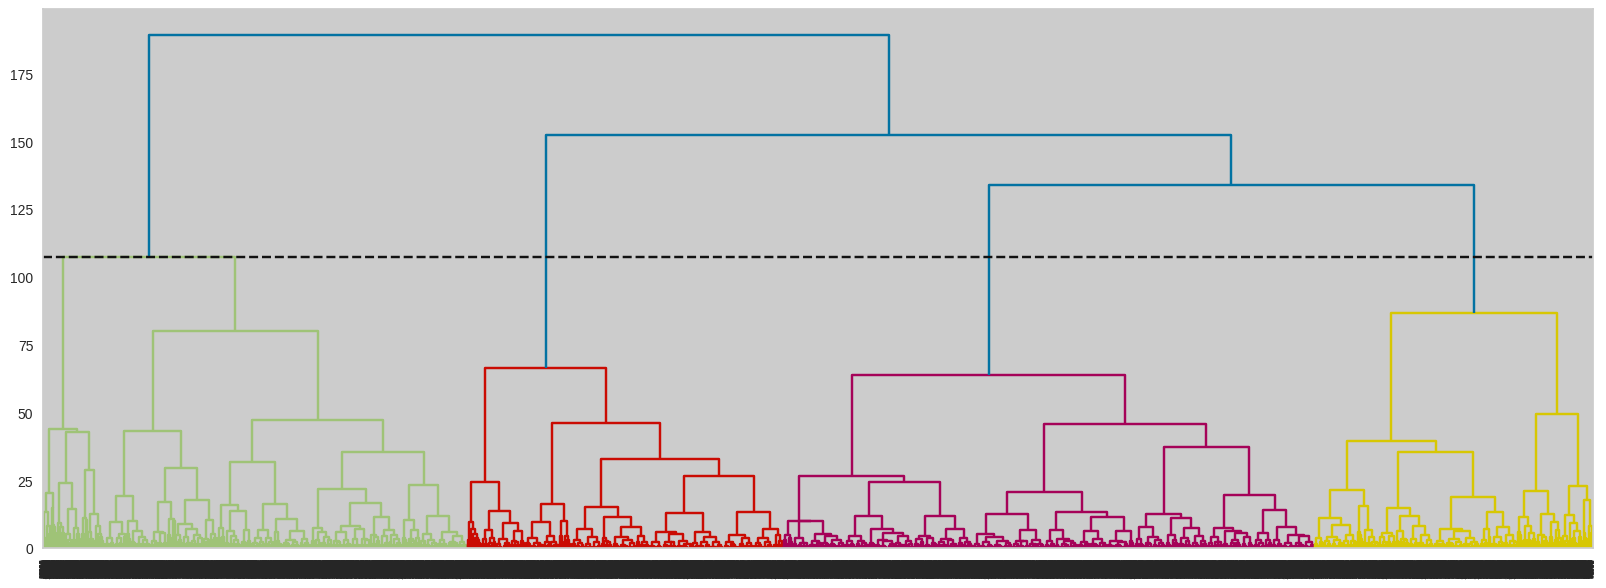

In [205]:
# Sample a subset of the data
df_sampled = df_scaled.sample(n=20000, random_state=0)

# Perform hierarchical clustering
Z = linkage(df_sampled, method='ward')

# Get cluster assignments for 4 clusters
cluster_labels = fcluster(Z, t=4, criterion='maxclust')

# Then plot with color_threshold that matches this cut
plt.figure(figsize=(20, 7))
dendrogram(Z, color_threshold=Z[-4, 2]+0.5)  # Cut at the height that gives 4 clusters
plt.axhline(Z[-4, 2], c='k', linestyle='--')  #  show cut line
plt.show()

In [206]:
model = AgglomerativeClustering(n_clusters=4, linkage='ward')
df_sampled['label']=model.fit_predict(df_sampled)
df_sampled['label'].value_counts()

label
3    6853
0    5489
2    4065
1    3593
Name: count, dtype: int64

### Performing Aggomerative clustering with 4 clusters

In [ ]:
'''# import hierarchical clustering libraries
from sklearn.cluster import AgglomerativeClustering

# create clusters
hc = AgglomerativeClustering(n_clusters=4, metric= 'euclidean', linkage = 'ward')
y_pred = hc.fit_predict(df_scaled)'''

In [ ]:
'''ypred'''

In [ ]:
'''viz_df = df_scaled
viz_df['Y_Predicted'] = y_pred'''

In [ ]:
'''#Plot a line graph to see the characteristics of the clusters
df_scaled['label'] = pd.Series(y_pred, index=df_scaled.index)

clustered_df = df_scaled.groupby('label').mean()

labels = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4']

plt.figure(figsize=(14,8))
plt.plot(clustered_df.T, label=labels)
plt.xticks(rotation=90)
plt.legend(labels)
'''

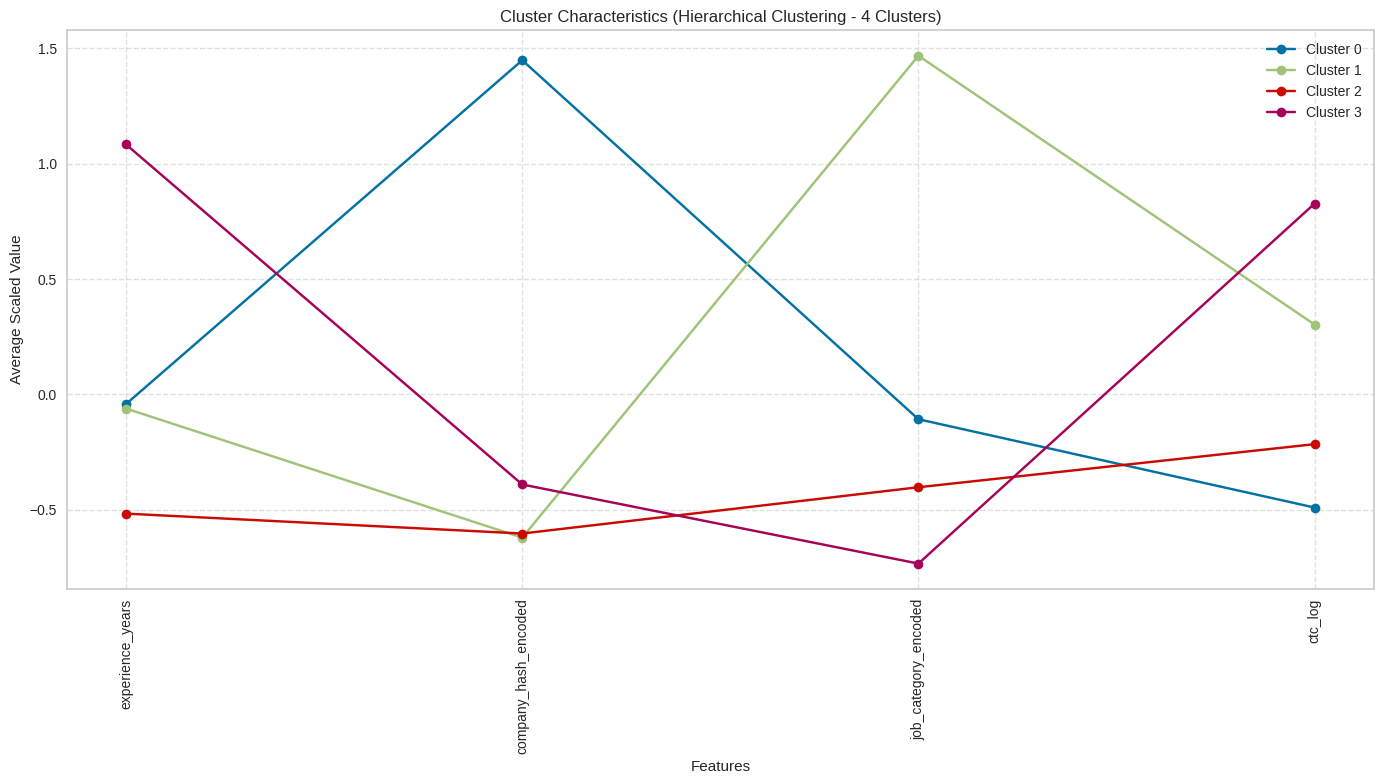

In [208]:
# Add cluster labels to the sampled scaled dataframe
df_sampled['label'] = pd.Series(cluster_labels, index=df_sampled.index)

# Compute the mean of each feature per cluster
clustered_df = df_sampled.groupby('label').mean()

# Define labels for the 4 clusters
labels = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3']

# Plot a line graph to visualize cluster characteristics
plt.figure(figsize=(14, 8))
plt.plot(clustered_df.T, marker='o')
plt.title('Cluster Characteristics (Hierarchical Clustering - 4 Clusters)')
plt.xlabel('Features')
plt.ylabel('Average Scaled Value')
plt.xticks(rotation=90)
plt.legend(labels)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


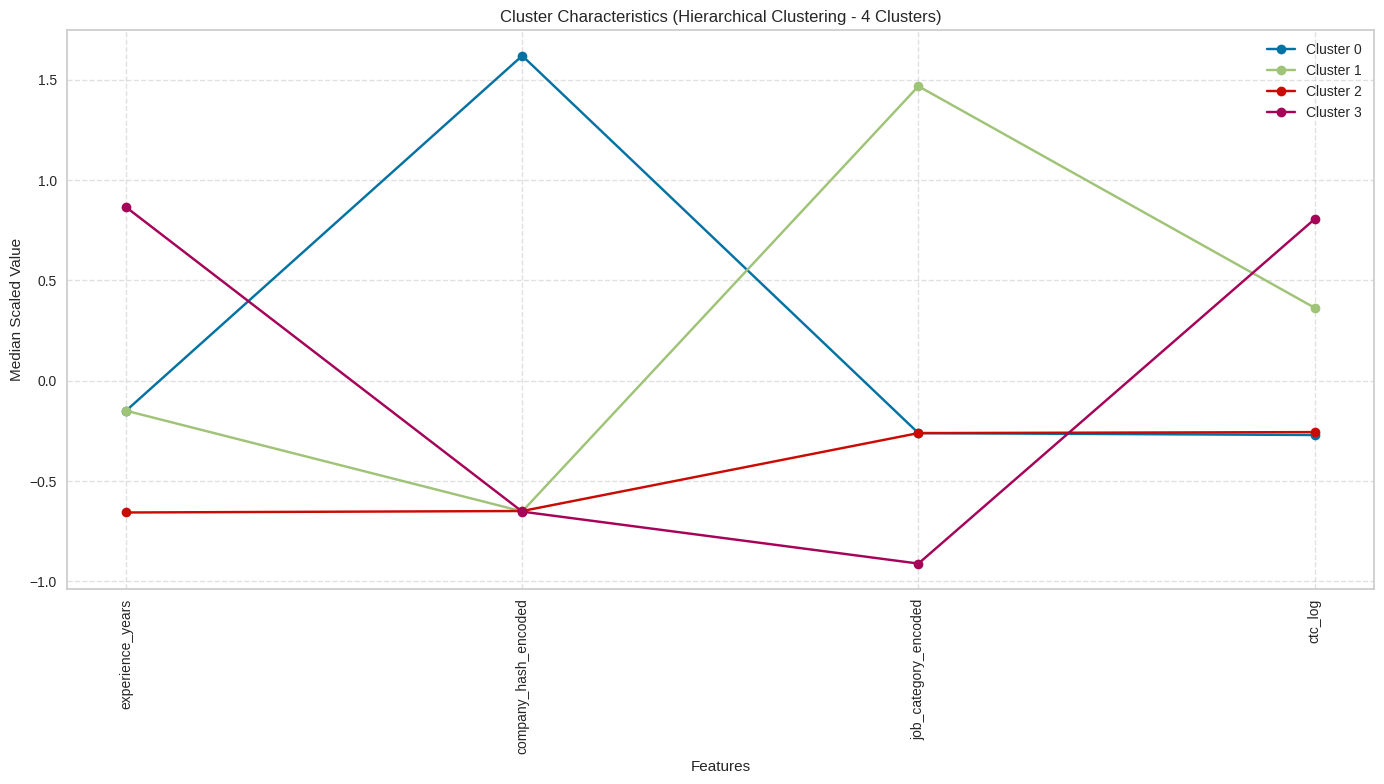

In [209]:
# Add cluster labels to the sampled scaled dataframe
df_sampled['label'] = pd.Series(cluster_labels, index=df_sampled.index)

# Compute the median of each feature per cluster
clustered_df = df_sampled.groupby('label').median()

# Define labels for the 4 clusters
labels = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3']

# Plot a line graph to visualize cluster characteristics
plt.figure(figsize=(14, 8))
plt.plot(clustered_df.T, marker='o')
plt.title('Cluster Characteristics (Hierarchical Clustering - 4 Clusters)')
plt.xlabel('Features')
plt.ylabel('Median Scaled Value')
plt.xticks(rotation=90)
plt.legend(labels)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [210]:
# sampling the data as the session is crashing due limited ram and high tc of the algorithm
df_sampled = df_scaled.sample(n=10000, random_state=0)

hc = AgglomerativeClustering(
    n_clusters=4,
    metric='euclidean',
    linkage='ward'
)

y_pred = hc.fit_predict(df_sampled)


df_sampled = df_sampled.copy()
df_sampled['label'] = y_pred

print("Hierarchical clustering completed successfully on the sample.")


Hierarchical clustering completed successfully on the sample.


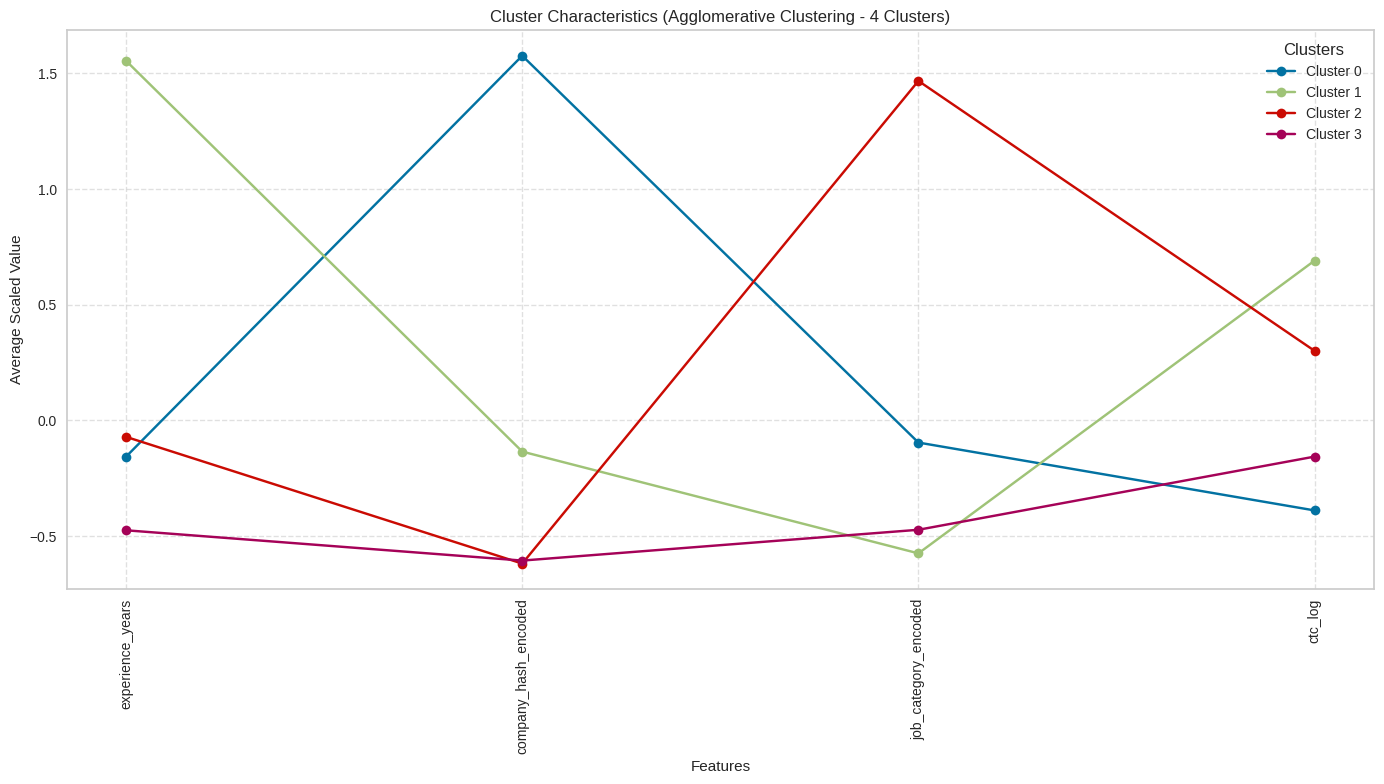

In [211]:
#
viz_df = df_sampled.copy()
viz_df['label'] = y_pred

# Compute average feature values per cluster
clustered_df = viz_df.groupby('label').mean()

labels = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3']

# Plot cluster
plt.figure(figsize=(14, 8))
plt.plot(clustered_df.T, marker='o')
plt.title('Cluster Characteristics (Agglomerative Clustering - 4 Clusters)')
plt.xlabel('Features')
plt.ylabel('Average Scaled Value')
plt.xticks(rotation=90)
plt.legend(labels, title='Clusters')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


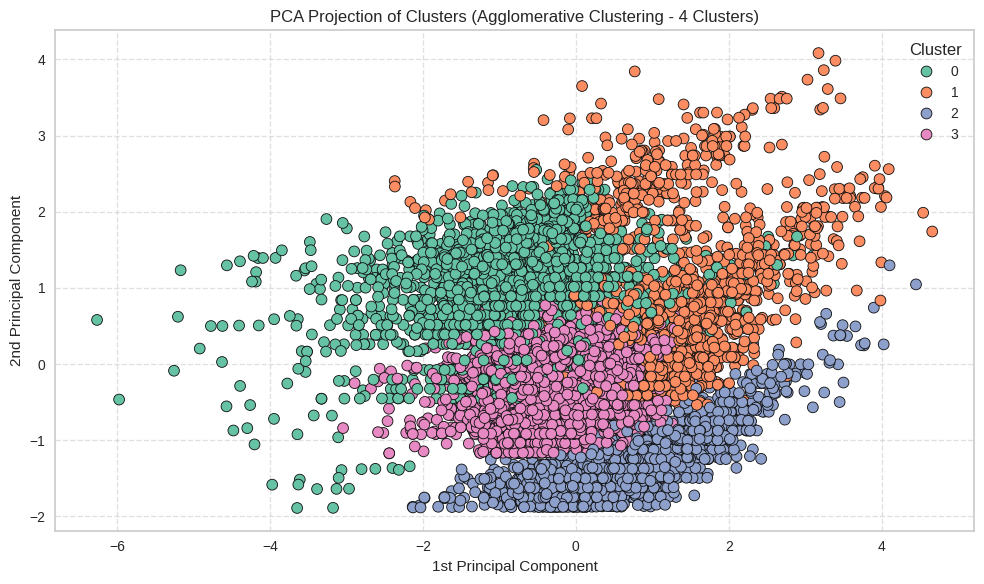

In [212]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(df_sampled.drop(columns=['label'], errors='ignore'))

#
pca_df = pd.DataFrame(pca_data, columns=['1st_principal', '2nd_principal'])
pca_df['label'] = y_pred

#  Visualize clusters in 2D PCA space
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=pca_df,
    x='1st_principal',
    y='2nd_principal',
    hue='label',
    palette='Set2',
    s=60,
    edgecolor='k',
)
plt.title('PCA Projection of Clusters (Agglomerative Clustering - 4 Clusters)')
plt.xlabel('1st Principal Component')
plt.ylabel('2nd Principal Component')
plt.legend(title='Cluster')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

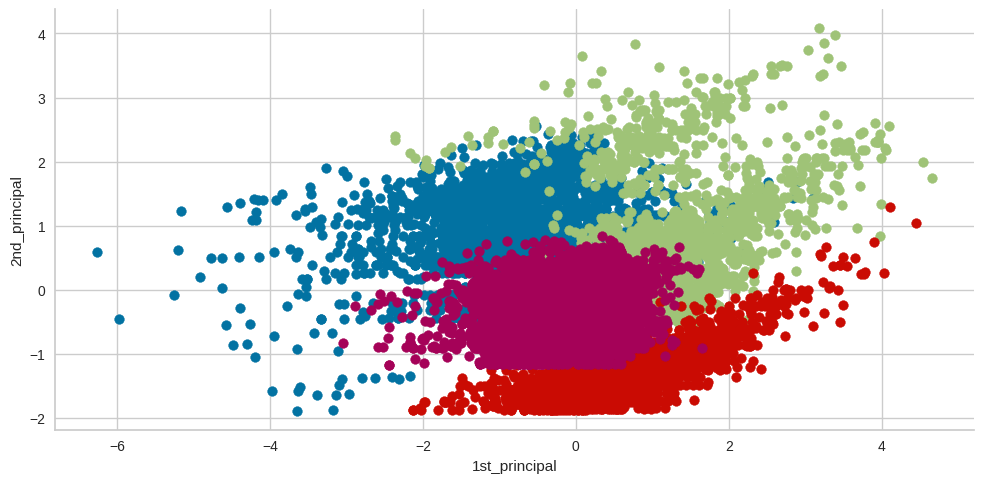

In [213]:
g = sns.FacetGrid(pca_df, hue="label",height=5 ,aspect= 2)
g.map(plt.scatter, '1st_principal', '2nd_principal')
plt.show()


# Questionnaire



***1. What percentage of users fall into the largest cluster?***

Cluster 3 with a user count of **66,883** that comprises of close to **39%** of Total Learners.

This cluster represents employees in a specific, high-value job category. Despite having less-than-average experience, their specialized role commands a slightly above-average salary.

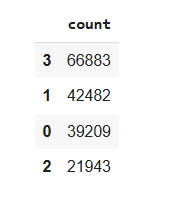

***2. Comment on the characteristics that differentiate the primary clusters from each other***

The clusters exhibit distinct characteristics that differentiate them based on salary (CTC) and years of  experience:

**Cluster Profiles:**

1. Cluster 1 (Blue):

Defining Feature: A very high value for company_hash_encoded (approx. +1.6).

Other Features: Below-average experience, job category, and salary.

Interpretation: This cluster likely represents employees working at one specific company (or a specific group of companies) represented by that high encoded value. These employees tend to have slightly less experience and lower salaries than the overall average.

2. Cluster 2 (Green):

Defining Features: Very high experience_years (approx. +1.6) and a high ctc_log (approx. +0.7).

Other Features: Below-average values for company and job category.

Interpretation: This is a cluster of senior, high-earning employees. Their high salary is strongly correlated with their extensive experience, regardless of the specific company or job category.

3. Cluster 3 (Red):

Defining Feature: A very high value for job_category_encoded (approx. +1.5).

Other Features: Below-average experience and company hash, with a slightly above-average salary.

Interpretation: This cluster represents employees in a specific, high-value job category. Despite having less-than-average experience, their specialized role commands a slightly above-average salary.

4. Cluster 4 (Purple):

Defining Features: Consistently below average on all four features, especially experience_years and the two encoded variables.

Interpretation: This is a cluster of junior employees. They have low experience, a low salary (relative to the average), and are in common job categories and companies (represented by the low encoded values).

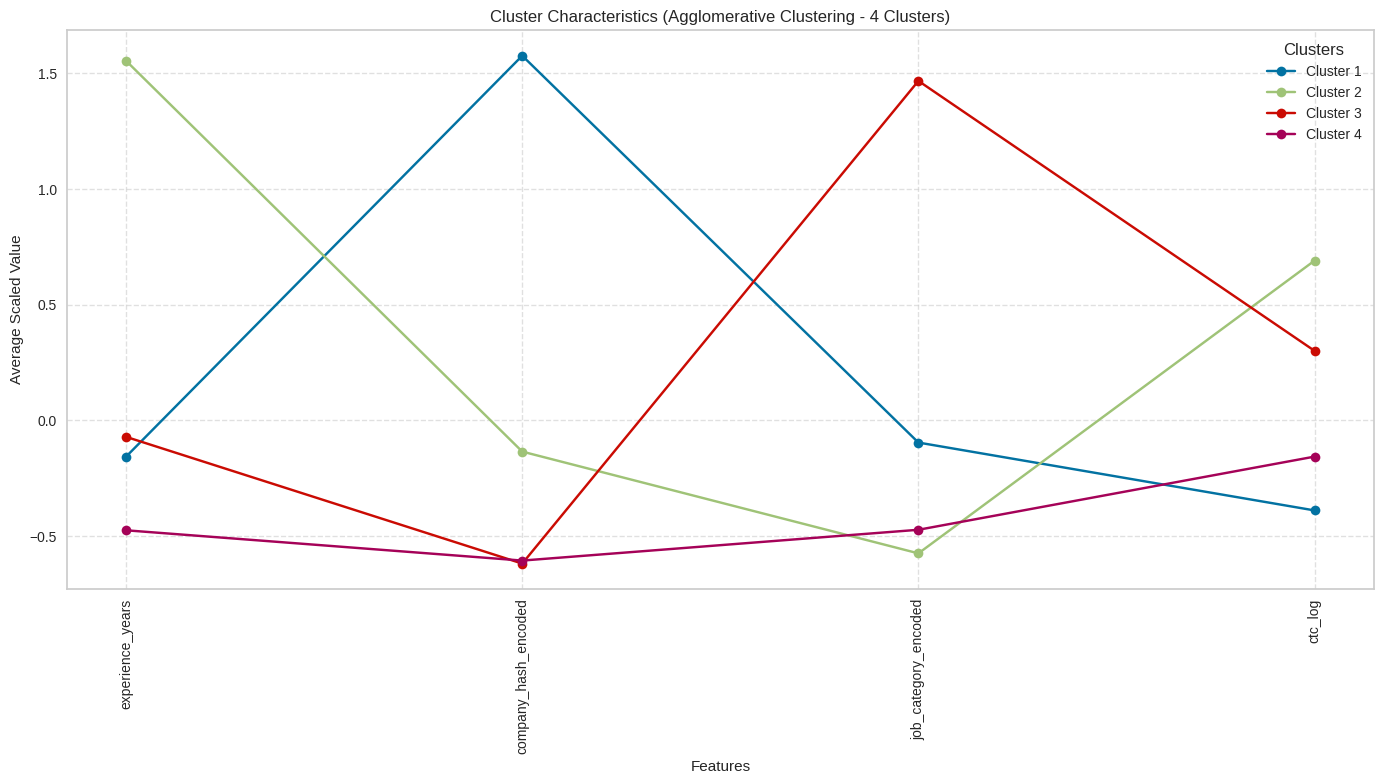


***3. Is it always true that with an increase in years of experience, the CTC increases?
Provide a case where this isn't true.***



No, it is not always true.

YOE and CTC Increase: The observations suggest a positive correlation between YOE and CTC, with managerial positions having the highest salaries. However, this isn't always true. Here's a counter-example:

An employee with high YOE in a lower-tier company might earn less than someone with less experience in a higher-tier company. This case highlights the impact of company tier on compensation besides YOE.Below is given the plot between year of experience and ctc which proves it. The plot shows people having 25 years or experience are having as low CTC as 2 lakhs too.

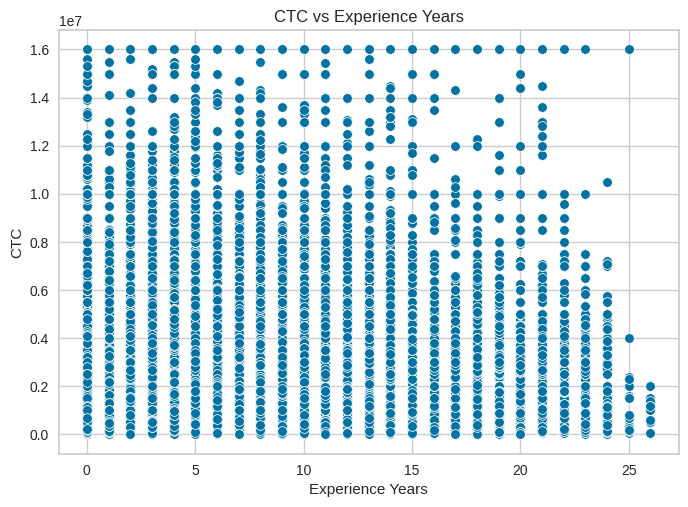

In [185]:
sns.scatterplot(x=df_grp['experience_years'],y=df_grp['ctc'])
plt.title('CTC vs Experience Years')
plt.xlabel('Experience Years')
plt.ylabel('CTC')
plt.show()

***4. Name a job position that is commonly considered entry-level but has a few learners with unusually high CTCs in the dataset.***

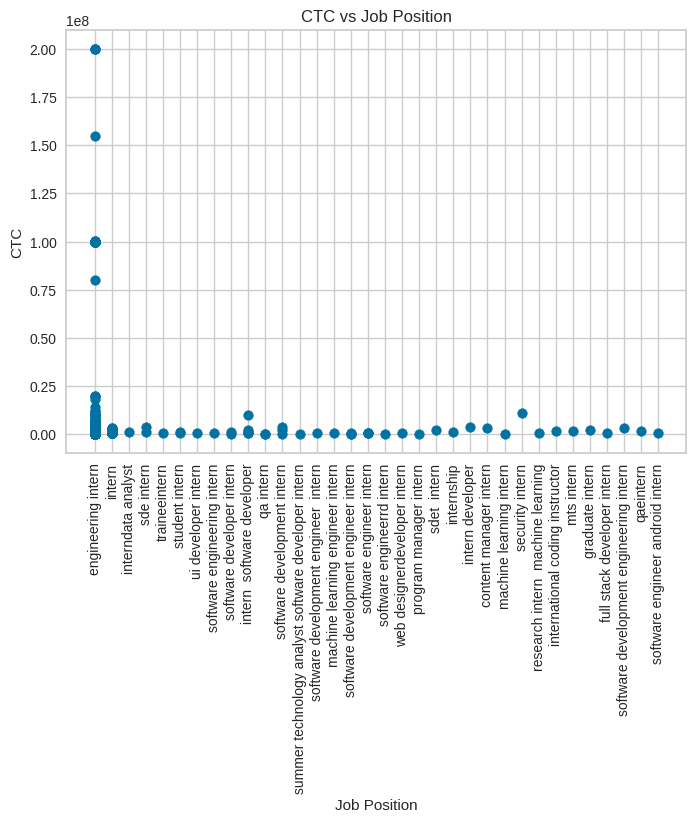

In [186]:
req_df=df[df['job_position'].str.contains('intern')][['job_position','ctc']]
plt.scatter(x=req_df['job_position'],y=req_df['ctc'])
plt.title('CTC vs Job Position')
plt.xlabel('Job Position')
plt.xticks(rotation=90)
plt.ylabel('CTC')
plt.show()

We can see intern, especially the engineering intern are getting usually high pay, sometime even more 1 crore, though intern is an beginner and entry level roles.

***5. What is the average CTC of learners across different job positions?***

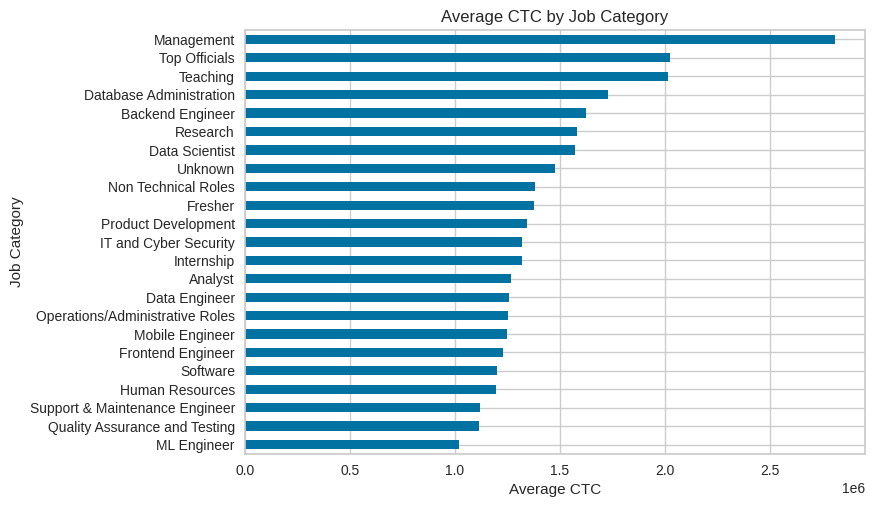

In [187]:
pd.set_option('display.float_format', '{:.2f}'.format)
df_grp.groupby(['job_category'])['ctc'].mean().sort_values().plot(kind='barh')
plt.title('Average CTC by Job Category')
plt.xlabel('Average CTC')
plt.ylabel('Job Category')
plt.show()

- The data indicates that **Management** roles command the highest mean CTC at ₹2,809,363, followed closely by **Teaching** and **Top Officials**, highlighting the premium for leadership and specialized knowledge.
- **Database Administration** and **Backend Engineer** roles also exhibit higher-than-average mean CTCs, reflecting demand for technical expertise.
- Interestingly, entry-level or early-career categories like **Internship** and **Fresher** show moderately high mean CTCs (~₹1,318,623 and ₹1,349,649), possibly skewed by a few high-paying outliers.
- Non-technical and administrative roles generally fall in the mid-range, signifying steady compensation without extreme varianc

***6. For a given company, how does the average CTC of a Data Scientist compare with other roles?***

Based on the above plotted bargraph, we can conclude that:

The Data Scientist role has a mean CTC of 1,574,122.84.
Comparing this to other roles:
1. It is significantly higher than Analyst (1,266,875.63) and Frontend Engineer (1,227,345.29), suggesting a higher valuation for advanced analytical skills.
2. It is also above non-technical roles like Human Resources (1,196,791.04) and Operations/Administrative Roles (1,267,000.00).
3. However, it is lower than Management (2,809,363.29) and Top Officials (1,993,288.65), reflecting the premium for leadership positions.

This highlights that Data Scientist roles are highly valued, ranking above many technical and non-technical roles but below top management and leadership categories.

***7. Discuss the distribution of learners based on the Tier flag:***

* Which companies dominate in Tier 1 and why might this be the case?
* Are there any notable patterns or insights when comparing learners from Tier 3 across different companies?

In [188]:
df_seg3[df_seg3['Tier']==1]['company_hash_clean'].value_counts().head(10)

company_hash_clean
Small companies              11905
nvnv wgzohrnvzwj otqcxwto     1440
xzegojo                        987
vbvkgz                         735
wgszxkvzn                      604
zgn vuurxwvmrt vwwghzn         594
vwwtznhqt                      544
gqvwrt                         471
bxwqgogen                      467
fxuqg rxbxnta                  452
Name: count, dtype: int64

1.In Tier 1 (companies with CTCs > 75%), Small Companies(companies having less than 5 employees among scaler learners) dominate with 11,905 employees, significantly outpacing larger companies. Other notable companies include nvnv wgzohrnvzwj otqcxwto (1,440 employees) and xzegojo (987 employees).

Reasons for dominance:

* Highly specialized roles: Small companies often hire for niche or critical roles, offering competitive CTCs to attract top talent.
* Growth opportunities: Employees at small companies may negotiate higher pay due to broader responsibilities and the potential for rapid career progression.
Resource scarcity: Small firms may lack the ability to hire in bulk, leading them to focus on quality over quantity with higher pay packages.
* Market competition: To compete with larger firms, small companies often offer premium salaries to secure top-tier candidates.
* There is also a possibility that these small companies are big companies in real but very few learners come from these companies to Scaler
This trend indicates that small companies may be leveraging high compensation as a key strategy to attract and retain talent in competitive job markets.

***8. After performing unsupervised clustering:***

* How many clusters have been identified using the Elbow method?
* Do the clusters formed align or differ significantly from the manual clustering efforts? If so, in what way?


1. Using the elbow method we identified that the best number of clusters is **4**.
2. These clusters are varying very much with the model clusters using **Kmeans** and **Agglomerative Clustering** because we performed manual clustering on the basis of **CTC** only basically.
 - Though the other clustering also took into consideration other features like the experience years and Job_category,Comapny_freq etc.
 - The no of clusters in Manual clusters were 3 but it is came to be 4 incase of clustering algorithms.

***9. From the Hierarchical Clustering results:***

* Are there any clear hierarchies or patterns formed that could suggest the different levels of seniority or roles within a company?
* How does the dendrogram representation correlate with the 'Years of Experience' feature?

1.As per hierarchial clustering. There are various clusters:
- **Cluster 0** This cluster likely represents employees working at one specific company (or a specific group of companies) represented by that high encoded value. These employees tend to have slightly less experience and lower salaries than the overall average.
- **Cluster 1** This is a cluster of senior, high-earning employees. Their high salary is strongly correlated with their extensive experience, regardless of the specific company or job category.
- **Cluster 2** This cluster represents employees in a specific, high-value job category. Despite having less-than-average experience, their specialized role commands a slightly above-average salary.
- **Cluster 3** This is a cluster of junior employees. They have low experience, a low salary (relative to the average), and are in common job categories and companies (represented by the low encoded values).

2.**Dendrogram and YOE**:

 The dendrogram might show some correlation with the "Years of Experience" feature. Learners with similar YOE might cluster together, but this wouldn't be the only factor influencing cluster formation. Other features like job position and company tier could also play a role.

#Insights and Actionable Recommendations

## Insights

1. *CTC Distribution and JOB Role Dynamics:*

Tier 1 companies with CTCs above the 75th percentile are dominated by small companies, likely due to their strategy of offering competitive pay to attract top talent despite limited hiring volume.
Roles like Data Scientists, Backend Engineers, and Database Administrators command significantly higher mean CTCs, reflecting their critical importance in technical projects.

2. *Entry-Level Anomalies:*

Certain entry-level roles such as "Internships" and "Fresher" surprisingly exhibit unusually high CTCs compared to their peers. This anomaly could be due to niche industries, high-value internships, or companies paying a premium for specific skills.
3. *Companies' Competitive Edge analysis:*

Small companies dominate in Tier 1, likely leveraging agility, innovation, and targeted recruitment strategies. Their focus on high-value hires, rather than mass recruitment, is a key differentiator.
Established firms like nvnv wgzohrnvzwj otqcxwto and xzegojo also show strong representation, indicating a mix of smaller firms and innovative leaders in the Tier 1 category.

4. *Job-Role Specific Insights:*

Data Scientists enjoy higher average CTCs compared to many other roles, reflecting the increasing demand for data-driven decision-making across industries.
Roles like "Operations/Administrative" and "Non-Technical" are positioned with lower CTCs, signifying their support-oriented nature and lesser direct contribution to revenue-driving tasks.

5. *Cluster Analogy:*

Clusters vary based on the number of hires, CTC ranges, and company sizes. Small companies,i.e.company with fewer employees in Scaler tend to belong to clusters emphasizing higher CTCs, while larger companies distribute across diverse salary bands.
Differentiation in clusters can also be attributed to industry focus (e.g., IT vs. non-technical sectors), geographical factors, and company growth stage.

6. *Market Strategy:*

Smaller companies rely on higher compensation as a strategy to compete for talent in the saturated market.
Established firms balance competitive pay with benefits, reputation, and long-term career growth opportunities, creating diverse hiring patterns across roles and clusters.

7. *Other Key Observations:*

* Industries and roles with consistent demand (e.g., Data Engineering, ML) correlate with higher CTCs.
Companies with niche market positions or innovative products often attract Tier 1 talent, as indicated by dominant names in the data.
The analysis revealed a positive correlation between YOE and compensation, with managerial positions offering the highest salaries.
CTC Variation:

* A larger proportion of employees are in the average or lower pay categories, suggesting a higher concentration of learners at the early to mid-career stages or in less lucrative roles.
The wide salary range suggests the need for personalized learning tracks catering to entry-level, mid-level, and senior professionals.
Experience Alignment: The concentration around early and mid-career learners indicates a focus on skill-building for career advancement.

* Promotion Potential: With a small proportion of promoted learners, there is an opportunity for Scaler to create specialized programs that increase promotion rates, potentially enhancing learner satisfaction and success rates.

* High Diversity in Companies: The dataset represents a wide range of organizations, emphasizing Scaler's reach across various industries.

* Duplicate Email Records: The presence of multiple occurrences of the same email hash suggests the need for data cleaning to ensure accurate analysis.

* Backend Engineer Dominance: The popularity of backend engineering roles indicates high demand for backend development skills, potentially guiding the creation of tailored courses.

* Loyalty or Specialization: The high number of single-company learners suggests employees are loyal to their organization or focused on deepening their expertise within a specific role or company.

* Potential Opportunity for Scaler: Dual-company learners and the single triple-company learner might represent individuals undergoing frequent role changes, who could benefit from specialized programs targeting career transitions.

* Focus on Upskilling: Employees in Designation 3 may benefit most from targeted courses to improve their skills and increase earning potential.

* Opportunities for High Earners: Learners in Designation 1 could be provided advanced or leadership-focused programs to further their careers.

## Reccomendations

**Strategic Analysis & Market Insights**

Continuously analyze market trends, tracking year-on-year salary growth for critical roles and understanding how geography and company tier impact compensation. Use this data to research retention strategies beyond salary and to highlight the benefits of strategic company switching for career advancement.

**Curriculum & Product Development**

Tailor course offerings to different learner segments. Develop introductory programs for those in lower salary brackets (₹0–₹4,00,000) and advanced leadership or niche skill programs for experienced professionals. Focus on emerging job roles (e.g., AI ethics) and create industry-specific learning tracks (e.g., healthcare analytics, finance) for different experience clusters. Implement a dedicated research process to ensure all curriculum remains relevant to market demands.

**Learner Engagement & Career Services**

Focus on holistic career growth by creating mentorship programs aimed at helping learners achieve promotions. Offer salary insight workshops and mock negotiation sessions to empower learners. Enhance practical skills using gamified learning like coding challenges and hackathons. Implement a career-tracking tool to provide learners with personalized learning paths based on their goals.

**Targeted Initiatives & Partnerships**

Develop diversity and inclusion programs for entry-level learners, such as scholarships and targeted recruitment drives. Provide specialized support for entrepreneurs and freelancers, including workshops on building a personal brand. Actively partner with companies that have high learner counts and co-create role-specific upskilling programs.

**General Business Strategy**

Use this data segmentatins to personalize marketing campaigns, highlighting success stories relevant to each learner cluster. Build a strong network of hiring partners suited to different learner profiles and establish continuous feedback loops to refine all offerings.


#PROJECT WORKFLOW SUMMARY


1. **Data Preparation & Feature Engineering
Cleaning:**
* You started with 205,843 rows, imputed job_position using kNN/Mode, and dropped records with missing company_hash.

* Standardization: A crucial step you performed was standardizing job titles (e.g., "SDE 1" vs. "Software Engineer 1") to ensure consistency.

* Feature Creation: You engineered YOE (Years of Experience) and a Promotion Status feature, noting the latter wasn't impactful as **<5%** of learners showed a recent promotion.

2. **Segmentation Approach 1: Business Logic**
* first created rule-based segments to identify high and low earners in specific contexts. This is a great, business-driven approach.

* Tier 1 / Tier 3: Top/Bottom 10 earners within each company.

* Class 1 / Class 3: Top/Bottom 10 earners in a specific role (like Data Science) at a specific company (like Amazon).

* Tier X: A highly granular segment for top earners with specific YOE in a specific role/company.

3. **Segmentation Approach 2: Unsupervised ML**

Then used unsupervised clustering to find natural groupings in the data.

* Encoding: You handled high-cardinality features smartly by using Frequency Encoding for company_hash (32k+ unique values) and Label Encoding for job_position (452 unique values).

* Modeling: Both K-Means (via the elbow method) and Hierarchical Clustering (on a 20k sample) suggested that 4 clusters is the optimal number.




# ***Customizing strategies for each cluster will enable the Institute to meet learner needs more precisely and build its brand as a top provider of effective upskilling.***




 ---**THE END** ---



